# Problem statement - 
#### To predict the sales price of residential properties in Ames, Iowa, by leveraging 79 key features that describe their structural, locational, and neighborhood characteristics. This predictive model will help stakeholders—such as home buyers, sellers, and real estate professionals—make data-driven decisions, enhance pricing strategies, and gain a competitive advantage in the housing market

# Import basic libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Read the file

In [2]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
pd.set_option('display.max_columns',None) # for all columns

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Basic checks

In [6]:
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [7]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [8]:
data.shape

(1460, 81)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
pd.set_option('display.max_rows', None) # for all rows

In [8]:
data.isnull().sum() # checking missing values


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
data.describe(include='O') # categorical data

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

# Share Insights

### 1.SalesPrice (Target Variable)
Mean SalePrice: $180,921
Suggests the average market value of homes in the dataset.
Median SalePrice: $163,000
Indicates a slightly right-skewed distribution, where higher-priced homes inflate the mean.
Maximum SalePrice: $755,000
These are likely luxury properties with unique features or prime locations.
Minimum SalePrice: $34,900
Represents low-end or distressed properties.
### 2. LotFrontage and LotArea (Land Information)
LotFrontage (Linear Feet of Frontage):

Mean: 70 ft, Minimum: 21 ft, Maximum: 313 ft
Properties with large frontages may belong to higher-end or more spacious homes. Missing values (259) need imputation to avoid information loss.
LotArea (Land Size):

Mean: 10,516 sq.ft., Maximum: 215,245 sq.ft.
Large standard deviation (9981 sq.ft.) indicates significant variability in property sizes, with possible outliers skewing the data.
### 3. Overall Quality and Condition
OverallQual (Quality of Materials/Finish):
Mean: 6.1, Range: 1 to 10
Most homes are of average to above-average quality (middle range of 5–7). High-quality homes likely correlate with higher prices.
OverallCond (Overall Condition):
Mean: 5.57, Range: 1 to 9
Indicates that most properties are in average condition, with fewer homes in excellent or poor condition.
### 4. Basement and Garage Features
TotalBsmtSF (Total Basement Area):
Mean: 1057 sq.ft., Maximum: 6110 sq.ft.
Homes with larger basements might command higher prices. The min value of 0 suggests some homes lack basements.
GarageCars and GarageArea:
Mean: 1.77 cars, Maximum: 4 cars
Properties with larger garages likely have higher SalePrice due to added convenience.
### 5. Living Areas and Rooms
GrLivArea (Above Ground Living Area):

Mean: 1515 sq.ft., Maximum: 5642 sq.ft.
Highly variable, with larger homes expected to fetch higher prices. Outliers (large homes) can significantly influence model training.
TotRmsAbvGrd (Total Rooms Above Ground):

Mean: 6.5, Range: 2 to 14
Indicates most homes have 6–7 rooms, consistent with family-size homes.
### 6. YearBuilt and YearRemodAdd
YearBuilt (Original Construction Year):

Range: 1872 to 2010, Mean: 1971
Newer homes may be more expensive due to modern amenities and less depreciation.
YearRemodAdd (Last Remodel Year):

Mean: 1984, with many homes being remodeled within the last few decades.
Homes with recent renovations could show higher prices.
### 7. Porches and Decks
WoodDeckSF (Deck Area):

Mean: 94 sq.ft., Maximum: 857 sq.ft.
Homes with larger decks might appeal more to buyers and correlate with higher prices.
ScreenPorch:

Mean: 15 sq.ft., indicating that most homes either lack a screen porch or have very small ones.
### 8. Seasonal Trends
MoSold and YrSold (Month and Year of Sale):
Mean Year: 2008, with homes sold primarily in recent years.
MoSold (Month of Sale):
Mean: 6.32, indicating that most homes were sold around mid-year, potentially due to seasonal demand in real estate.
### 9. Missing Data and Challenges
Key Features with Missing Values:
LotFrontage: 259 missing values.
GarageYrBlt: 81 missing values.
Missing values in these key features could significantly impact prediction performance, requiring imputation or other strategies.
### 10. Outliers
Features like LotArea, GrLivArea, and SalePrice have extreme values, as indicated by high max values relative to the mean. These outliers need further analysis to determine if they should be handled (e.g., capped or removed).



# Exploratory Data Analysis

## Univariate Analysis

In [14]:
import sweetviz as sv #importing sweetviz library
my_report = sv.analyze(data) 
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 1. Missing Values Analysis
Percentage of Missing Values: Highlight columns with missing data and the percentage of missing values.
#### Example: "LotFrontage has 17% missing values, indicating many properties do not have recorded street frontage."
Critical Columns with Missing Values: Identify if key predictors like SalePrice, GrLivArea, or OverallQual have missing data.
#### Example: "Alley access data is missing for 94% of the properties, suggesting it's often not applicable."
Actionable Insight: Suggest handling strategies such as imputation or removal.
#### Example: "Consider imputing missing values in LotFrontage using the median value, as it may affect model accuracy."
## 2. Data Distribution Insights
Skewness and Outliers: Discuss skewed distributions and extreme values.
#### Example: "SalePrice shows a right-skewed distribution with several high-value outliers."
Potential Outliers: Identify columns with notable outliers.
#### Example: "GrLivArea has outliers with values over 4,000 sqft, which may represent luxury properties."
## 3. Top Predictors (Initial Hypothesis)
Correlation with Target Variable (SalePrice): Mention any variables with potential predictive power.
#### Example: "OverallQual shows a strong correlation with SalePrice, indicating better quality homes have higher prices."
Categorical vs. Continuous Variables: Discuss trends in both.
#### Example: "Homes with ExterQual rated as 'Excellent' have a higher average SalePrice compared to those rated 'Fair'."
## 4. Categorical Variable Analysis
Category Distribution: Highlight dominant categories and their frequency.
#### Example: "MSZoning is dominated by 'RL' zoning (70% of properties), suggesting a focus on residential large lot homes."
Rare Categories: Identify rare categories that might need special treatment.
#### Example: "Condition2 has very few instances of 'RRNn' (railroad near north), making it a rare category."
## 5. Numeric Feature Distribution
Central Tendency: Report on mean, median, and mode.
#### Example: "The median LotArea is 9,500 sqft, with a wide range extending up to 200,000 sqft."
Spread of Data: Include standard deviation and IQR.
#### Example: "SalePrice has a standard deviation of $80,000, showing considerable price variability."
## 6.Seasonality and Temporal Trends
Time-based Patterns: Discuss any seasonality in sales.
#### Example: "Most properties are sold in summer (June-July), which may align with higher prices."
#### Example Insight Summary for Sweetviz Report:

## Missing Values:

* LotFrontage has 17% missing data, potentially imputable with median or neighborhood averages.
* Alley is missing for 94% of entries, likely because many homes lack alley access.

## Distribution & Outliers:

* SalePrice is right-skewed with multiple high-value outliers beyond $500,000.
* GrLivArea also shows extreme values over 4,000 sqft, indicating luxury homes.

## Key Predictors:

* OverallQual and GrLivArea display strong correlations with SalePrice.
* Neighborhood and MSZoning likely affect property values significantly.

# Bivariate Analysis

### Categorical data

In [11]:
data1 = data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]

In [12]:

categorical_col=[] # it has given all unique values 

for i in data.columns:
    if data[i].dtype == object and len(data[i].unique()) <=50:
        categorical_col.append(i)
        print(f"{i} : {data[i].unique()}")
        print("===========================")

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

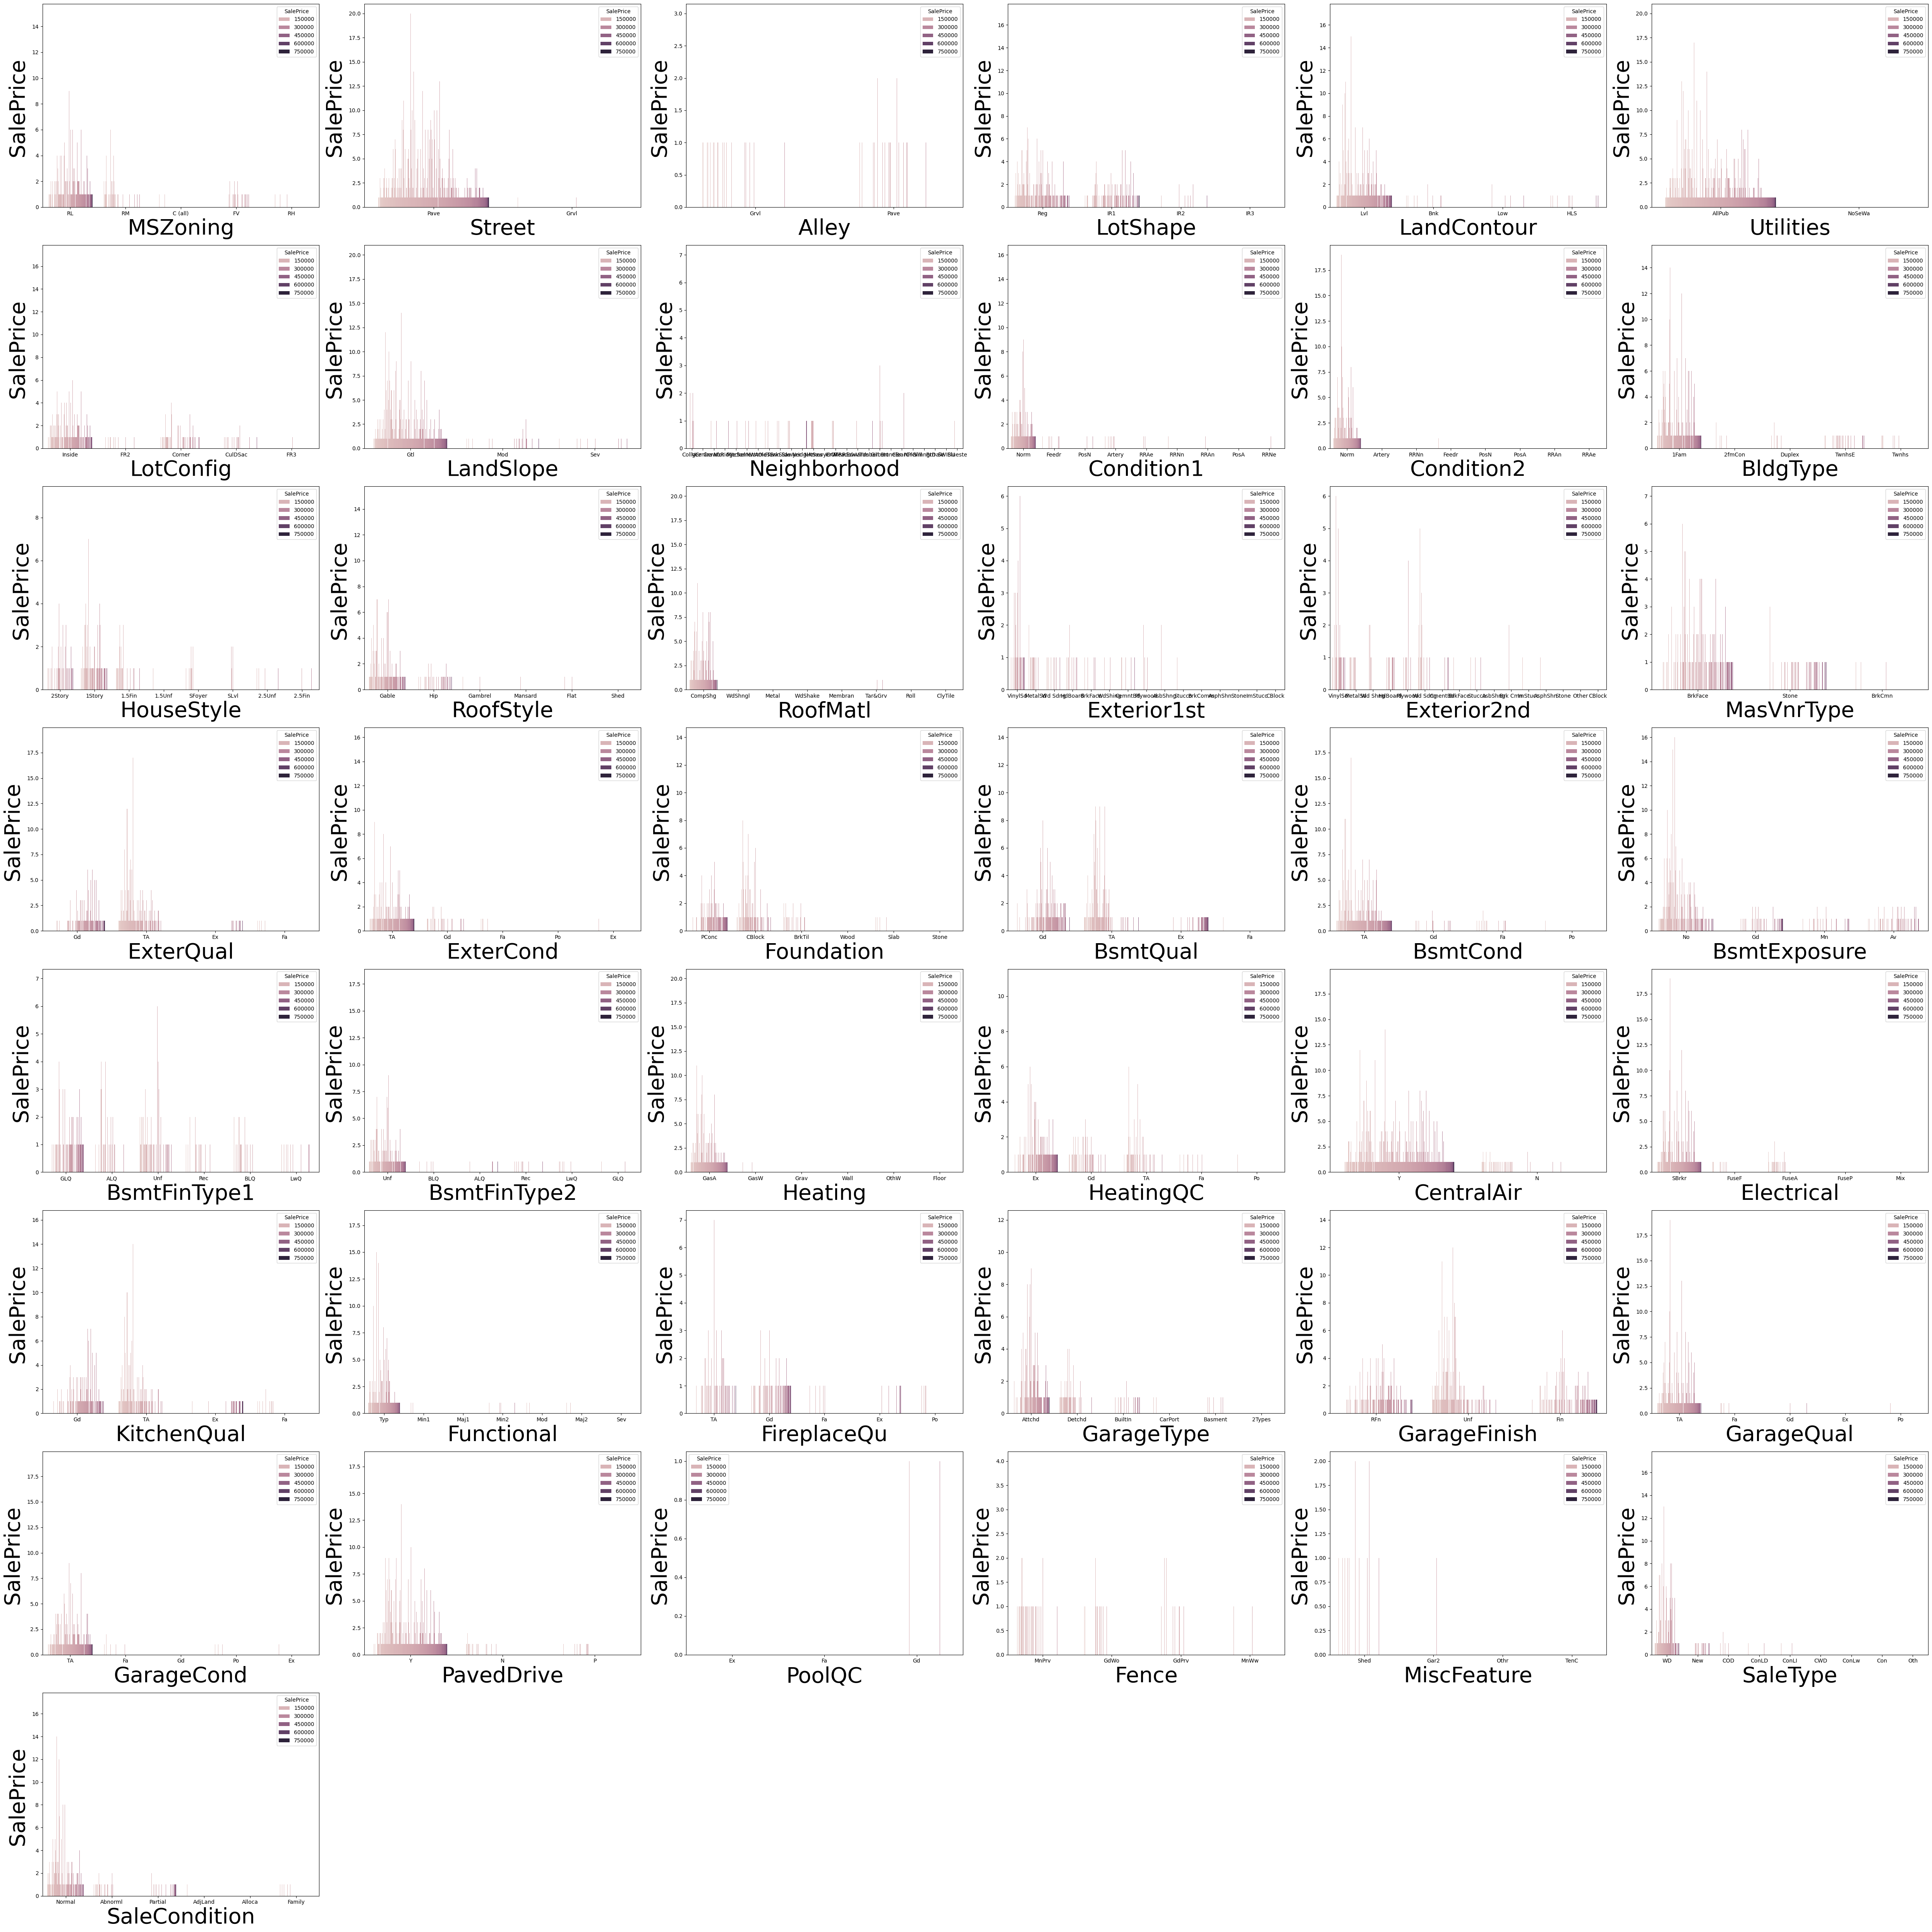

In [13]:
plt.figure(figsize=(50,50), facecolor='white')
plotnumber = 1

for column in data1:
        plt.subplot(8,6,plotnumber)
        sns.countplot(x=data1[column], hue=data.SalePrice)
        plt.xlabel(column,fontsize=40)#assigning name to x-axis and increasing it's font 
        plt.ylabel('SalePrice ',fontsize=40)#assigning name to y-axis and increasing it's font 
        plotnumber+=1
plt.tight_layout()

### Numerical Data

### As data is very large so i have splitted numerical columns in two parts(data2 and data3)

In [14]:
data2 = data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath','SalePrice']]

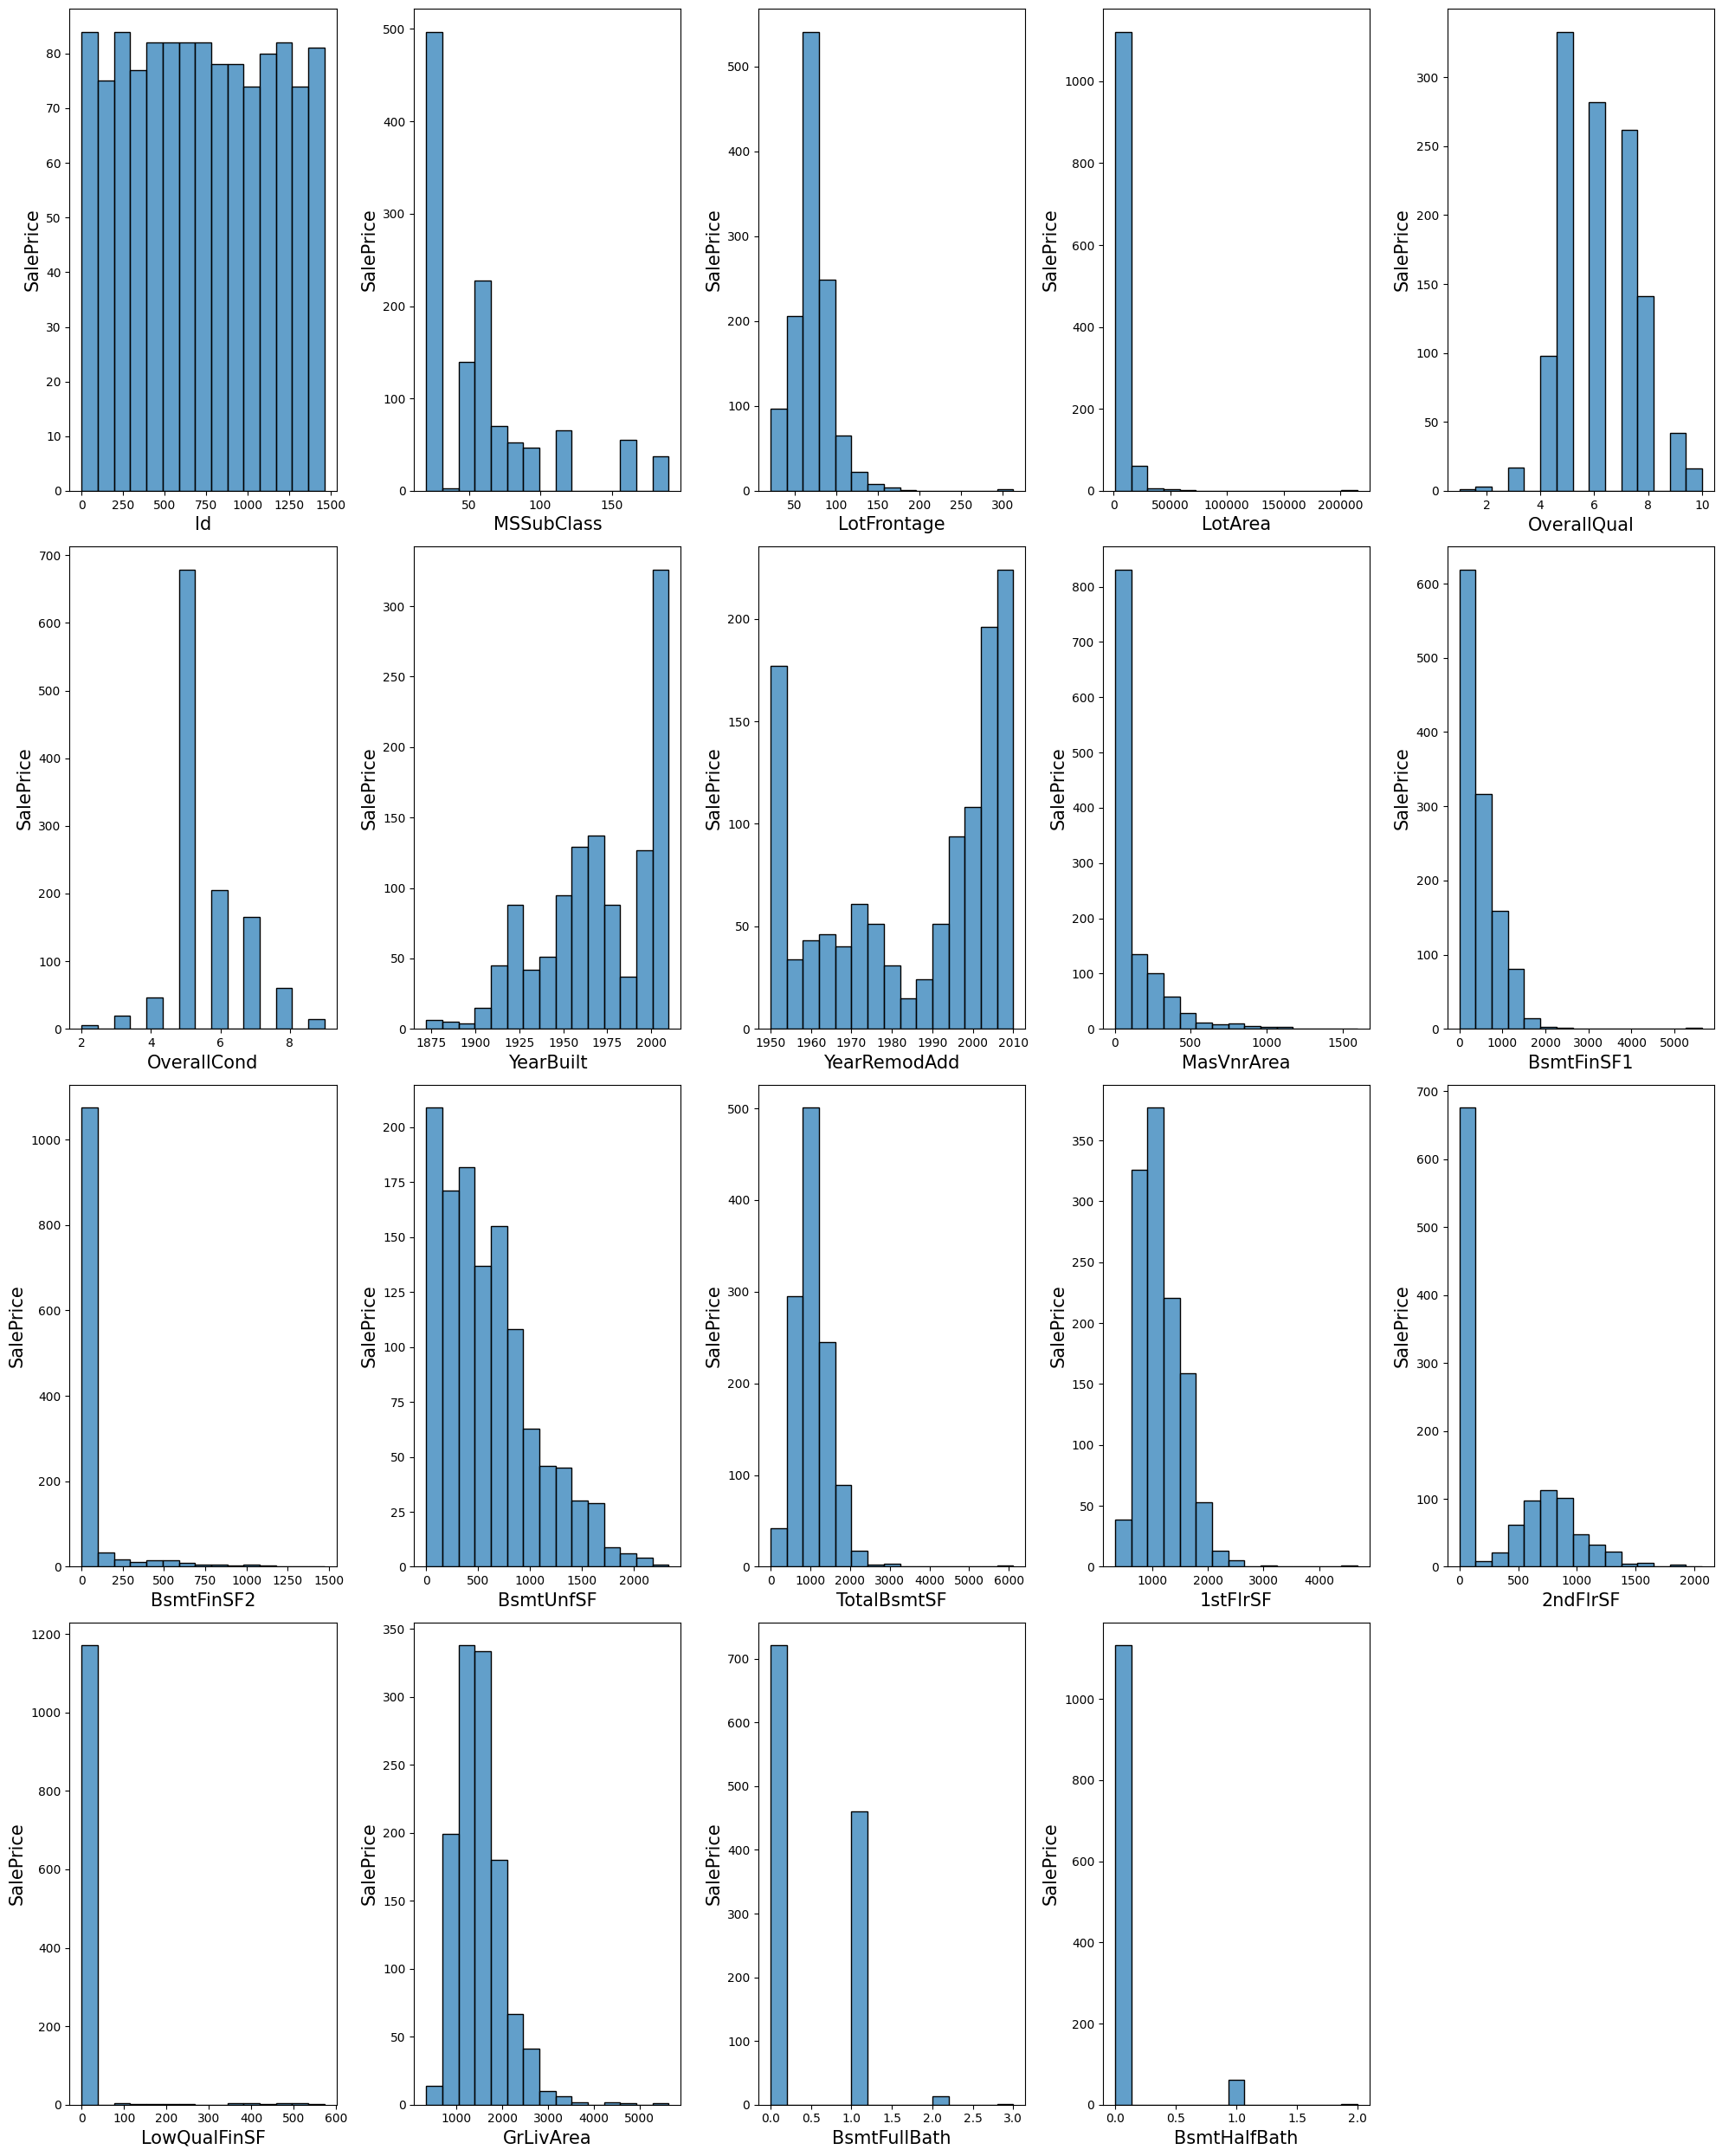

In [15]:
# Preprocess: Drop NA values once, rather than inside the loop
data_clean = data2.dropna(axis=0)

# Create figure with the appropriate size
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1  # counter for number of plot

# Loop over the first 19 columns
for column in data_clean.columns[:19]:  # Accessing first 19 columns
    plt.subplot(4, 5, plotnumber)  # Adjusting to 4 rows and 5 columns
    # Remove the 'hue' parameter for faster plotting
    sns.histplot(x=data_clean[column], bins=15, alpha=0.7)  
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis
    plt.ylabel('SalePrice', fontsize=15)  # Assigning name to y-axis
    plotnumber += 1

plt.tight_layout()  # Automatically adjusts subplots to fit in the figure area

In [16]:
data3 = data[['FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

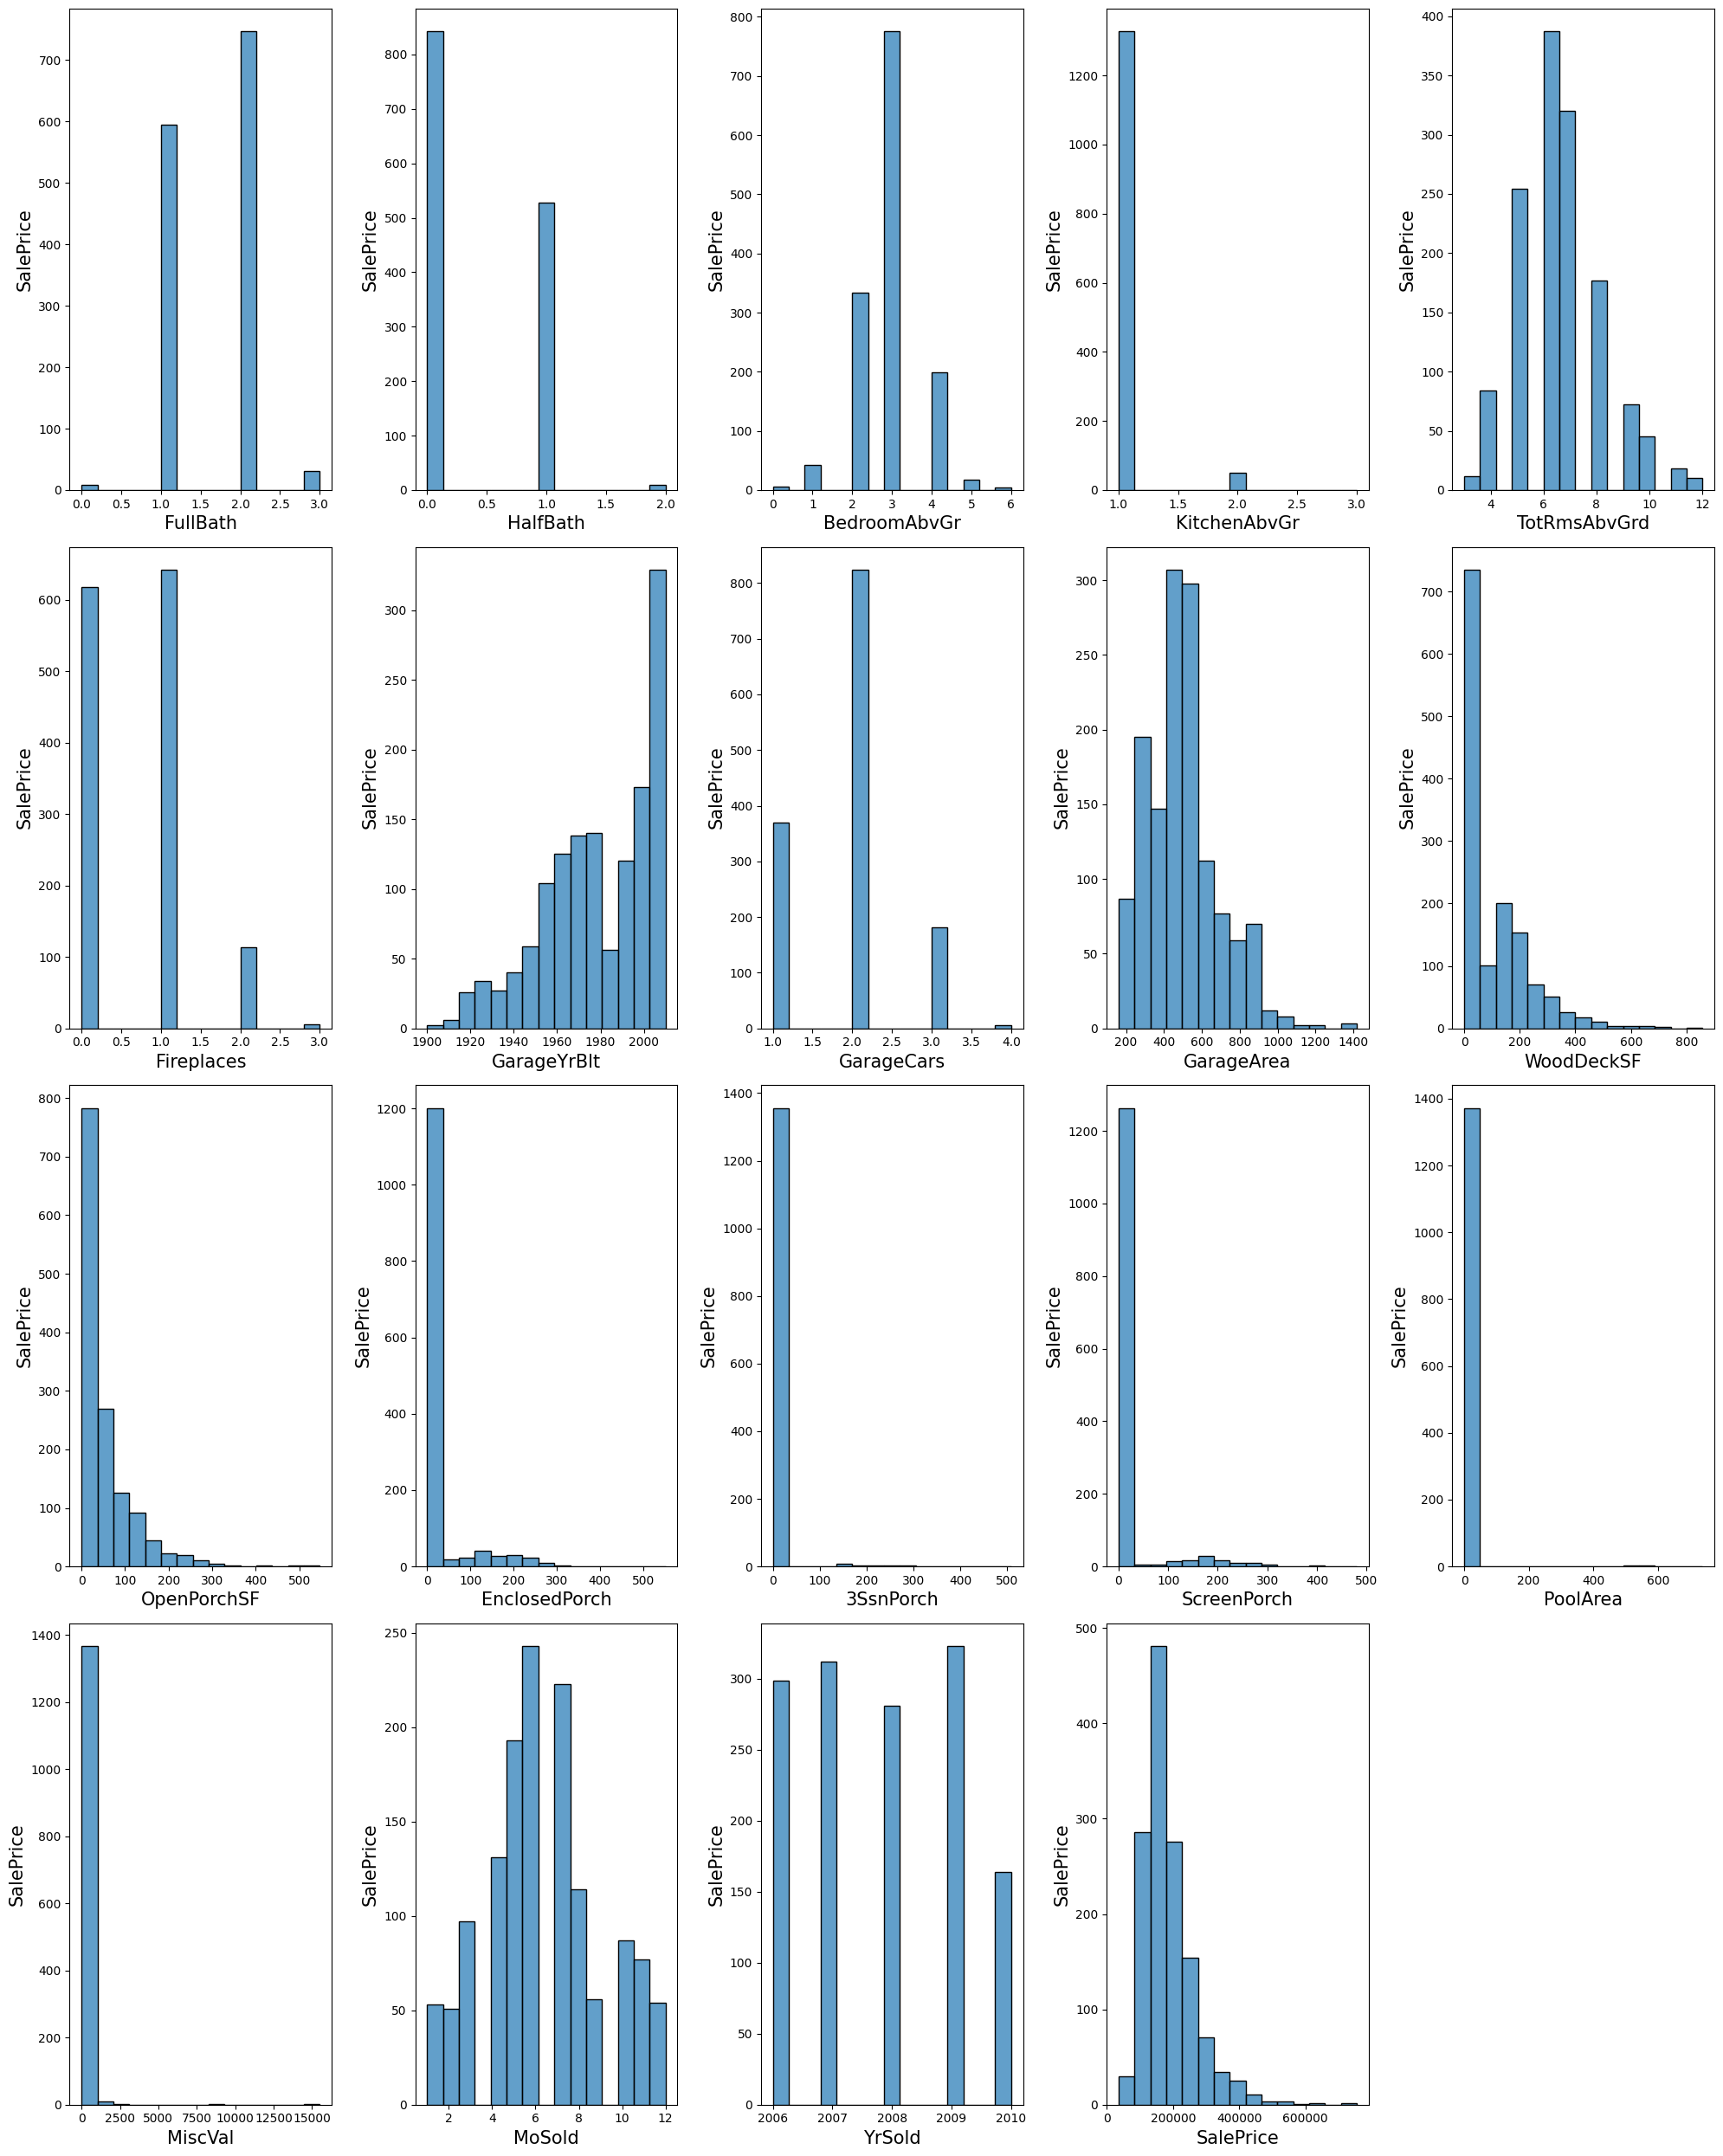

In [17]:
# Preprocess: Drop NA values once, rather than inside the loop
data_clean_2 = data3.dropna(axis=0)

# Create figure with the appropriate size
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1  # counter for number of plot

# Loop over the first 19 columns
for column in data_clean_2.columns[:19]:  # Accessing first 19 columns
    plt.subplot(4, 5, plotnumber)  # Adjusting to 4 rows and 5 columns
    # Remove the 'hue' parameter for faster plotting
    sns.histplot(x=data_clean_2[column], bins=15, alpha=0.7)  
    plt.xlabel(column, fontsize=15)  # Assigning name to x-axis
    plt.ylabel('SalePrice', fontsize=15)  # Assigning name to y-axis
    plotnumber += 1

plt.tight_layout()  # Automatically adjusts subplots to fit in the figure area

# Data Preprocessing

## Missing Values

In [13]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

float64


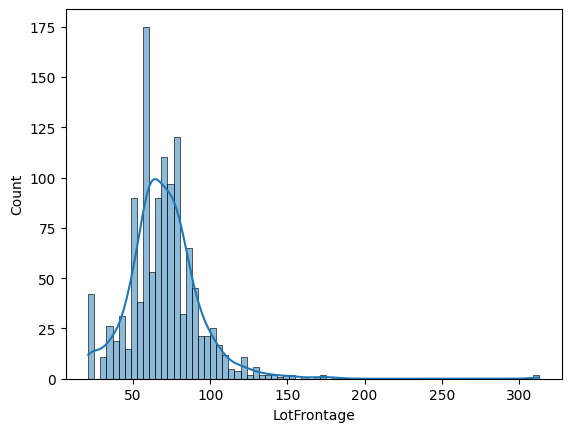

In [18]:
# LotFrontage
print(data.LotFrontage.dtypes) # we r using mean/median function(numerical data)

sns.histplot(x='LotFrontage',data=data,kde=True) # skew data

# since data is not normal ,we replace missing values with median
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].median()

object


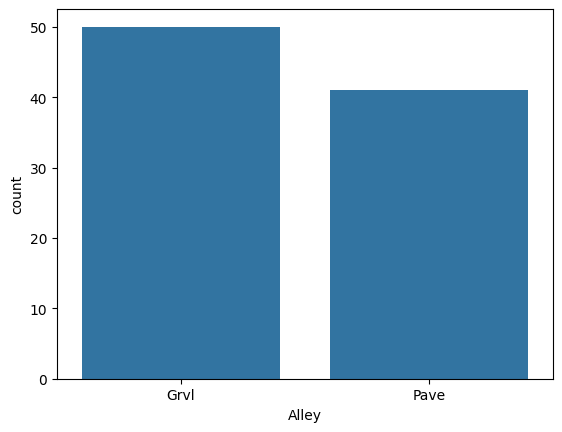

In [19]:
# Alley
print(data.Alley.dtypes) # we r using mode function(categorical data)

sns.countplot(x='Alley',data=data)

data.loc[data['Alley'].isnull()==True,'Alley']='Grvl'

object


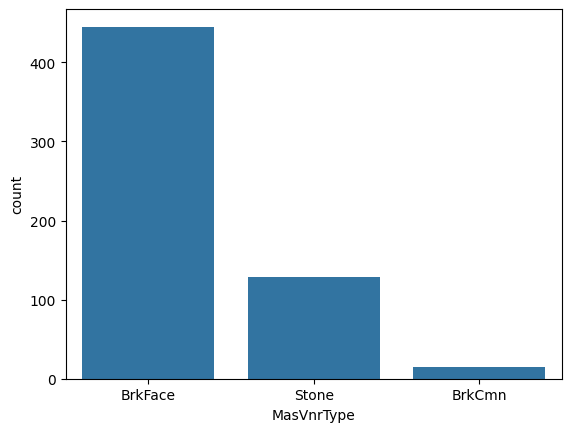

In [20]:
# MasVnrType
print(data.MasVnrType.dtypes)

sns.countplot(x='MasVnrType',data=data)

data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='BrkFace'

float64


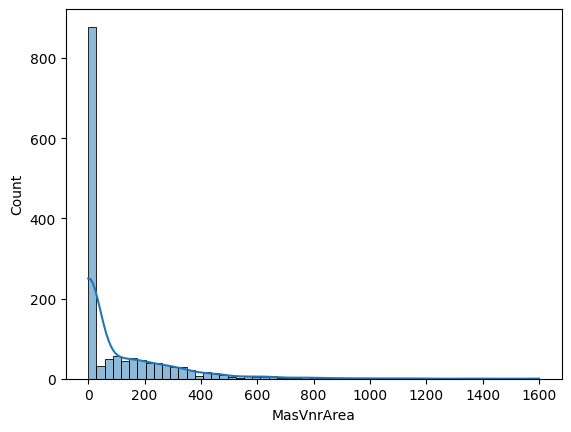

In [21]:
# MasVnrArea
print(data.MasVnrArea.dtypes)

sns.histplot(x='MasVnrArea',data=data,kde=True)

# since data is not normal ,we replace missing values with median
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].median()

object


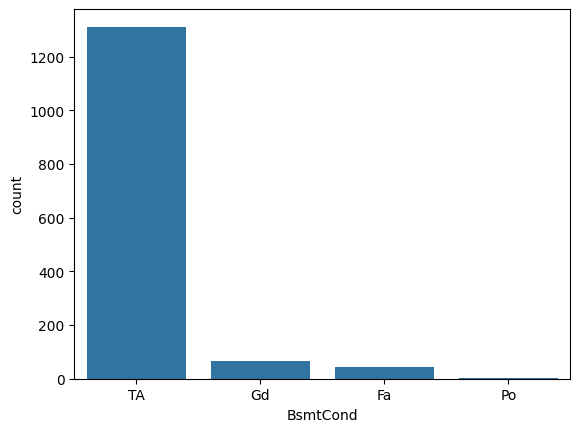

In [22]:
# BsmtCond
print(data.BsmtCond.dtypes)

sns.countplot(x='BsmtCond',data=data)

# Dominant Category: TA represents the majority, so imputing with it maintains data consistency.
# Minimizes Bias: Using the most common value avoids skewing the model with less frequent categories like Gd, Fa, or Po.

data.loc[data['BsmtCond'].isnull()==True,'BsmtCond']='TA'

object


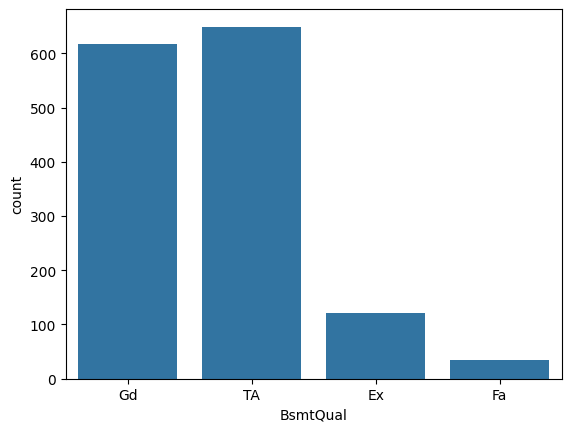

In [23]:
# BsmtQual
print(data.BsmtQual.dtypes)

sns.countplot(x='BsmtQual',data=data)

# TA is the mode (most frequent value) and represents the "average" quality, making it a safe default.
# This minimizes potential bias, as TA is very common and close to the distribution center.

data.loc[data['BsmtQual'].isnull()==True,'BsmtQual']='TA'

object


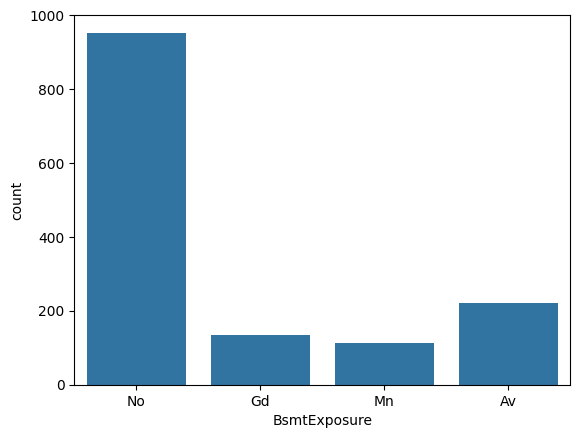

In [24]:
# BsmtExposure
print(data.BsmtExposure.dtypes)

sns.countplot(x='BsmtExposure',data=data)

# Since No represents the majority (900 occurrences), imputing with this value will maintain the dataset's existing distribution.
# Imputing with less frequent categories like Gd, Mn, or Av might introduce bias, given their much lower frequencies.

data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure']='No'

object


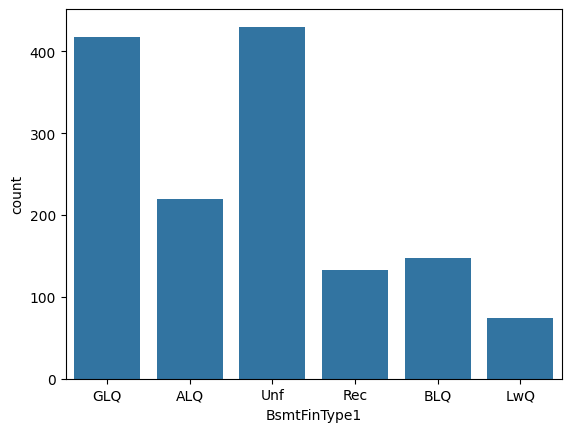

In [25]:
# BsmtFinType1
print(data.BsmtFinType1.dtypes)

sns.countplot(x='BsmtFinType1',data=data)

# Unf has the most occurrences, making it the natural choice to maintain the consistency of the dataset.

data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1']='Unf'

object


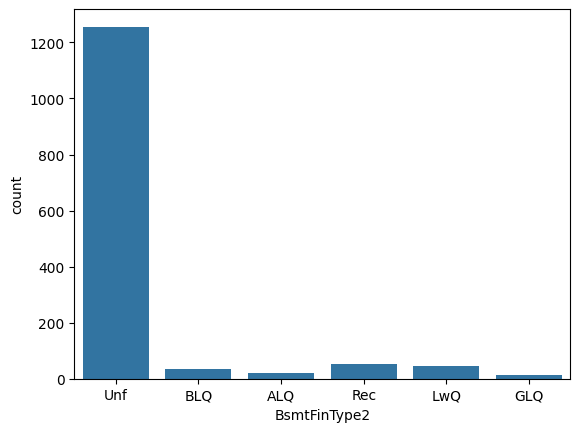

In [26]:
# BsmtFinType2
print(data.BsmtFinType2.dtypes)

sns.countplot(x='BsmtFinType2',data=data)

# Unf is by far the most frequent category (more than 1200 values), which means it is the mode of the column. Filling missing values with the mode ensures consistency with the majority of the data and prevents introducing bias by over-representing the less common categories.

data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2']='Unf'

object


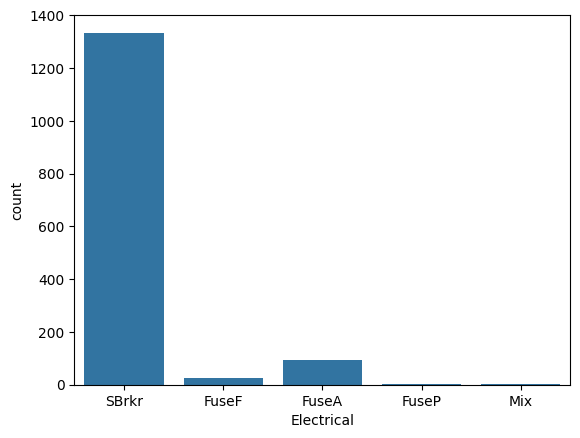

In [27]:
#Electrical
print(data.Electrical.dtypes)

sns.countplot(x='Electrical',data=data)

# SBrkr is a typical and common electrical system type, so using it to fill missing values maintains the realism of the dataset.

data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

object


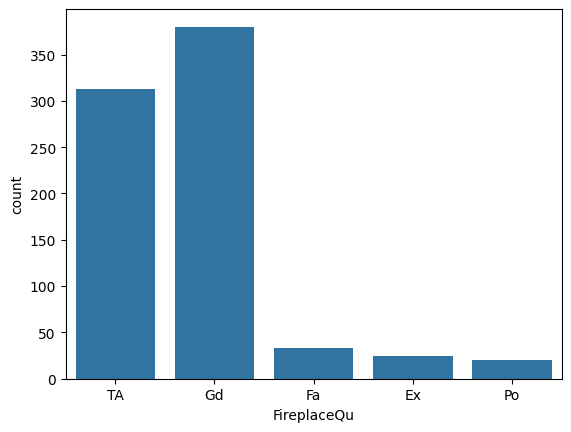

In [28]:
#FireplaceQu
print(data.FireplaceQu.dtypes)

sns.countplot(x='FireplaceQu',data=data)

# Good is likely the typical or default category for a fireplace quality, so imputing missing values with this option is reasonable, especially if there is no clear indicator of a better or worse fireplace quality.

data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='Gd'

object


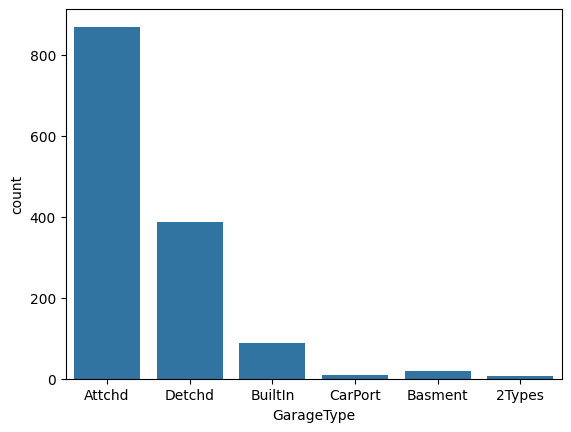

In [29]:
#GarageType
print(data.GarageType.dtypes)

sns.countplot(x='GarageType',data=data)

# With more than 800 values, it represents the majority of houses, which can give more consistent predictive power.

data.loc[data['GarageType'].isnull()==True,'GarageType']='Attchd'

float64


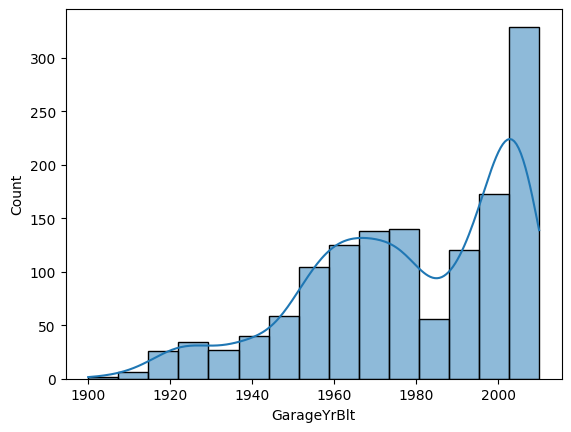

In [30]:
#GarageYrBlt
print(data.GarageYrBlt.dtypes)

sns.histplot(x='GarageYrBlt',data=data,kde=True)

# since data is not normal ,we replace missing values with median

data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].median()

object


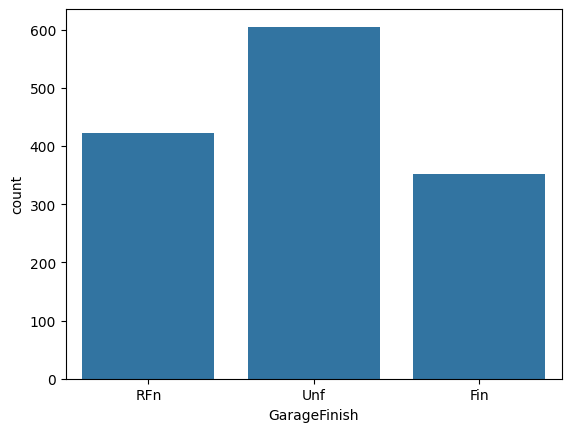

In [31]:
#GarageFinish
print(data.GarageFinish.dtypes)

sns.countplot(x='GarageFinish',data=data)

# Since Unf is the dominant category, it might be beneficial to create a binary feature focusing on whether the garage is finished or unfinished.

data.loc[data['GarageFinish'].isnull()==True,'GarageFinish']='Unf'

object


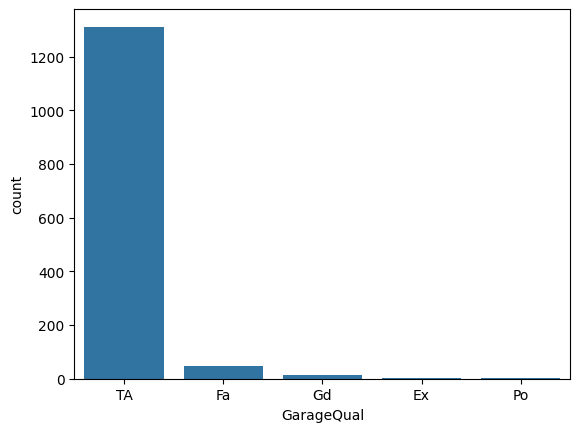

In [32]:
#GarageQual
print(data.GarageQual.dtypes)

sns.countplot(x='GarageQual',data=data)

# Filling missing values with a category that occurs less frequently (like Ex or Fa) could skew the distribution and introduce bias, so using TA ensures that the imputed values align with the dominant category

data.loc[data['GarageQual'].isnull()==True,'GarageQual']='TA'

object


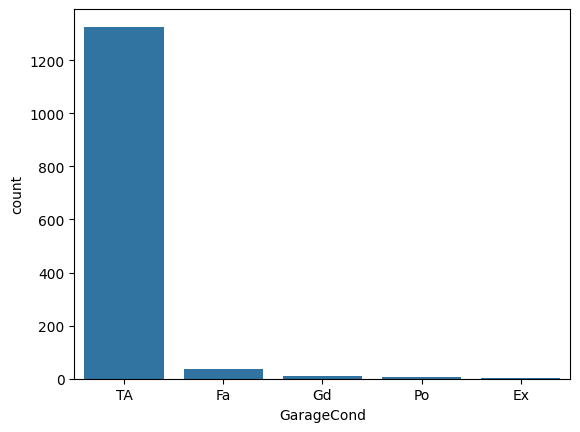

In [33]:
#GarageCond
print(data.GarageCond.dtypes)

sns.countplot(x='GarageCond',data=data)

# Imputing with a less frequent category (e.g., Ex, Fa) could artificially skew the distribution of the data. By using TA, you avoid this issue

data.loc[data['GarageCond'].isnull()==True,'GarageCond']='TA'

object


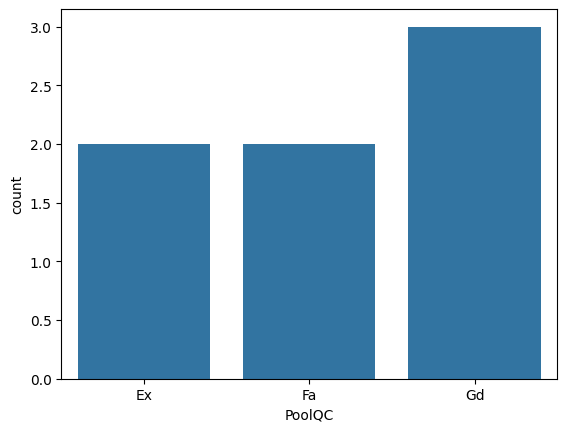

In [34]:
#PoolQC
print(data.PoolQC.dtypes)

sns.countplot(x='PoolQC',data=data)

# Good" is a reasonable and common assumption when the quality of the pool is not specified, as it's the middle-ground category and typically reflects an average condition.

data.loc[data['PoolQC'].isnull()==True,'PoolQC']='Gd'

object


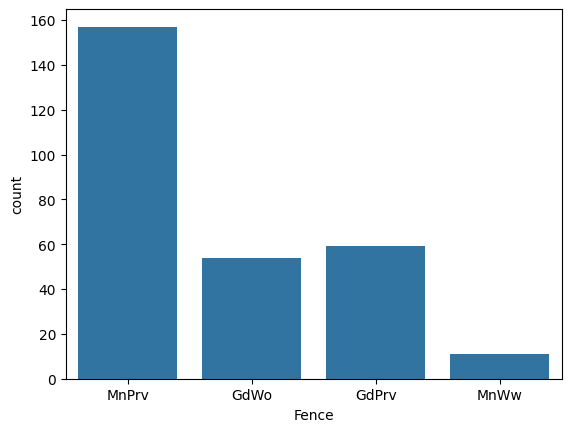

In [35]:
#Fence
print(data.Fence.dtypes)

sns.countplot(x='Fence',data=data)

data.loc[data['Fence'].isnull()==True,'Fence']='MnPrv'

object


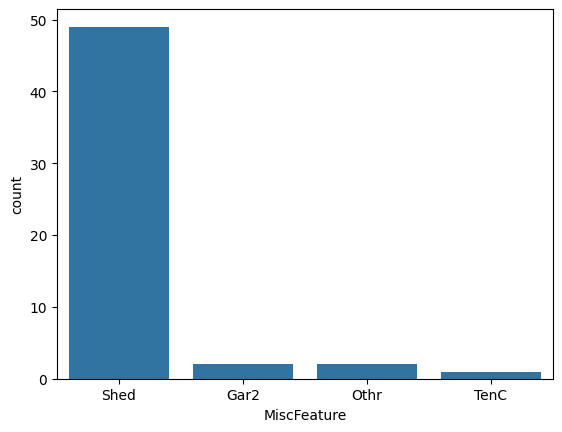

In [36]:
#MiscFeature
print(data.MiscFeature.dtypes)

sns.countplot(x='MiscFeature',data=data)

data.loc[data['MiscFeature'].isnull()==True,'MiscFeature']='Shed'

## Categorical to numerical

In [37]:
data.select_dtypes(include='object').columns #43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
# copy of data
data3=data.copy()

### MSZoning

In [39]:
# Initialize LabelEncoder
lc = LabelEncoder()

# Apply LabelEncoder to the MSZoning column
data3['MSZoning'] = lc.fit_transform(data3['MSZoning'])

data3['MSZoning'] = data3['MSZoning'].fillna('Missing')
data3['MSZoning'] = lc.fit_transform(data3['MSZoning'])

In [40]:
data3.MSZoning.value_counts()

MSZoning
3    1151
4     218
1      65
2      16
0      10
Name: count, dtype: int64

## Street

In [41]:
# Apply LabelEncoder to the MSZoning column
data3['Street'] = lc.fit_transform(data3['Street'])

data3['Street'] = data3['Street'].fillna('Missing')
data3['Street'] = lc.fit_transform(data3['Street'])

In [42]:
data3.Street.value_counts()

Street
1    1454
0       6
Name: count, dtype: int64

### Alley

In [43]:
# Manually encode the 'Alley' column
data3['Alley'] = data3['Alley'].map({'Grvl': 0, 'Pave': 1})

In [44]:
data3.Alley.value_counts()

Alley
0    1419
1      41
Name: count, dtype: int64

### LotShape

In [45]:
# Apply LabelEncoder to the LotShape column
data3['LotShape'] = lc.fit_transform(data3['LotShape'])

data3['LotShape'] = data3['LotShape'].fillna('Missing')
data3['LotShape'] = lc.fit_transform(data3['LotShape'])

In [46]:
data3.LotShape.value_counts()

LotShape
3    925
0    484
1     41
2     10
Name: count, dtype: int64

### LandContour

<Axes: xlabel='LandContour', ylabel='Count'>

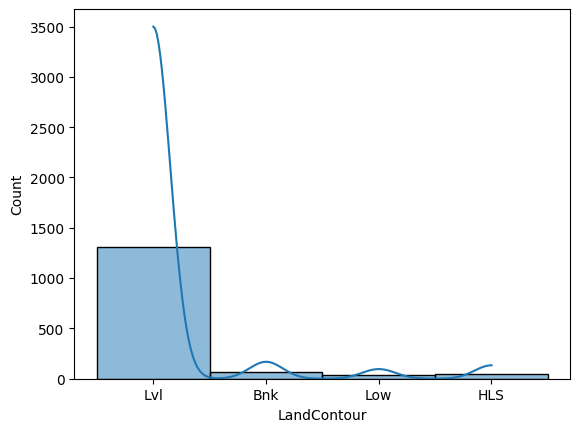

In [47]:
sns.histplot(x='LandContour',data=data,kde=True)

In [48]:
# using manual encoding
data3['LandContour'] = data3['LandContour'].map({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3})

In [49]:
data3.LandContour.value_counts()

LandContour
0    1311
1      63
2      50
3      36
Name: count, dtype: int64

## Utilities

In [50]:
# Using label encoding
data3['Utilities'] = lc.fit_transform(data3['Utilities'])

data3['Utilities'] = data3['Utilities'].fillna('Missing')
data3['Utilities'] = lc.fit_transform(data3['Utilities'])

In [51]:
data3.Utilities.value_counts()

Utilities
0    1459
1       1
Name: count, dtype: int64

## LotConfig

<Axes: xlabel='LotConfig', ylabel='Count'>

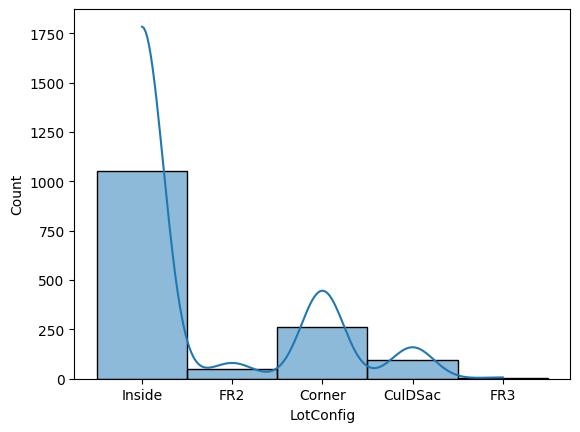

In [52]:
sns.histplot(x='LotConfig',data=data,kde=True)

In [53]:
# using manual encoding
data3['LotConfig'] = data3['LotConfig'].map({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})

In [54]:
data3.LotConfig.value_counts()

LotConfig
0    1052
1     263
2      94
3      47
4       4
Name: count, dtype: int64

## LandSlope

<Axes: xlabel='LandSlope', ylabel='Count'>

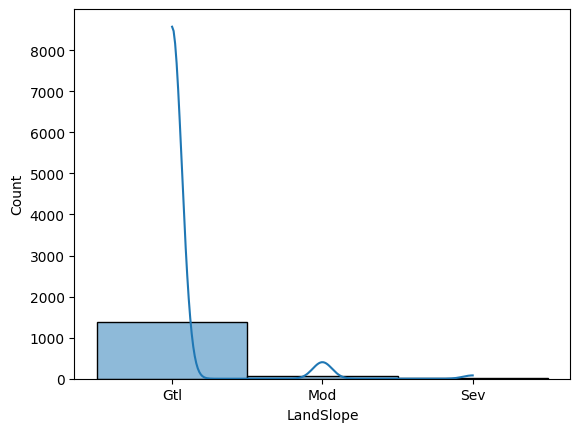

In [55]:
sns.histplot(x='LandSlope',data=data,kde=True)

In [56]:
# using manual encoding
data3['LandSlope'] = data3['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})

In [57]:
data3.LandSlope.value_counts()

LandSlope
0    1382
1      65
2      13
Name: count, dtype: int64

## Neighborhood

In [58]:
# Apply LabelEncoder to the Neighborhood column
data3['Neighborhood'] = lc.fit_transform(data3['Neighborhood'])

data3['Neighborhood'] = data3['Neighborhood'].fillna('Missing')
data3['Neighborhood'] = lc.fit_transform(data3['Neighborhood'])

In [59]:
data3.Neighborhood.value_counts()

Neighborhood
12    225
5     150
17    113
7     100
21     86
8      79
16     77
19     74
14     73
20     59
3      58
6      51
11     49
15     41
23     38
9      37
4      28
22     25
18     25
10     17
0      17
2      16
24     11
13      9
1       2
Name: count, dtype: int64

## Condition1

In [60]:
# Apply LabelEncoder to the Neighborhood column
data3['Condition1'] = lc.fit_transform(data3['Condition1'])

data3['Condition1'] = data3['Condition1'].fillna('Missing')
data3['Condition1'] = lc.fit_transform(data3['Condition1'])

In [61]:
data3.Condition1.value_counts()

Condition1
2    1260
1      81
0      48
6      26
4      19
5      11
3       8
8       5
7       2
Name: count, dtype: int64

## Condition2

In [62]:
# Apply LabelEncoder to the Neighborhood column
data3['Condition2'] = lc.fit_transform(data3['Condition2'])

data3['Condition2'] = data3['Condition2'].fillna('Missing')
data3['Condition2'] = lc.fit_transform(data3['Condition2'])

In [63]:
data3.Condition2.value_counts()

Condition2
2    1445
1       6
0       2
7       2
4       2
3       1
6       1
5       1
Name: count, dtype: int64

## BldgType

<Axes: xlabel='BldgType', ylabel='Count'>

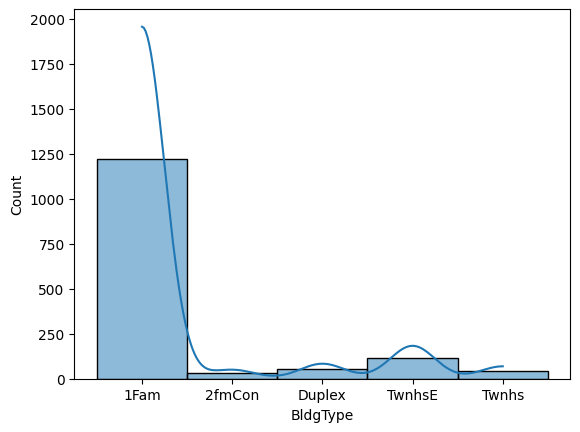

In [64]:
sns.histplot(x='BldgType',data=data,kde=True)

In [65]:
# using manual encoding
data3['BldgType'] = data3['BldgType'].map({'1Fam': 0, 'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4})

In [66]:
data3.BldgType.value_counts()

BldgType
0    1220
1     114
2      52
3      43
4      31
Name: count, dtype: int64

## HouseStyle

<Axes: xlabel='HouseStyle', ylabel='Count'>

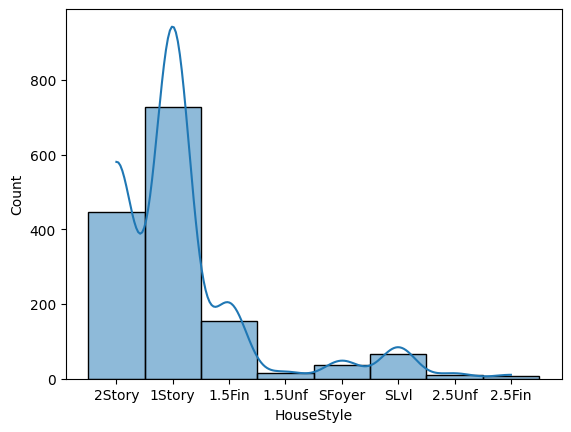

In [67]:
sns.histplot(x='HouseStyle',data=data,kde=True)

In [68]:
# using manual encoding
data3['HouseStyle'] = data3['HouseStyle'].map({'1Story': 0, '2Story': 1, '1.5Fin': 2, 'SLvl': 3, 'SFoyer': 4, '1.5Unf': 5, '2.5Unf': 6, '2.5Fin': 7})

In [69]:
data3.HouseStyle.value_counts()

HouseStyle
0    726
1    445
2    154
3     65
4     37
5     14
6     11
7      8
Name: count, dtype: int64

## RoofStyle

<Axes: xlabel='RoofStyle', ylabel='Count'>

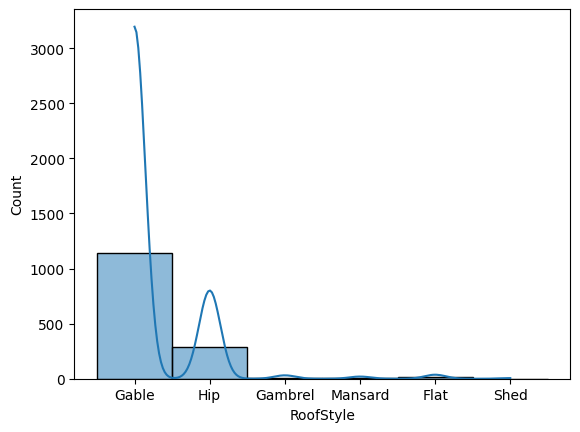

In [70]:
sns.histplot(x='RoofStyle',data=data,kde=True)

In [71]:
# using manual encoding
data3['RoofStyle'] = data3['RoofStyle'].map({'Gable': 0, 'Hip': 1,'Flat': 2,'Mansard': 3,'Shed': 4, 'Gambrel': 5})

In [72]:
data3.RoofStyle.value_counts()

RoofStyle
0    1141
1     286
2      13
5      11
3       7
4       2
Name: count, dtype: int64

## RoofMatl

In [73]:
data3.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [74]:
# using manual encoding
data3['RoofMatl'] = data3['RoofMatl'].map({'CompShg': 0, 'Tar&Grv': 1,'WoodShng': 2,'Metal': 3,'Membran': 4,'Roll': 5,'ClyTile': 6,'WdShake': 7 })

In [75]:
data3.RoofMatl.value_counts()

RoofMatl
0.0    1434
1.0      11
7.0       5
3.0       1
4.0       1
5.0       1
6.0       1
Name: count, dtype: int64

## Exterior1st

<Axes: xlabel='Exterior1st', ylabel='Count'>

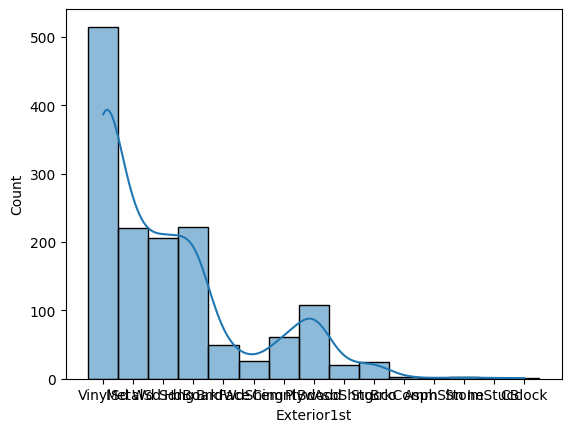

In [76]:
sns.histplot(x='Exterior1st',data=data,kde=True)

In [77]:
print(data3['Exterior1st'].unique())

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [78]:
# using manual encoding
data3['Exterior1st'] = data3['Exterior1st'].map({'VinylSd': 0, 'MetalSd': 1,'Wd Sdng': 2,'HdBoard': 3,'BrkFace': 4,'WdShing': 5,'CemntBd': 6,'Plywood': 7,'AsbShng': 8,'Stucco': 9,'BrkComm': 10,'AsphShn': 11,'Stone': 12,'ImStucc': 13,'CBlock': 14})

In [79]:
data3.Exterior1st.value_counts()

Exterior1st
0     515
3     222
1     220
2     206
7     108
6      61
4      50
5      26
9      25
8      20
10      2
12      2
11      1
13      1
14      1
Name: count, dtype: int64

## Exterior2nd

In [80]:
#Using label encoding
data3['Exterior2nd'] = lc.fit_transform(data3['Exterior2nd'])

data3['Exterior2nd'] = data3['Exterior2nd'].fillna('Missing')
data3['Exterior2nd'] = lc.fit_transform(data3['Exterior2nd'])

In [81]:
data3.Exterior2nd.value_counts()

Exterior2nd
13    504
8     214
6     207
14    197
10    142
5      60
15     38
12     26
3      25
0      20
7      10
2       7
11      5
1       3
9       1
4       1
Name: count, dtype: int64

## MasVnrType

<Axes: xlabel='MasVnrType', ylabel='Count'>

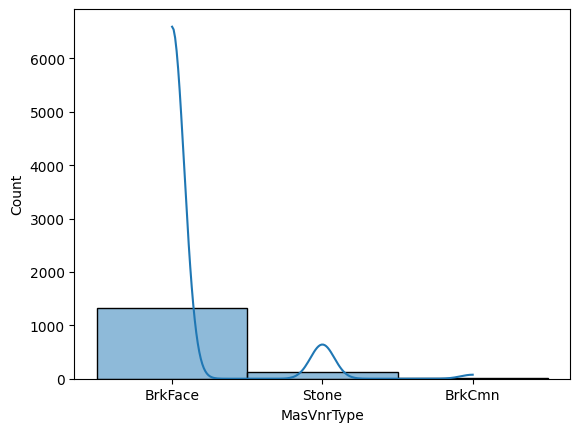

In [82]:
sns.histplot(x='MasVnrType',data=data,kde=True)

In [83]:
# using manual encoding
data3['MasVnrType'] = data3['MasVnrType'].map({'BrkFace': 0, 'Stone': 1,'BrkCmn': 2})

In [84]:
data3.MasVnrType.value_counts()

MasVnrType
0    1317
1     128
2      15
Name: count, dtype: int64

## ExterQual

<Axes: xlabel='ExterQual', ylabel='Count'>

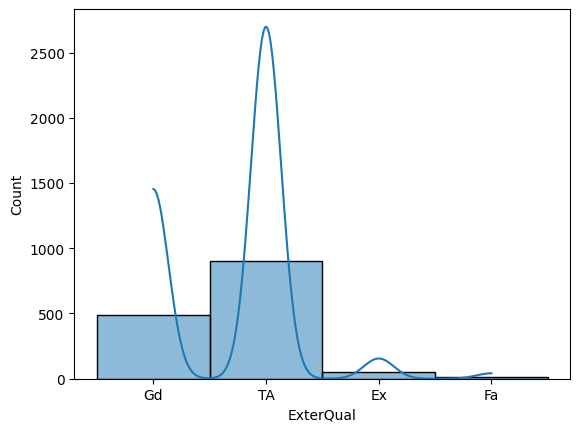

In [85]:
sns.histplot(x='ExterQual',data=data,kde=True)

In [86]:
# using manual encoding
data3['ExterQual'] = data3['ExterQual'].map({'Gd': 0, 'TA': 1,'Ex': 2, 'Fa': 3})

In [87]:
data3.ExterQual.value_counts()

ExterQual
1    906
0    488
2     52
3     14
Name: count, dtype: int64

## ExterCond

<Axes: xlabel='ExterCond', ylabel='Count'>

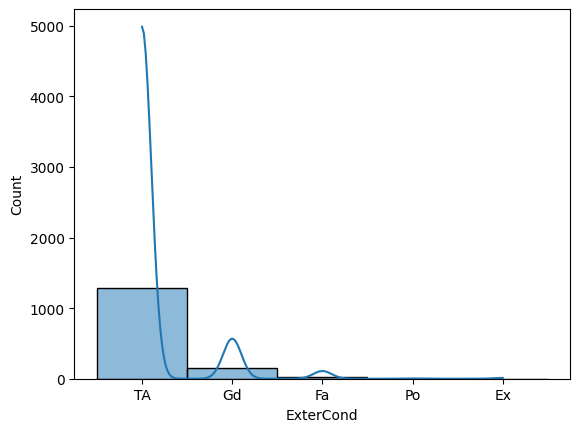

In [88]:
sns.histplot(x='ExterCond',data=data,kde=True)

In [89]:
# using manual encoding
data3['ExterCond'] = data3['ExterCond'].map({'TA': 0, 'Gd': 1,'Fa': 2, 'Po': 3, 'Ex': 4})

In [90]:
data3.ExterCond.value_counts()

ExterCond
0    1282
1     146
2      28
4       3
3       1
Name: count, dtype: int64

## Foundation

<Axes: xlabel='Foundation', ylabel='Count'>

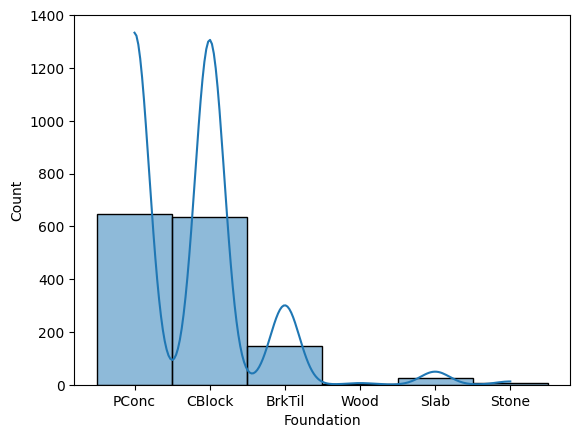

In [91]:
sns.histplot(x='Foundation',data=data,kde=True)

In [92]:
# using manual encoding
data3['Foundation'] = data3['Foundation'].map({'PConc': 0, 'CBlock': 1,'BrkTil': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})

In [93]:
data3.Foundation.value_counts()

Foundation
0    647
1    634
2    146
3     24
4      6
5      3
Name: count, dtype: int64

## BsmtQual

<Axes: xlabel='BsmtQual', ylabel='Count'>

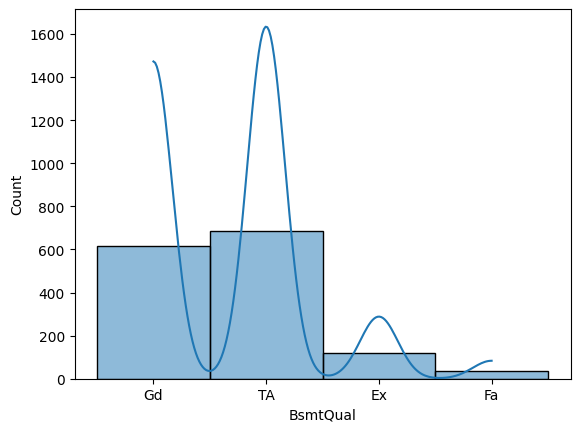

In [94]:
sns.histplot(x='BsmtQual',data=data,kde=True)

In [95]:
# using manual encoding
data3['BsmtQual'] = data3['BsmtQual'].map({'TA': 0, 'Gd': 1,'Ex': 2, 'Fa': 3})

In [96]:
data3.BsmtQual.value_counts()

BsmtQual
0    686
1    618
2    121
3     35
Name: count, dtype: int64

## BsmtCond

<Axes: xlabel='BsmtCond', ylabel='Count'>

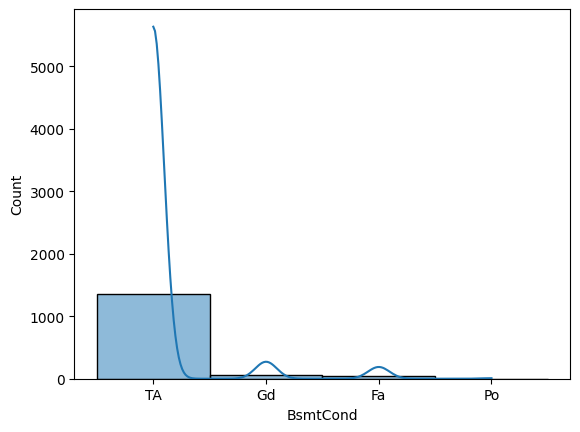

In [97]:
sns.histplot(x='BsmtCond',data=data,kde=True)

In [98]:
# using manual encoding
data3['BsmtCond'] = data3['BsmtCond'].map({'TA': 0, 'Gd': 1,'Fa': 2, 'Po': 3})

In [99]:
data3.BsmtCond.value_counts()

BsmtCond
0    1348
1      65
2      45
3       2
Name: count, dtype: int64

## BsmtExposure

In [100]:
#Using label encoding
data3['BsmtExposure'] = lc.fit_transform(data3['BsmtExposure'])

data3['BsmtExposure'] = data3['BsmtExposure'].fillna('Missing')
data3['BsmtExposure'] = lc.fit_transform(data3['BsmtExposure'])

In [101]:
data3.BsmtExposure.value_counts()

BsmtExposure
3    991
0    221
1    134
2    114
Name: count, dtype: int64

## BsmtFinType1

In [102]:
#Using label encoding
data3['BsmtFinType1'] = lc.fit_transform(data3['BsmtFinType1'])

data3['BsmtFinType1'] = data3['BsmtFinType1'].fillna('Missing')
data3['BsmtFinType1'] = lc.fit_transform(data3['BsmtFinType1'])

In [103]:
data3.BsmtFinType1.value_counts()

BsmtFinType1
5    467
2    418
0    220
1    148
4    133
3     74
Name: count, dtype: int64

## BsmtFinType2

In [104]:
#Using label encoding
data3['BsmtFinType2'] = lc.fit_transform(data3['BsmtFinType2'])

data3['BsmtFinType2'] = data3['BsmtFinType1'].fillna('Missing')
data3['BsmtFinType2'] = lc.fit_transform(data3['BsmtFinType2'])

In [105]:
data3.BsmtFinType2.value_counts()

BsmtFinType2
5    467
2    418
0    220
1    148
4    133
3     74
Name: count, dtype: int64

## Heating

In [106]:
#Using label encoding
data3['Heating'] = lc.fit_transform(data3['Heating'])

data3['Heating'] = data3['Heating'].fillna('Missing')
data3['Heating'] = lc.fit_transform(data3['Heating'])

In [107]:
data3.Heating.value_counts()

Heating
1    1428
2      18
3       7
5       4
4       2
0       1
Name: count, dtype: int64

## HeatingQC

In [108]:
#Using label encoding
data3['HeatingQC'] = lc.fit_transform(data3['HeatingQC'])

data3['HeatingQC'] = data3['HeatingQC'].fillna('Missing')
data3['HeatingQC'] = lc.fit_transform(data3['HeatingQC'])

In [109]:
data3.HeatingQC.value_counts()

HeatingQC
0    741
4    428
2    241
1     49
3      1
Name: count, dtype: int64

## CentralAir

In [110]:
#Using label encoding
data3['CentralAir'] = lc.fit_transform(data3['CentralAir'])

data3['CentralAir'] = data3['CentralAir'].fillna('Missing')
data3['CentralAir'] = lc.fit_transform(data3['CentralAir'])

In [111]:
data3.CentralAir.value_counts()

CentralAir
1    1365
0      95
Name: count, dtype: int64

## Electrical

<Axes: xlabel='Electrical', ylabel='Count'>

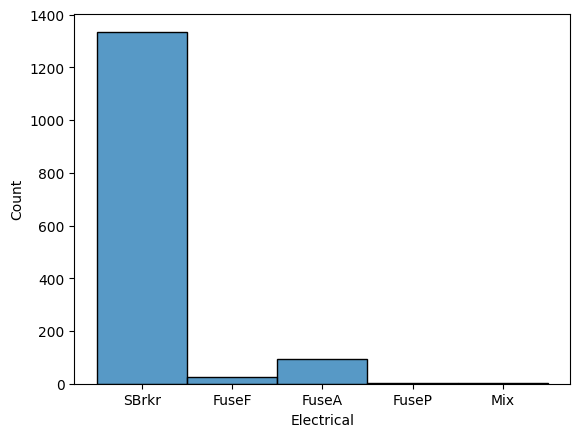

In [112]:
sns.histplot(x='Electrical',data=data)

In [113]:
# using manual encoding
data3['Electrical'] = data3['Electrical'].map({'SBrkr': 0, 'FuseA': 1,'FuseF': 2, 'FuseP': 3, 'Mix': 4})

In [114]:
data3.Electrical.value_counts()

Electrical
0    1335
1      94
2      27
3       3
4       1
Name: count, dtype: int64

## KitchenQual

<Axes: xlabel='KitchenQual', ylabel='Count'>

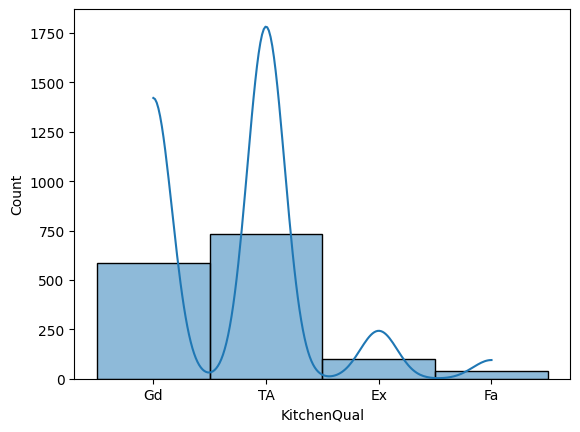

In [115]:
sns.histplot(x='KitchenQual',data=data,kde=True)

In [116]:
# using manual encoding
data3['KitchenQual'] = data3['KitchenQual'].map({'TA': 0, 'Gd': 1,'Ex': 2, 'Fa': 3})

In [117]:
data3.KitchenQual.value_counts()

KitchenQual
0    735
1    586
2    100
3     39
Name: count, dtype: int64

## Functional

<Axes: xlabel='Functional', ylabel='Count'>

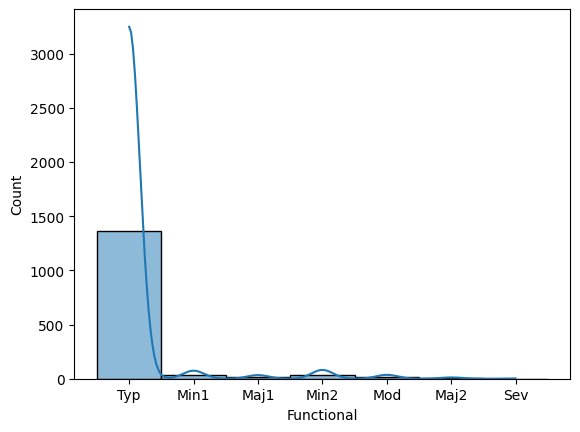

In [118]:
sns.histplot(x='Functional',data=data,kde=True)

In [119]:
# using manual encoding
data3['Functional'] = data3['Functional'].map({'Typ': 0, 'Min1': 1,'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6})

In [120]:
data3.Functional.value_counts()

Functional
0    1360
2      34
1      31
3      15
4      14
5       5
6       1
Name: count, dtype: int64

## FireplaceQu

<Axes: xlabel='FireplaceQu', ylabel='Count'>

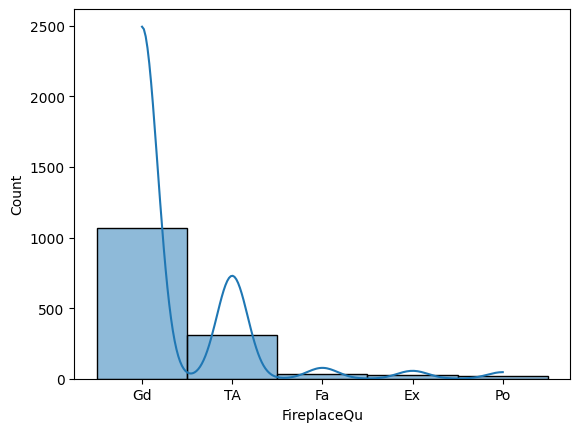

In [121]:
sns.histplot(x='FireplaceQu',data=data,kde=True)

In [122]:
# using manual encoding
data3['FireplaceQu'] = data3['FireplaceQu'].map({'Gd': 0, 'TA': 1,'Fa': 2, 'Ex': 3, 'Po': 4})

In [123]:
data3.FireplaceQu.value_counts()

FireplaceQu
0    1070
1     313
2      33
3      24
4      20
Name: count, dtype: int64

## GarageType

<Axes: xlabel='GarageType', ylabel='Count'>

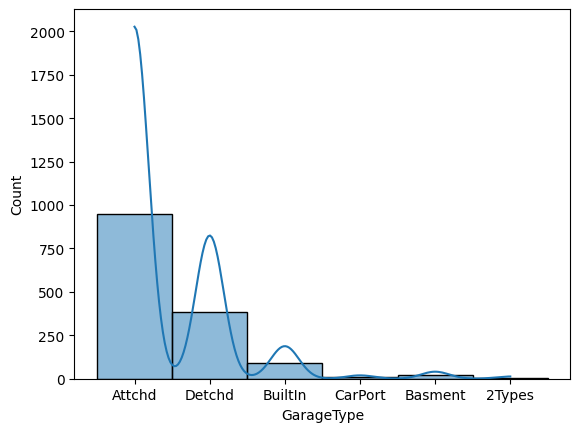

In [124]:
sns.histplot(x='GarageType',data=data,kde=True)

In [125]:
# using manual encoding
data3['GarageType'] = data3['GarageType'].map({'Attchd': 0, 'Detchd': 1,'Builtin': 2, 'Basement': 3, 'CarPort': 4, '2Types': 5})

In [126]:
data3.GarageType.value_counts()

GarageType
0.0    951
1.0    387
4.0      9
5.0      6
Name: count, dtype: int64

## GarageFinish

In [127]:
#Using label encoding
data3['GarageFinish'] = lc.fit_transform(data3['GarageFinish'])

data3['GarageFinish'] = data3['GarageFinish'].fillna('Missing')
data3['GarageFinish'] = lc.fit_transform(data3['GarageFinish'])

In [128]:
data3.GarageFinish.value_counts()

GarageFinish
2    686
1    422
0    352
Name: count, dtype: int64

## GarageQual

<Axes: xlabel='GarageQual', ylabel='Count'>

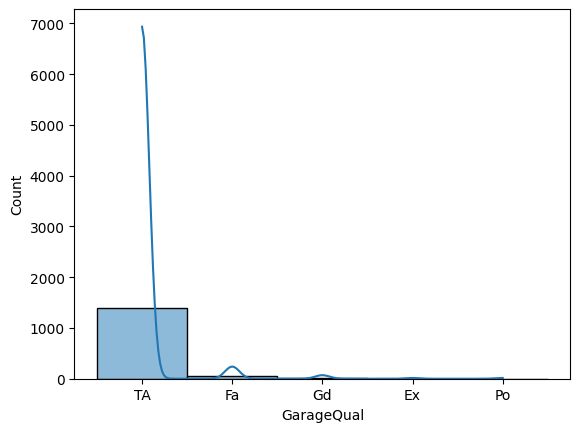

In [129]:
sns.histplot(x='GarageQual',data=data,kde=True)

In [130]:
# using manual encoding
data3['GarageQual'] = data3['GarageQual'].map({'TA': 0, 'Fa': 1,'Gd': 2, 'Ex': 3, 'Po': 4})

In [131]:
data3.GarageQual.value_counts()

GarageQual
0    1392
1      48
2      14
3       3
4       3
Name: count, dtype: int64

## GarageCond

<Axes: xlabel='GarageCond', ylabel='Count'>

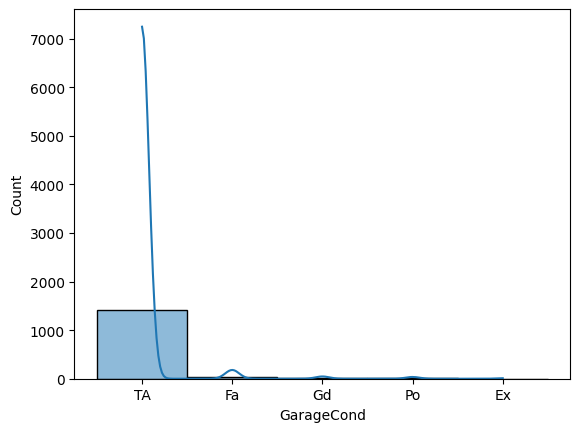

In [132]:
sns.histplot(x='GarageCond',data=data,kde=True)

In [133]:
# using manual encoding
data3['GarageCond'] = data3['GarageCond'].map({'TA': 0, 'Fa': 1,'Gd': 2, 'Po': 3, 'Ex': 4})

In [134]:
data3.GarageCond.value_counts()

GarageCond
0    1407
1      35
2       9
3       7
4       2
Name: count, dtype: int64

## PavedDrive

In [135]:
#Using label encoding
data3['PavedDrive'] = lc.fit_transform(data3['PavedDrive'])

data3['PavedDrive'] = data3['PavedDrive'].fillna('Missing')
data3['PavedDrive'] = lc.fit_transform(data3['PavedDrive'])

In [136]:
data3.PavedDrive.value_counts()

PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64

## PoolQC

In [137]:
#Using label encoding
data3['PoolQC'] = lc.fit_transform(data3['PoolQC'])

data3['PoolQC'] = data3['PoolQC'].fillna('Missing')
data3['PoolQC'] = lc.fit_transform(data3['PoolQC'])

In [138]:
data3.PoolQC.value_counts()

PoolQC
2    1456
0       2
1       2
Name: count, dtype: int64

## Fence

In [139]:
#Using label encoding
data3['Fence'] = lc.fit_transform(data3['Fence'])

data3['Fence'] = data3['Fence'].fillna('Missing')
data3['Fence'] = lc.fit_transform(data3['Fence'])

In [140]:
data3.Fence.value_counts()

Fence
2    1336
0      59
1      54
3      11
Name: count, dtype: int64

## MiscFeature

In [141]:
#Using label encoding
data3['MiscFeature'] = lc.fit_transform(data3['MiscFeature'])

data3['MiscFeature'] = data3['MiscFeature'].fillna('Missing')
data3['MiscFeature'] = lc.fit_transform(data3['MiscFeature'])

In [142]:
data3.MiscFeature.value_counts()

MiscFeature
2    1455
0       2
1       2
3       1
Name: count, dtype: int64

## SaleType

In [143]:
#Using label encoding
data3['SaleType'] = lc.fit_transform(data3['SaleType'])

data3['SaleType'] = data3['SaleType'].fillna('Missing')
data3['SaleType'] = lc.fit_transform(data3['SaleType'])

In [144]:
data3.SaleType.value_counts()

SaleType
8    1267
6     122
0      43
3       9
4       5
5       5
1       4
7       3
2       2
Name: count, dtype: int64

## SaleCondition

In [145]:
#Using label encoding
data3['SaleCondition'] = lc.fit_transform(data3['SaleCondition'])

data3['SaleCondition'] = data3['SaleCondition'].fillna('Missing')
data3['SaleCondition'] = lc.fit_transform(data3['SaleCondition'])

In [146]:
data3.SaleCondition.value_counts()

SaleCondition
4    1198
5     125
0     101
3      20
2      12
1       4
Name: count, dtype: int64

In [147]:
data3.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             5           2   
1            0          0          3          0            24           1   
2            0          0          0          0             5           2   
3            0          0          1          0             6           2   
4            0          0          3          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           1            7            5       2003   
1           2         0           0            6            8       1976   
2           2         0           1            7            5       2001   
3           2         0           1            7            5       1915   
4           2         0           1            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0       0.0            0           13           0   
1          1976          0       0.0            1            8           0   
2          2002          0       0.0            0           13           0   
3          1970          0       0.0            2           15           0   
4          2000          0       0.0            0           13           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          0          0           0         1         0   
1         0.0          1          0           1         1         0   
2       162.0          0          0           0         1         0   
3         0.0          1          0           2         0         1   
4       350.0          0          0           0         1         0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             2           0   
1             1             0         978             0           0   
2             2             2         486             2           0   
3             3             0         216             0           0   
4             0             2         655             2           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           0   
1        284         1262        1          0           1           0   
2        434          920        1          0           1           0   
3        540          756        1          2           1           0   
4        490         1145        1          0           1           0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            1             8   
1         2         0             3             1            0             6   
2         2         1             3             1            1             6   
3         1         0             3             1            1 

# Handling Outliers

### LotFrontage

<Axes: xlabel='LotFrontage'>

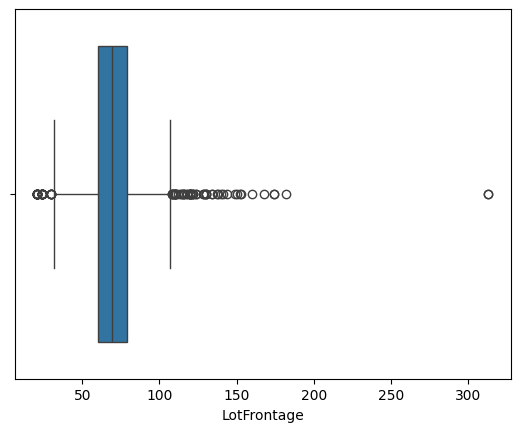

In [148]:
sns.boxplot(x='LotFrontage',data=data3)

In [149]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.LotFrontage, interpolation = 'midpoint') 

IQR

19.0

In [150]:
# First quartile (Q1)
Q1 = data3['LotFrontage'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['LotFrontage'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")


Min Limit: 31.5
Max Limit: 107.5


In [151]:
# Calculate the median of the 'LotFrontage' column
median_value = data3['LotFrontage'].median()

# Replace outliers with the median value
data3['LotFrontage'] = data3['LotFrontage'].apply(lambda x: median_value if (x < 41.5 or x > 93.5) else x)

# Check the updated data
print(data3['LotFrontage'].describe())


count    1460.000000
mean       68.429452
std        10.027643
min        42.000000
25%        63.000000
50%        69.000000
75%        73.000000
max        93.000000
Name: LotFrontage, dtype: float64


<Axes: xlabel='LotFrontage'>

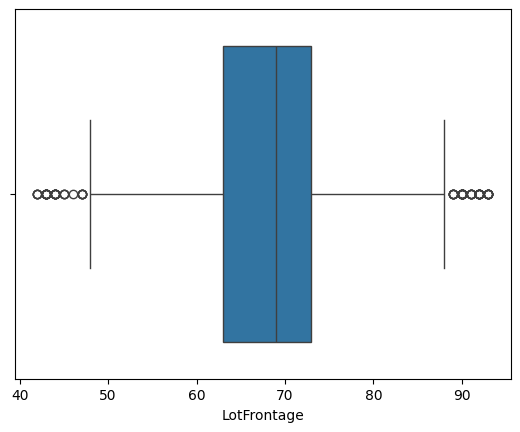

In [152]:
sns.boxplot(x='LotFrontage',data=data3)

### LotArea

<Axes: xlabel='LotArea'>

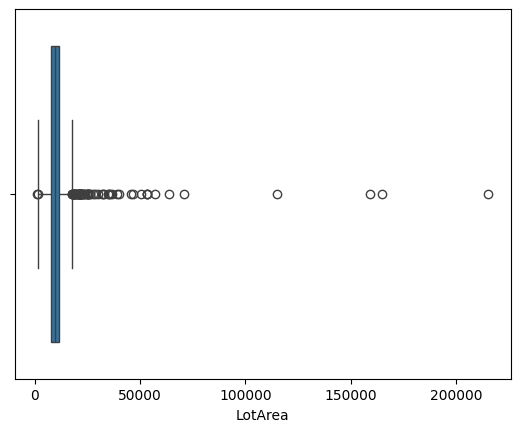

In [153]:
sns.boxplot(x='LotArea',data=data3)

In [154]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.LotArea, interpolation = 'midpoint') 

IQR

4054.0

In [155]:
# First quartile (Q1)
Q1 = data3['LotArea'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['LotArea'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")


Min Limit: 1481.5
Max Limit: 17673.5


In [156]:
# Calculate the median of the 'LotArea' column
median_value = data3['LotArea'].median()

# Replace outliers with the median value
data3['LotArea'] = data3['LotArea'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['LotArea'].describe())

count     1460.000000
mean      9282.270890
std       3120.532187
min       1491.000000
25%       7560.000000
50%       9478.500000
75%      11107.250000
max      17671.000000
Name: LotArea, dtype: float64


In [157]:
#outliers = data3[(data3['LotArea'] < min_limit) | (data3['LotArea'] > max_limit)]
#print(outliers)  # Should print an empty DataFrame


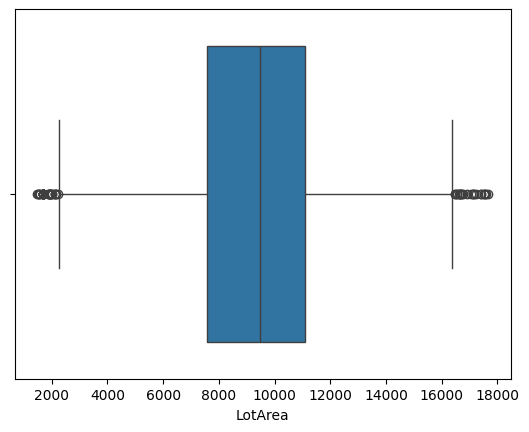

In [158]:
sns.boxplot(x=data3['LotArea'])
plt.show()

### MSSubClass

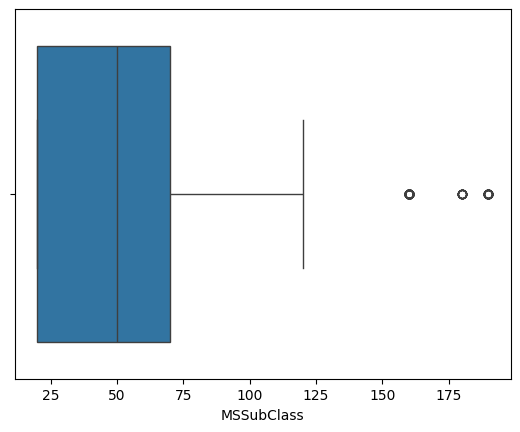

In [159]:
sns.boxplot(x=data3['MSSubClass'])
plt.show()

In [160]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.MSSubClass, interpolation = 'midpoint') 

IQR

50.0

In [161]:
# First quartile (Q1)
Q1 = data3['MSSubClass'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['MSSubClass'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")


Min Limit: -55.0
Max Limit: 145.0


In [162]:
# Calculate the median of the 'LotArea' column
median_value = data3['MSSubClass'].median()

# Replace outliers with the median value
data3['MSSubClass'] = data3['MSSubClass'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['MSSubClass'].describe())

count    1460.000000
mean       48.383562
std        28.160234
min        20.000000
25%        20.000000
50%        50.000000
75%        60.000000
max       120.000000
Name: MSSubClass, dtype: float64


In [163]:
outliers = data3[(data3['MSSubClass'] < min_limit) | (data3['MSSubClass'] > max_limit)]
print(outliers)  # Should print an empty DataFrame


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


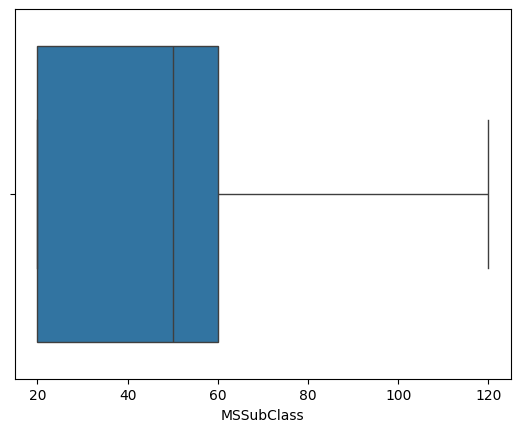

In [164]:
sns.boxplot(x=data3['MSSubClass'])
plt.show()

### OverallQual

<Axes: xlabel='OverallQual'>

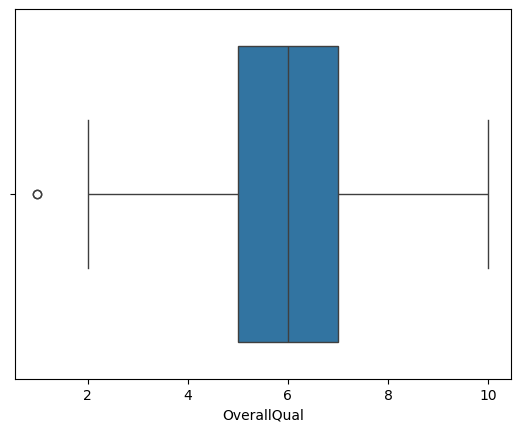

In [165]:
sns.boxplot(x='OverallQual',data=data3)

In [166]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.OverallQual, interpolation = 'midpoint') 

IQR

2.0

In [167]:
# First quartile (Q1)
Q1 = data3['OverallQual'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['OverallQual'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 2.0
Max Limit: 10.0


In [168]:
# Calculate the median of the 'LotArea' column
median_value = data3['OverallQual'].median()

# Replace outliers with the median value
data3['OverallQual'] = data3['OverallQual'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['OverallQual'].describe())

count    1460.000000
mean        6.106164
std         1.370037
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [169]:
outliers = data3[(data3['OverallQual'] < min_limit) | (data3['OverallQual'] > max_limit)]
print(outliers)  # Should print an empty DataFrame


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


<Axes: xlabel='OverallQual'>

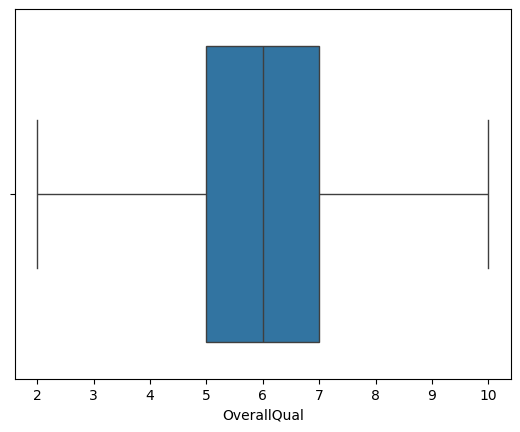

In [170]:
sns.boxplot(x='OverallQual',data=data3)

### OverallCond

<Axes: xlabel='OverallCond'>

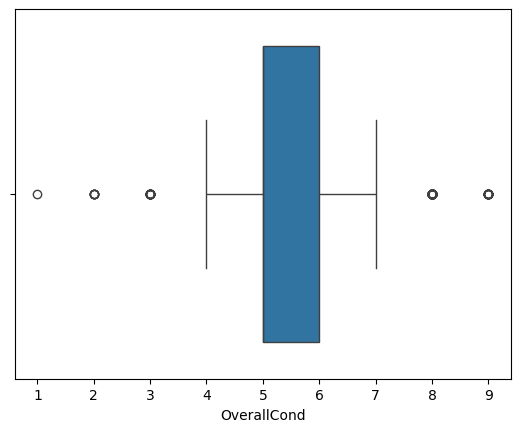

In [171]:
sns.boxplot(x='OverallCond',data=data3)

In [172]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.OverallCond, interpolation = 'midpoint') 

IQR

1.0

In [173]:
# First quartile (Q1)
Q1 = data3['OverallCond'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['OverallCond'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 3.5
Max Limit: 7.5


In [174]:
# Calculate the median of the 'LotArea' column
median_value = data3['OverallCond'].median()

# Replace outliers with the median value
data3['OverallCond'] = data3['OverallCond'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['OverallCond'].describe())

count    1460.000000
mean        5.414384
std         0.775878
min         4.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: OverallCond, dtype: float64


In [175]:
outliers = data3[(data3['OverallCond'] < min_limit) | (data3['OverallCond'] > max_limit)]
print(outliers)  # Should print an empty DataFrame

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


<Axes: xlabel='OverallCond'>

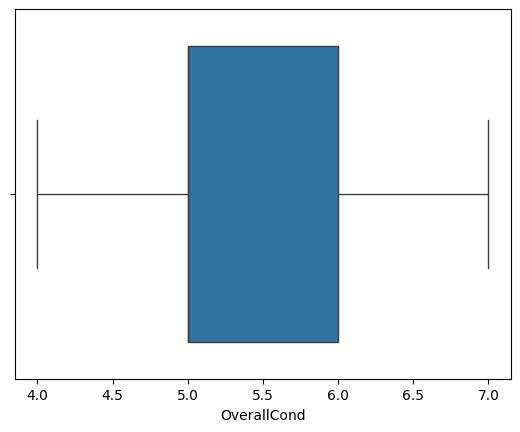

In [176]:
sns.boxplot(x='OverallCond',data=data3)

### YearBuilt

<Axes: xlabel='YearBuilt'>

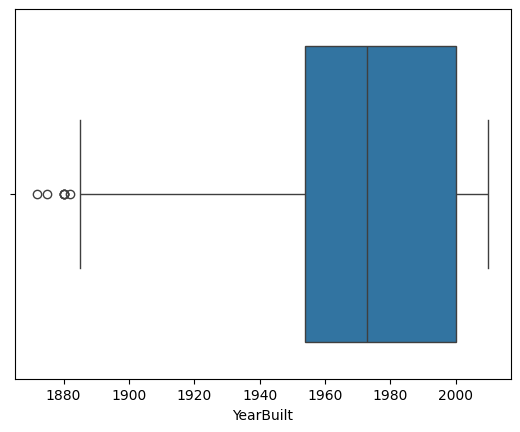

In [177]:
sns.boxplot(x='YearBuilt',data=data3)

In [178]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.YearBuilt, interpolation = 'midpoint') 

IQR

46.0

In [179]:
# First quartile (Q1)
Q1 = data3['YearBuilt'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['YearBuilt'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 1885.0
Max Limit: 2069.0


In [180]:
# Calculate the median of the 'LotArea' column
median_value = data3['YearBuilt'].median()

# Replace outliers with the median value
data3['YearBuilt'] = data3['YearBuilt'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['YearBuilt'].describe())

count    1460.000000
mean     1971.721233
std        29.506258
min      1885.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


<Axes: xlabel='YearBuilt'>

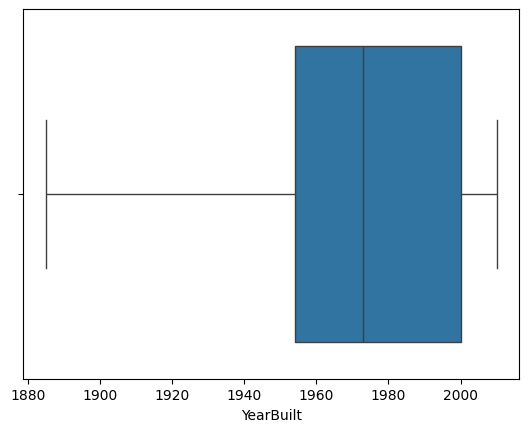

In [181]:
sns.boxplot(x='YearBuilt',data=data3)

### YearRemodAdd

In [182]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.YearRemodAdd, interpolation = 'midpoint') 

IQR

37.0

In [183]:
# First quartile (Q1)
Q1 = data3['YearRemodAdd'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['YearRemodAdd'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 1911.5
Max Limit: 2059.5


In [184]:
# Calculate the median of the 'YearRemodAdd' column
median_value = data3['YearRemodAdd'].median()

# Replace outliers with the median value
data3['YearRemodAdd'] = data3['YearRemodAdd'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['YearRemodAdd'].describe())

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


<Axes: xlabel='YearRemodAdd'>

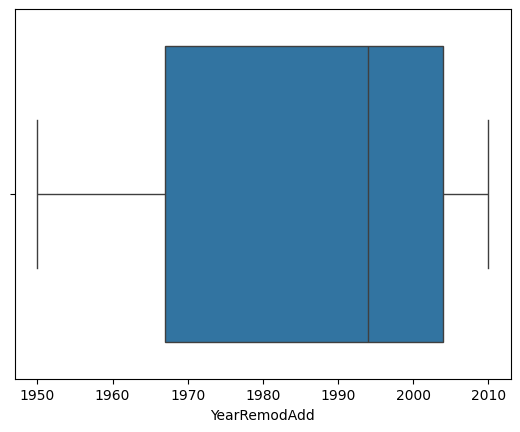

In [185]:
sns.boxplot(x='YearRemodAdd',data=data3)

### MasVnrArea

<Axes: xlabel='MasVnrArea'>

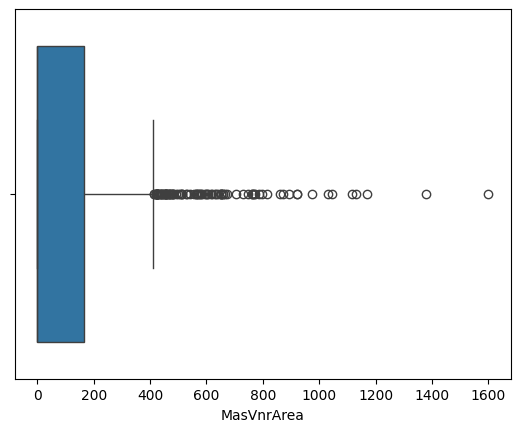

In [186]:
sns.boxplot(x='MasVnrArea',data=data3)

In [187]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.MasVnrArea, interpolation = 'midpoint') 

IQR

164.5

In [188]:
# First quartile (Q1)
Q1 = data3['MasVnrArea'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['MasVnrArea'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -246.375
Max Limit: 410.625


In [189]:
median_value = data3['MasVnrArea'].median()

# Replace outliers with the median value
data3['MasVnrArea'] = data3['MasVnrArea'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['MasVnrArea'].describe())

count    1460.000000
mean       61.843836
std       103.955691
min         0.000000
25%         0.000000
50%         0.000000
75%       106.000000
max       410.000000
Name: MasVnrArea, dtype: float64


<Axes: xlabel='MasVnrArea'>

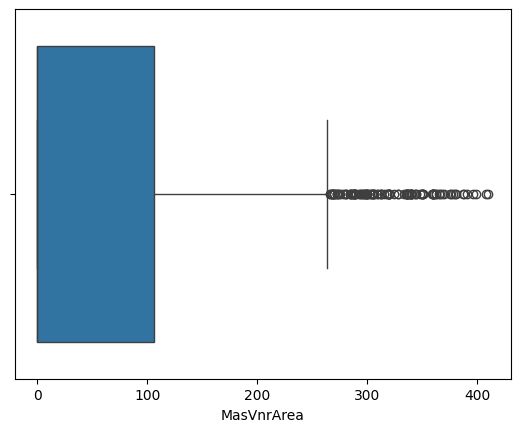

In [190]:
sns.boxplot(x='MasVnrArea',data=data3)

### BsmtFinSF1

<Axes: xlabel='BsmtFinSF1'>

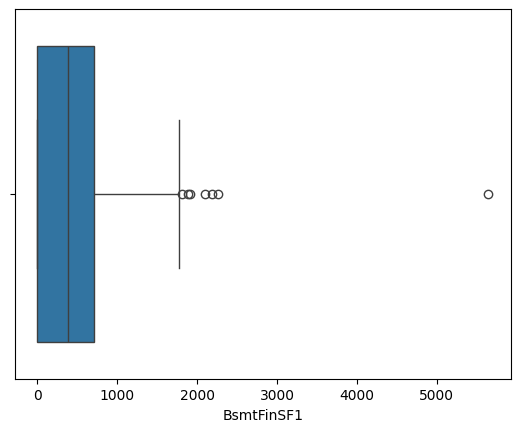

In [191]:
sns.boxplot(x='BsmtFinSF1',data=data3)

In [192]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.BsmtFinSF1, interpolation = 'midpoint') 

IQR

712.5

In [193]:
# First quartile (Q1)
Q1 = data3['BsmtFinSF1'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BsmtFinSF1'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -1068.375
Max Limit: 1780.625


In [194]:
median_value = data3['BsmtFinSF1'].median()

# Replace outliers with the median value
data3['BsmtFinSF1'] = data3['BsmtFinSF1'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['BsmtFinSF1'].describe())

count    1460.000000
mean      433.298973
std       423.115209
min         0.000000
25%         0.000000
50%       383.250000
75%       702.500000
max      1767.000000
Name: BsmtFinSF1, dtype: float64


<Axes: xlabel='BsmtFinSF1'>

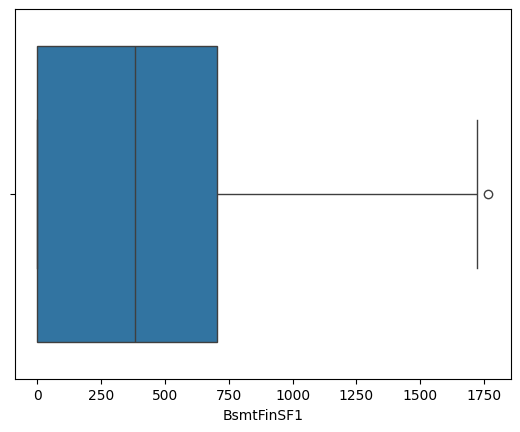

In [195]:
sns.boxplot(x='BsmtFinSF1',data=data3)

### BsmtFinSF2

<Axes: xlabel='BsmtFinSF2'>

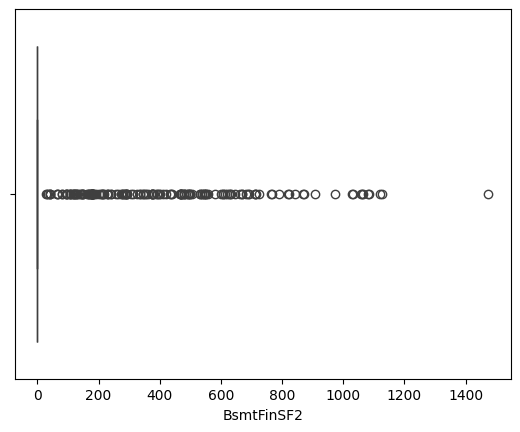

In [196]:
sns.boxplot(x='BsmtFinSF2',data=data3)

### As these column gives IQR and min ,max 0 - will drop this .

In [197]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.BsmtFinSF2, interpolation = 'midpoint') 

IQR

0.0

In [198]:
Q1 = data3['BsmtFinSF2'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BsmtFinSF2'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


### BsmtUnfSF

<Axes: xlabel='BsmtUnfSF'>

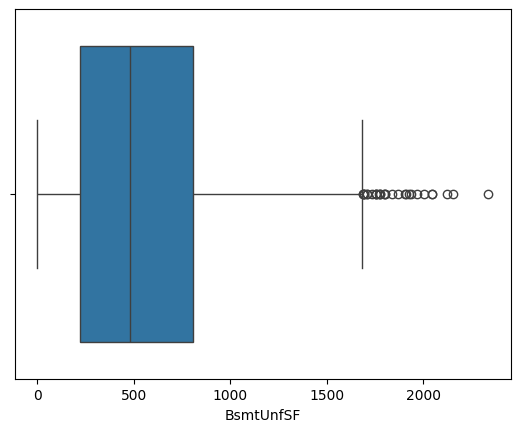

In [199]:
sns.boxplot(x='BsmtUnfSF',data=data3)

In [200]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.BsmtUnfSF, interpolation = 'midpoint') 

IQR

585.0

In [201]:
# First quartile (Q1)
Q1 = data3['BsmtUnfSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BsmtUnfSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -654.5
Max Limit: 1685.5


In [202]:
median_value = data3['BsmtUnfSF'].median()

# Replace outliers with the median value
data3['BsmtUnfSF'] = data3['BsmtUnfSF'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['BsmtUnfSF'].describe())

count    1460.000000
mean      539.783219
std       401.167737
min         0.000000
25%       223.000000
50%       476.750000
75%       779.250000
max      1680.000000
Name: BsmtUnfSF, dtype: float64


<Axes: xlabel='BsmtUnfSF'>

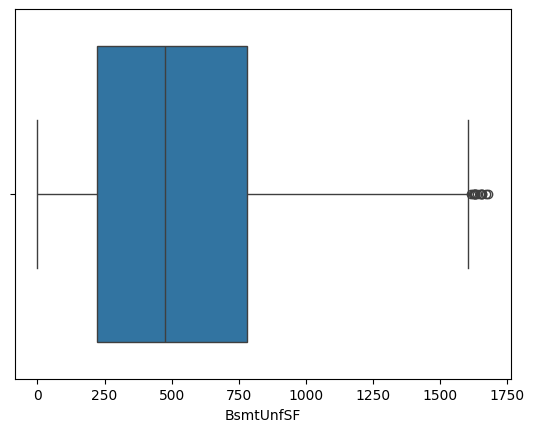

In [203]:
sns.boxplot(x='BsmtUnfSF',data=data3)

### TotalBsmtSF

<Axes: xlabel='TotalBsmtSF'>

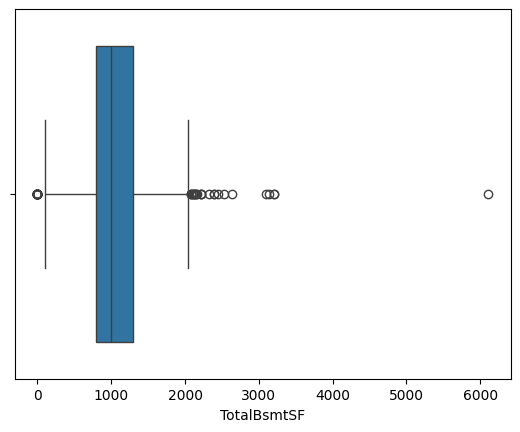

In [204]:
sns.boxplot(x='TotalBsmtSF',data=data3)

In [205]:
## using IQR to remove the outliers
IQR = stats.iqr(data3.TotalBsmtSF, interpolation = 'midpoint') 

IQR

503.0

In [206]:
# First quartile (Q1)
Q1 = data3['TotalBsmtSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['TotalBsmtSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 42.0
Max Limit: 2052.0


In [207]:
median_value = data3['TotalBsmtSF'].median()

# Replace outliers with the median value
data3['TotalBsmtSF'] = data3['TotalBsmtSF'].apply(lambda x: median_value if (x < 42.0 or x > max_limit) else x)

# Check the updated data
print(data3['TotalBsmtSF'].describe())

count    1460.000000
mean     1056.884589
std       340.833638
min       105.000000
25%       816.000000
50%       991.500000
75%      1264.500000
max      2046.000000
Name: TotalBsmtSF, dtype: float64


<Axes: xlabel='TotalBsmtSF'>

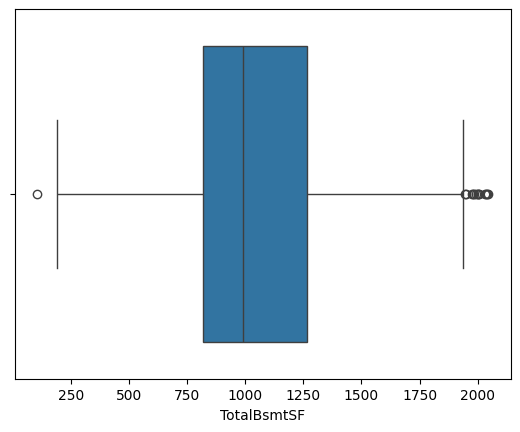

In [208]:
sns.boxplot(x='TotalBsmtSF',data=data3)

### 1stFlrSF

<Axes: xlabel='1stFlrSF'>

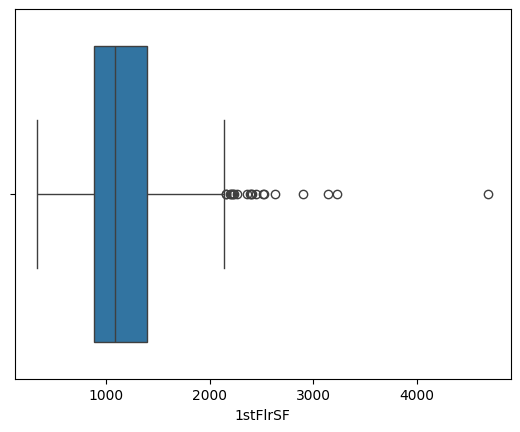

In [209]:
sns.boxplot(x='1stFlrSF',data=data3)

In [210]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['1stFlrSF'], interpolation = 'midpoint') 

IQR

509.5

In [211]:
# First quartile (Q1)
Q1 = data3['1stFlrSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['1stFlrSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 118.125
Max Limit: 2155.125


In [212]:
median_value = data3['1stFlrSF'].median()

# Replace outliers with the median value
data3['1stFlrSF'] = data3['1stFlrSF'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['1stFlrSF'].describe())

count    1460.000000
mean     1142.386301
std       343.020748
min       334.000000
25%       882.000000
50%      1086.500000
75%      1368.000000
max      2136.000000
Name: 1stFlrSF, dtype: float64


<Axes: xlabel='1stFlrSF'>

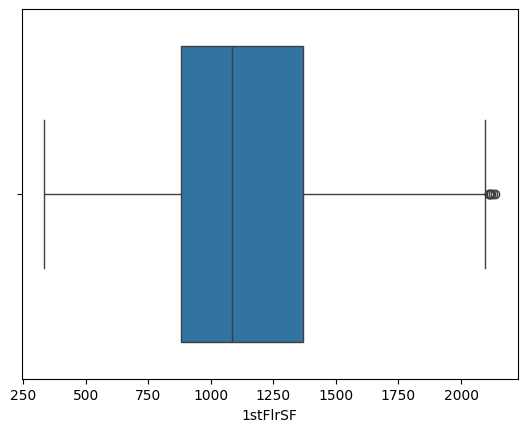

In [213]:
sns.boxplot(x='1stFlrSF',data=data3)

### 2ndFlrSF

<Axes: xlabel='2ndFlrSF'>

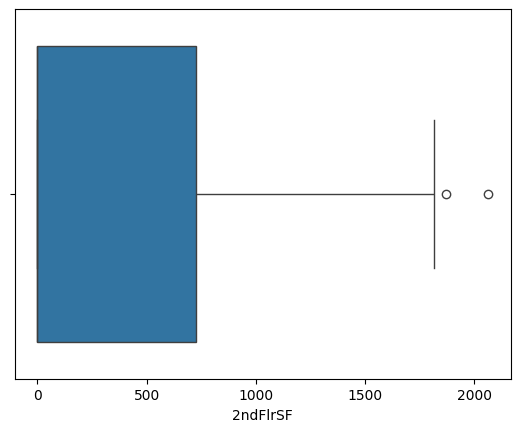

In [214]:
sns.boxplot(x='2ndFlrSF',data=data3)

In [215]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['2ndFlrSF'], interpolation = 'midpoint') 

IQR

728.0

In [216]:
# First quartile (Q1)
Q1 = data3['2ndFlrSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['2ndFlrSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -1092.0
Max Limit: 1820.0


In [217]:
median_value = data3['2ndFlrSF'].median()

# Replace outliers with the median value
data3['2ndFlrSF'] = data3['2ndFlrSF'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['2ndFlrSF'].describe())

count    1460.000000
mean      344.295890
std       432.548092
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1818.000000
Name: 2ndFlrSF, dtype: float64


<Axes: xlabel='2ndFlrSF'>

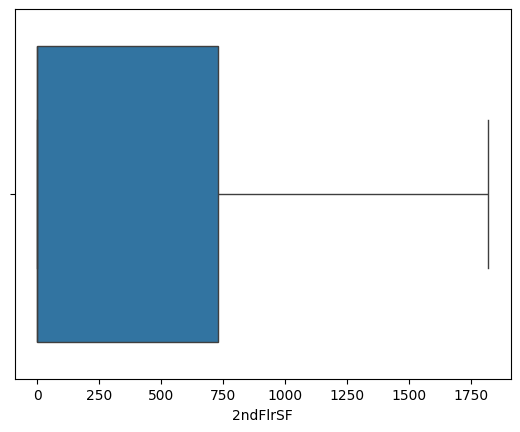

In [218]:
sns.boxplot(x='2ndFlrSF',data=data3)

### LowQualFinSF

### As these column gives IQR and min ,max 0 - will drop this .

<Axes: xlabel='LowQualFinSF'>

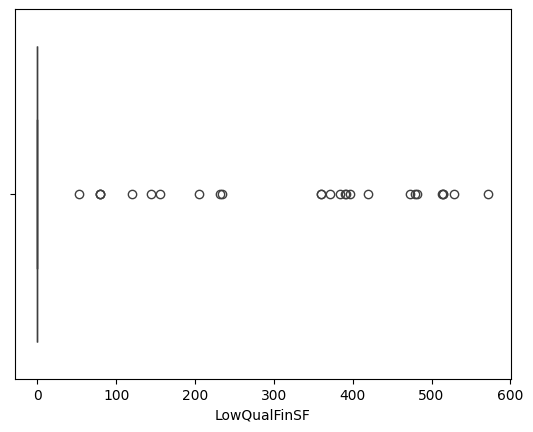

In [219]:
sns.boxplot(x='LowQualFinSF',data=data3)

In [220]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['LowQualFinSF'], interpolation = 'midpoint') 

IQR

0.0

In [221]:
# First quartile (Q1)
Q1 = data3['LowQualFinSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['LowQualFinSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


In [222]:
print(data3['LowQualFinSF'].describe())


count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


### IQR :
Measures the spread of the middle 50% of data. If all values are identical, 75th percentile - 25th percentile = 0.
### Min and Max: 
Both will be the same as the constant value in the column.

### GrLivArea

<Axes: xlabel='GrLivArea'>

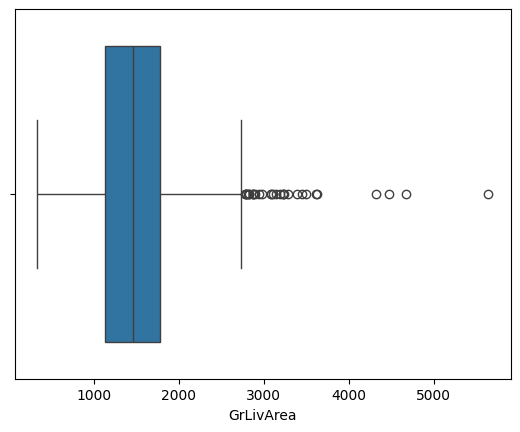

In [223]:
sns.boxplot(x='GrLivArea',data=data3)

In [224]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['GrLivArea'], interpolation = 'midpoint') 

IQR

648.5

In [225]:
# First quartile (Q1)
Q1 = data3['GrLivArea'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['GrLivArea'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 158.625
Max Limit: 2747.625


In [226]:
median_value = data3['GrLivArea'].median()

# Replace outliers with the median value
data3['GrLivArea'] = data3['GrLivArea'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['GrLivArea'].describe())

count    1460.000000
mean     1476.480822
std       445.126283
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1735.000000
max      2730.000000
Name: GrLivArea, dtype: float64


<Axes: xlabel='GrLivArea'>

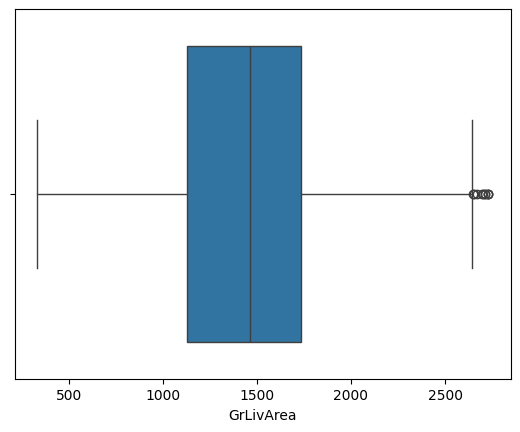

In [227]:
sns.boxplot(x='GrLivArea',data=data3)

###  BsmtFullBath

<Axes: xlabel='BsmtFullBath'>

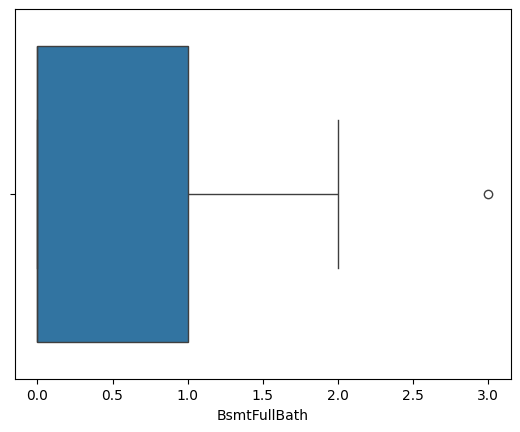

In [228]:
sns.boxplot(x='BsmtFullBath',data=data3)

In [229]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['BsmtFullBath'], interpolation = 'midpoint') 

IQR

1.0

In [230]:
# First quartile (Q1)
Q1 = data3['BsmtFullBath'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BsmtFullBath'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -1.5
Max Limit: 2.5


In [231]:
median_value = data3['BsmtFullBath'].median()

# Replace outliers with the median value
data3['BsmtFullBath'] = data3['BsmtFullBath'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['BsmtFullBath'].describe())

count    1460.000000
mean        0.423288
std         0.514631
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: BsmtFullBath, dtype: float64


<Axes: xlabel='BsmtFullBath'>

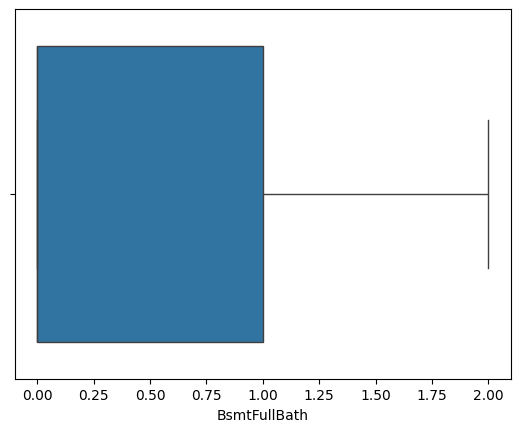

In [232]:
sns.boxplot(x='BsmtFullBath',data=data3)

### BsmtHalfBath

<Axes: xlabel='BsmtHalfBath'>

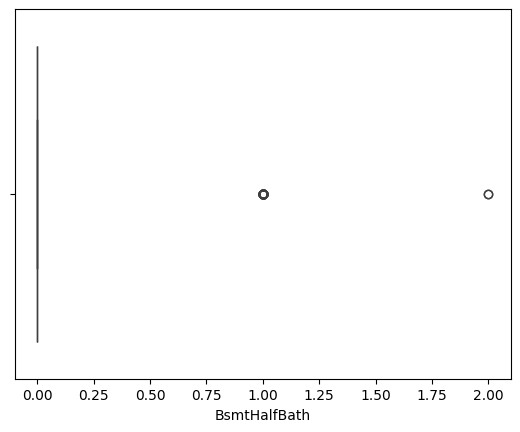

In [233]:
sns.boxplot(x='BsmtHalfBath',data=data3)

In [234]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['BsmtHalfBath'], interpolation = 'midpoint') 

IQR

0.0

In [235]:
# First quartile (Q1)
Q1 = data3['BsmtHalfBath'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BsmtHalfBath'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


### HalfBath

<Axes: xlabel='HalfBath'>

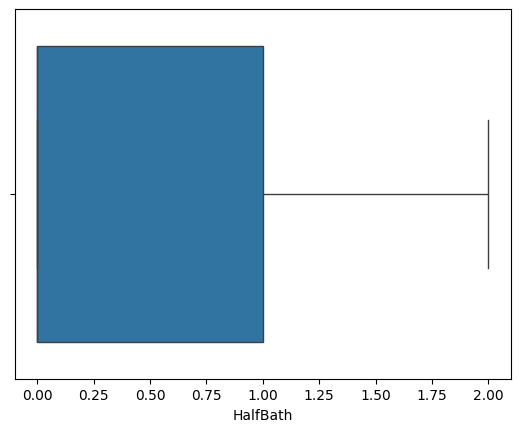

In [236]:
sns.boxplot(x='HalfBath',data=data3) # no outliers

### FullBath

<Axes: xlabel='FullBath'>

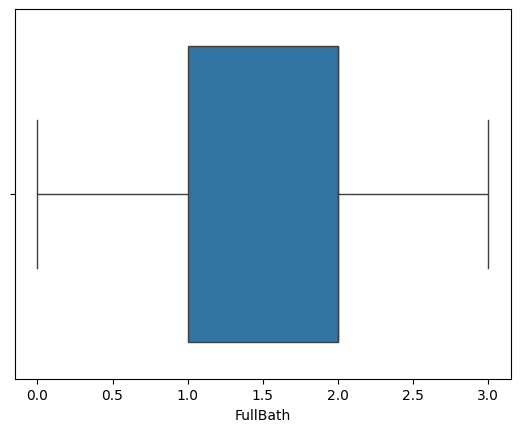

In [237]:
sns.boxplot(x='FullBath',data=data3) # no outliers

### BedroomAbvGr

<Axes: xlabel='BedroomAbvGr'>

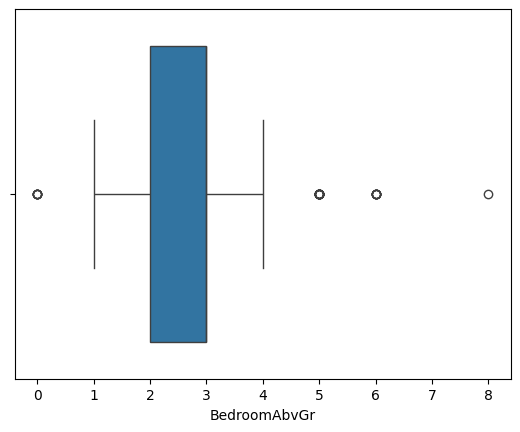

In [238]:
sns.boxplot(x='BedroomAbvGr',data=data3)

In [239]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['BedroomAbvGr'], interpolation = 'midpoint') 

IQR

1.0

In [240]:
# First quartile (Q1)
Q1 = data3['BedroomAbvGr'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['BedroomAbvGr'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.5
Max Limit: 4.5


In [241]:
median_value = data3['BedroomAbvGr'].median()

# Replace outliers with the median value
data3['BedroomAbvGr'] = data3['BedroomAbvGr'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['BedroomAbvGr'].describe())

count    1460.000000
mean        2.832192
std         0.707294
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: BedroomAbvGr, dtype: float64


<Axes: xlabel='BedroomAbvGr'>

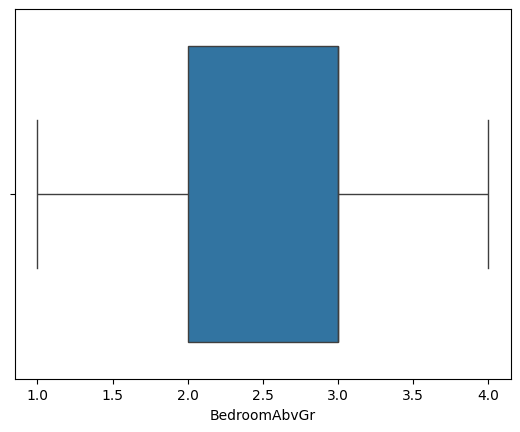

In [242]:
sns.boxplot(x='BedroomAbvGr',data=data3)

### KitchenAbvGr

<Axes: xlabel='KitchenAbvGr'>

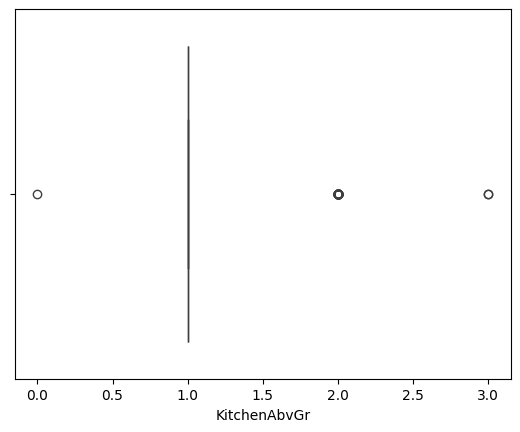

In [243]:
sns.boxplot(x='KitchenAbvGr',data=data3)

In [244]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['KitchenAbvGr'], interpolation = 'midpoint') 

IQR

0.0

In [245]:
# First quartile (Q1)
Q1 = data3['KitchenAbvGr'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['KitchenAbvGr'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 1.0
Max Limit: 1.0


In [246]:
median_value = data3['KitchenAbvGr'].median()

# Replace outliers with the median value
data3['KitchenAbvGr'] = data3['KitchenAbvGr'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['KitchenAbvGr'].describe())

count    1460.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: KitchenAbvGr, dtype: float64


<Axes: xlabel='KitchenAbvGr'>

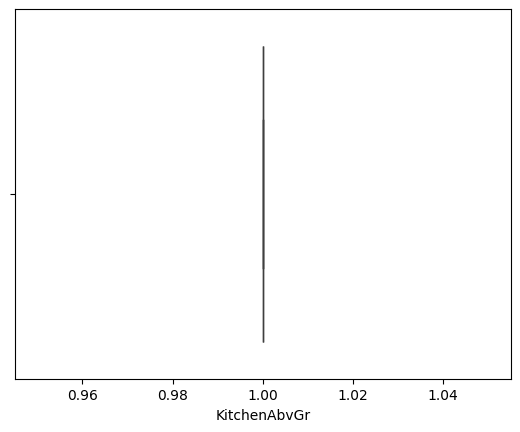

In [247]:
sns.boxplot(x='KitchenAbvGr',data=data3)

### TotRmsAbvGrd

<Axes: xlabel='TotRmsAbvGrd'>

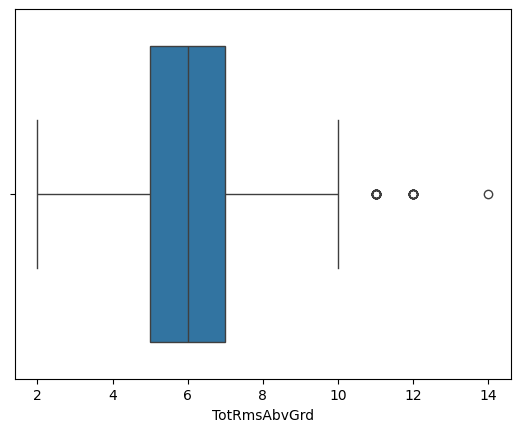

In [248]:
sns.boxplot(x='TotRmsAbvGrd',data=data3)

In [249]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['TotRmsAbvGrd'], interpolation = 'midpoint') 

IQR

2.0

In [250]:
# First quartile (Q1)
Q1 = data3['TotRmsAbvGrd'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['TotRmsAbvGrd'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 2.0
Max Limit: 10.0


In [251]:
median_value = data3['TotRmsAbvGrd'].median()

# Replace outliers with the median value
data3['TotRmsAbvGrd'] = data3['TotRmsAbvGrd'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['TotRmsAbvGrd'].describe())

count    1460.000000
mean        6.405479
std         1.456699
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: TotRmsAbvGrd, dtype: float64


<Axes: xlabel='TotRmsAbvGrd'>

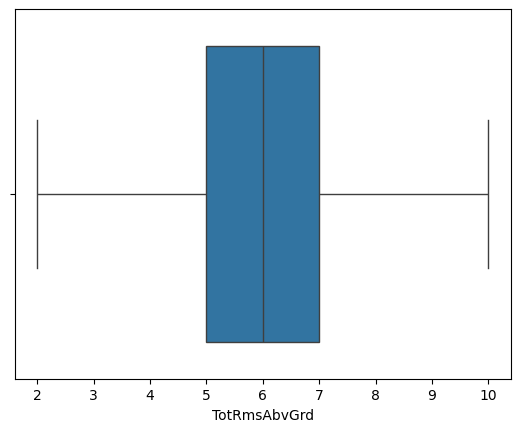

In [252]:
sns.boxplot(x='TotRmsAbvGrd',data=data3)

### Fireplaces

<Axes: xlabel='Fireplaces'>

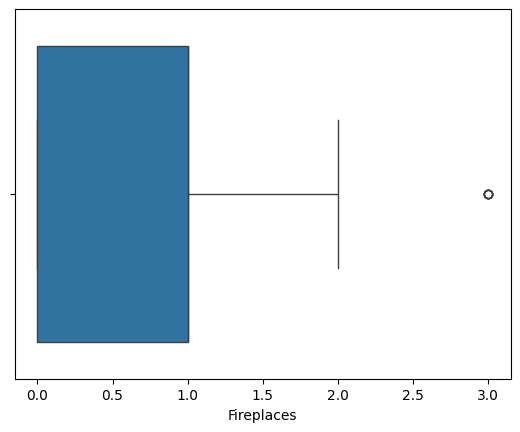

In [253]:
sns.boxplot(x='Fireplaces',data=data3)

In [254]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['Fireplaces'], interpolation = 'midpoint') 

IQR

1.0

In [255]:
# First quartile (Q1)
Q1 = data3['Fireplaces'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['Fireplaces'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -1.5
Max Limit: 2.5


In [256]:
median_value = data3['Fireplaces'].median()

# Replace outliers with the median value
data3['Fireplaces'] = data3['Fireplaces'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['Fireplaces'].describe())

count    1460.000000
mean        0.606164
std         0.629710
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Fireplaces, dtype: float64


<Axes: xlabel='Fireplaces'>

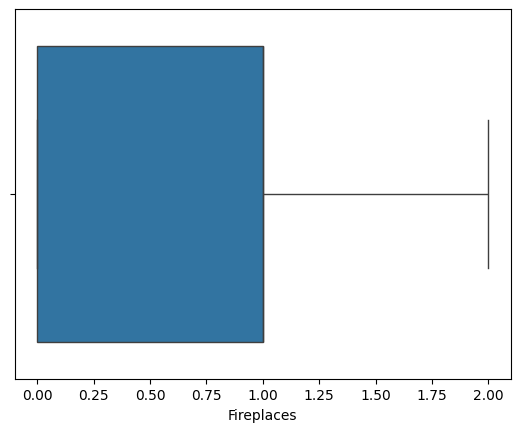

In [257]:
sns.boxplot(x='Fireplaces',data=data3)

### GarageYrBlt

<Axes: xlabel='GarageYrBlt'>

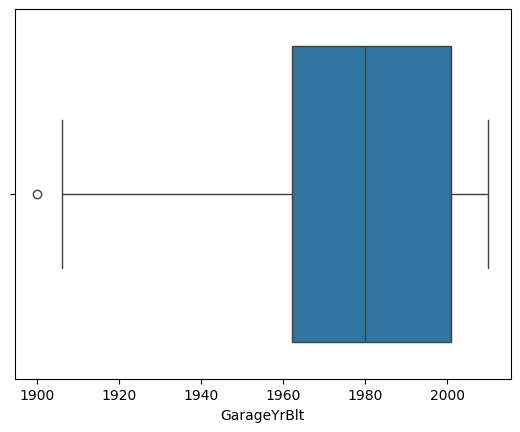

In [258]:
sns.boxplot(x='GarageYrBlt',data=data3)

In [259]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['GarageYrBlt'], interpolation = 'midpoint') 

IQR

39.0

In [260]:
# First quartile (Q1)
Q1 = data3['GarageYrBlt'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['GarageYrBlt'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 1903.5
Max Limit: 2059.5


In [261]:
median_value = data3['GarageYrBlt'].median()

# Replace outliers with the median value
data3['GarageYrBlt'] = data3['GarageYrBlt'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['GarageYrBlt'].describe())

count    1460.000000
mean     1978.643836
std        23.908622
min      1906.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


<Axes: xlabel='GarageYrBlt'>

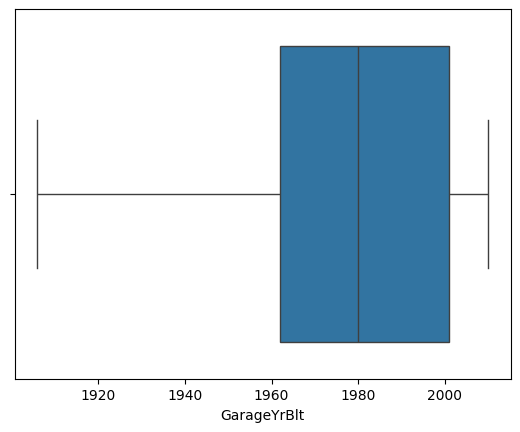

In [262]:
sns.boxplot(x='GarageYrBlt',data=data3)

### GarageCars

<Axes: xlabel='GarageCars'>

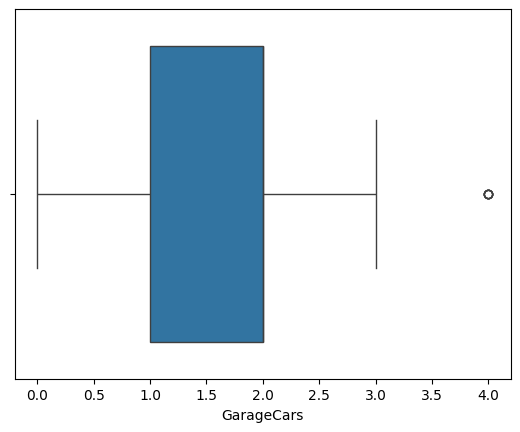

In [263]:
sns.boxplot(x='GarageCars',data=data3)

In [264]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['GarageCars'], interpolation = 'midpoint') 

IQR

1.0

In [265]:
# First quartile (Q1)
Q1 = data3['GarageCars'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['GarageCars'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -0.5
Max Limit: 3.5


In [266]:
median_value = data3['GarageCars'].median()

# Replace outliers with the median value
data3['GarageCars'] = data3['GarageCars'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['GarageCars'].describe())

count    1460.000000
mean        1.760274
std         0.735889
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: GarageCars, dtype: float64


<Axes: xlabel='GarageCars'>

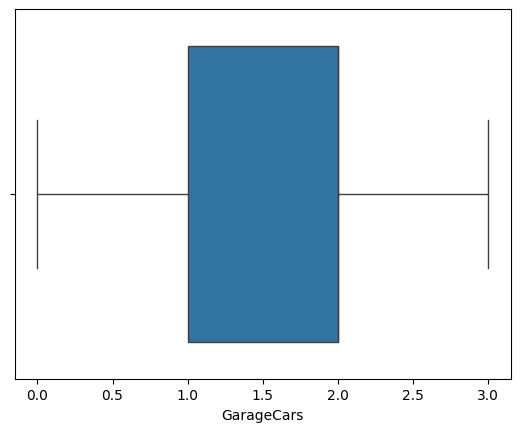

In [267]:
sns.boxplot(x='GarageCars',data=data3)

### GarageArea

<Axes: xlabel='GarageArea'>

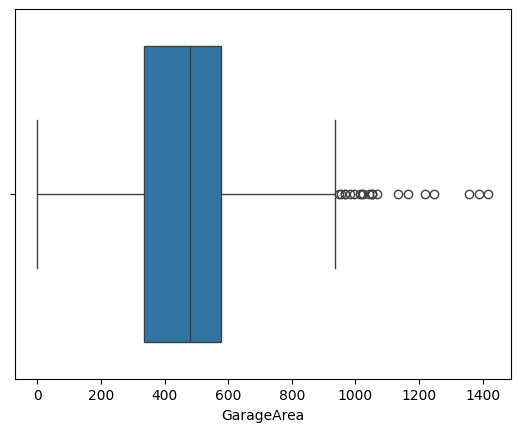

In [268]:
sns.boxplot(x='GarageArea',data=data3)

In [269]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['GarageArea'], interpolation = 'midpoint') 

IQR

243.0

In [270]:
# First quartile (Q1)
Q1 = data3['GarageArea'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['GarageArea'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -27.75
Max Limit: 938.25


In [271]:
median_value = data3['GarageArea'].median()

# Replace outliers with the median value
data3['GarageArea'] = data3['GarageArea'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['GarageArea'].describe())

count    1460.000000
mean      464.079452
std       199.257929
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max       936.000000
Name: GarageArea, dtype: float64


<Axes: xlabel='GarageArea'>

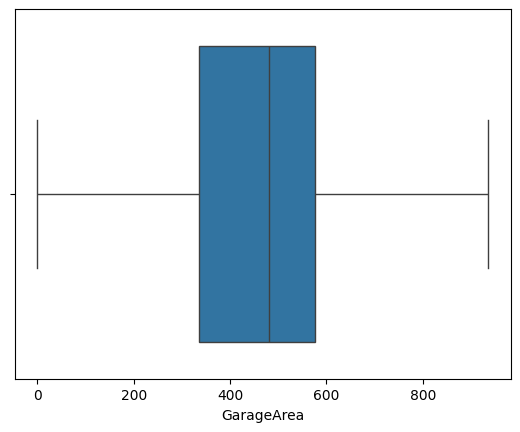

In [272]:
sns.boxplot(x='GarageArea',data=data3)

### WoodDeckSF

<Axes: xlabel='WoodDeckSF'>

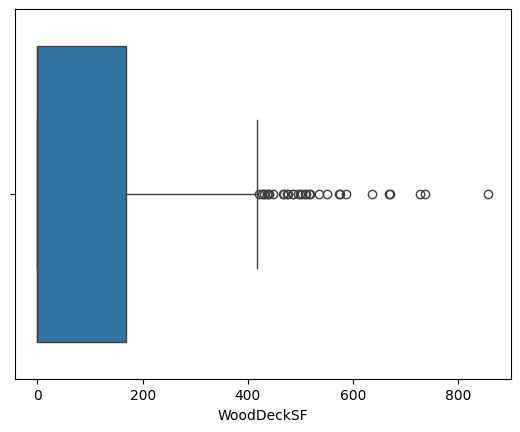

In [273]:
sns.boxplot(x='WoodDeckSF',data=data3)

In [274]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['WoodDeckSF'], interpolation = 'midpoint') 

IQR

168.0

In [275]:
# First quartile (Q1)
Q1 = data3['WoodDeckSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['WoodDeckSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -252.0
Max Limit: 420.0


In [276]:
median_value = data3['WoodDeckSF'].median()

# Replace outliers with the median value
data3['WoodDeckSF'] = data3['WoodDeckSF'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['WoodDeckSF'].describe())

count    1460.000000
mean       82.601370
std       106.521253
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max       418.000000
Name: WoodDeckSF, dtype: float64


<Axes: xlabel='WoodDeckSF'>

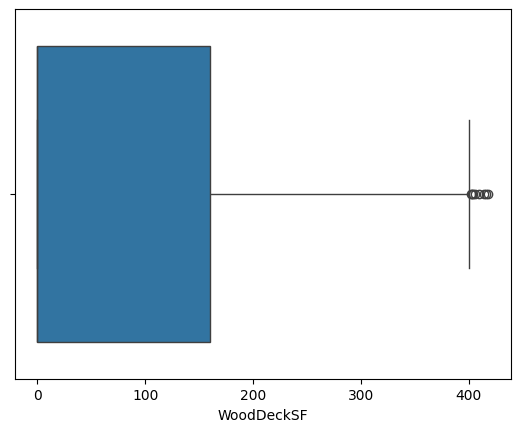

In [277]:
sns.boxplot(x='WoodDeckSF',data=data3)

### OpenPorchSF

<Axes: xlabel='OpenPorchSF'>

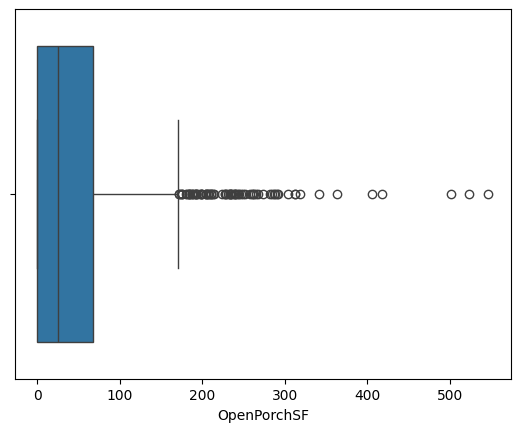

In [278]:
sns.boxplot(x='OpenPorchSF',data=data3)

In [279]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['OpenPorchSF'], interpolation = 'midpoint') 

IQR

68.0

In [280]:
# First quartile (Q1)
Q1 = data3['OpenPorchSF'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['OpenPorchSF'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: -102.0
Max Limit: 170.0


In [281]:
median_value = data3['OpenPorchSF'].median()

# Replace outliers with the median value
data3['OpenPorchSF'] = data3['OpenPorchSF'].apply(lambda x: median_value if (x < min_limit or x > max_limit) else x)

# Check the updated data
print(data3['OpenPorchSF'].describe())

count    1460.000000
mean       34.956164
std        43.101083
min         0.000000
25%         0.000000
50%        25.000000
75%        56.000000
max       170.000000
Name: OpenPorchSF, dtype: float64


<Axes: xlabel='OpenPorchSF'>

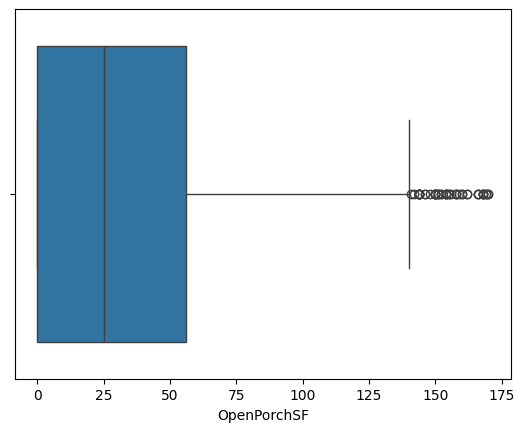

In [282]:
sns.boxplot(x='OpenPorchSF',data=data3)

### EnclosedPorch

<Axes: xlabel='EnclosedPorch'>

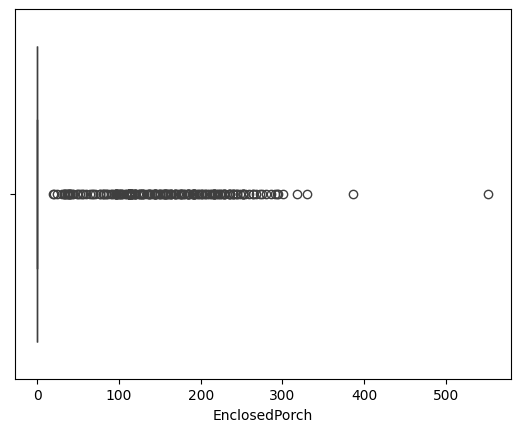

In [283]:
sns.boxplot(x='EnclosedPorch',data=data3)

In [284]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['EnclosedPorch'], interpolation = 'midpoint') 

IQR

0.0

In [285]:
# First quartile (Q1)
Q1 = data3['EnclosedPorch'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['EnclosedPorch'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


In [286]:
print(data3['EnclosedPorch'].describe())


count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


## Insights
 Highly Skewed Data:

### The majority of values are 0.
A few houses have significantly large enclosed porches, which are outliers.

### Potential Issues:
The column might not provide meaningful predictive power due to the overwhelming number of 0s.

### 3SsnPorch

<Axes: xlabel='3SsnPorch'>

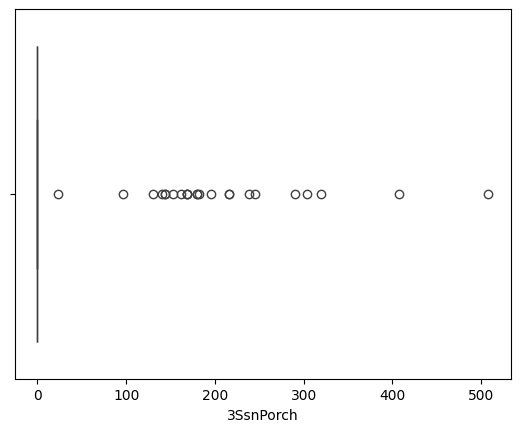

In [287]:
sns.boxplot(x='3SsnPorch',data=data3)

In [288]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['3SsnPorch'], interpolation = 'midpoint') 

IQR

0.0

In [289]:
# First quartile (Q1)
Q1 = data3['3SsnPorch'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['3SsnPorch'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


In [290]:
print(data3['3SsnPorch'].describe())

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


# Insights:
### Highly Skewed Distribution:

Most houses have a 3SsnPorch value of 0, meaning they do not have a 3-season porch.
A small number of houses have a large 3-season porch (outliers).

### Low Variability:
This column has limited variability, which means it's not likely to contribute much to models unless handled properly.


### ScreenPorch

<Axes: xlabel='ScreenPorch'>

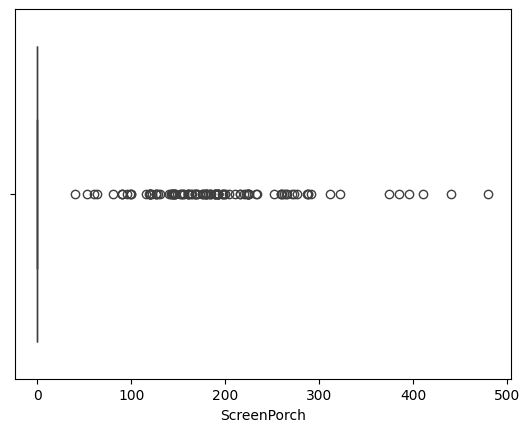

In [291]:
sns.boxplot(x='ScreenPorch',data=data3)

In [292]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['ScreenPorch'], interpolation = 'midpoint') 

IQR

0.0

In [293]:
# First quartile (Q1)
Q1 = data3['ScreenPorch'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['ScreenPorch'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


In [294]:
print(data3['ScreenPorch'].describe())

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


### Highly Skewed Distribution:
Most homes do not have a screened porch, as indicated by the dominant 0 values.
A few homes have a larger screened porch (outliers), which is reflected by the non-zero max value.

### Low Variability:
The column likely does not provide much variability for prediction, since most values are 0. This is similar to the other porch-related columns you've encountered.
The few larger values may not significantly influence predictive models unless handled properly.

### PoolArea

<Axes: xlabel='PoolArea'>

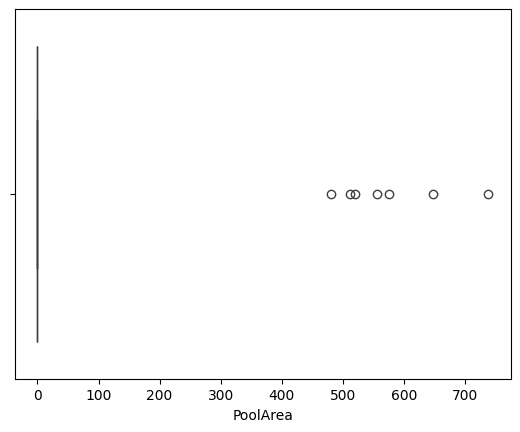

In [295]:
sns.boxplot(x='PoolArea',data=data3)

In [296]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['PoolArea'], interpolation = 'midpoint') 

IQR

0.0

In [297]:
# First quartile (Q1)
Q1 = data3['PoolArea'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['PoolArea'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


### Highly Skewed Distribution:
Most houses have 0 for PoolArea, meaning they don't have a pool.
A few houses with large values (outliers) suggest that only a small number of houses have a pool.

### Low Variability:
Since PoolArea has many 0 values and only a few large values, it likely won't contribute much to a model unless the outliers are meaningful.

### MiscVal

<Axes: xlabel='MiscVal'>

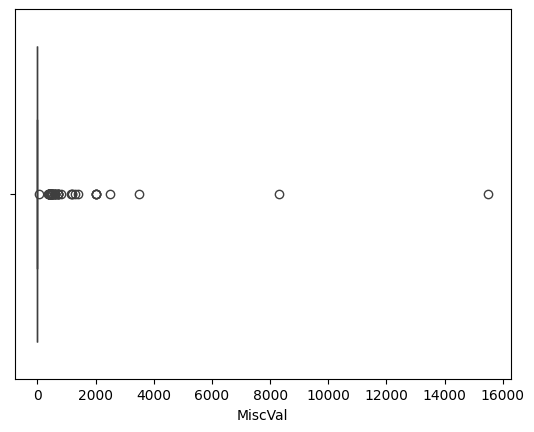

In [298]:
sns.boxplot(x='MiscVal',data=data3)

In [299]:
## using IQR to remove the outliers
IQR = stats.iqr(data3['MiscVal'], interpolation = 'midpoint') 

IQR

0.0

In [300]:
# First quartile (Q1)
Q1 = data3['MiscVal'].quantile(0.25)

# Third quartile (Q3)
Q3 = data3['MiscVal'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds (min and max limits)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

print(f"Min Limit: {min_limit}")
print(f"Max Limit: {max_limit}")

Min Limit: 0.0
Max Limit: 0.0


In [301]:
print(data3['MiscVal'].describe())

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


### Highly Sparse Data:
The column has mostly 0s, indicating that most houses do not have any miscellaneous value associated with them.
A small number of houses have large values, which might represent features like special additions or extra attributes (e.g., a pool, a finished basement, or additional outbuildings).

### Potential Outliers:
Like PoolArea, the high values are outliers. These might be indicative of a special feature that contributes significantly to the property's value but applies to only a small subset of houses.

### MoSold

<Axes: xlabel='MoSold'>

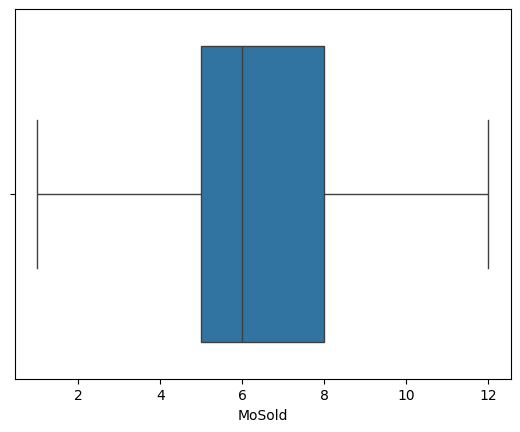

In [302]:
sns.boxplot(x='MoSold',data=data3) # no outliers

###  YrSold

<Axes: xlabel='YrSold'>

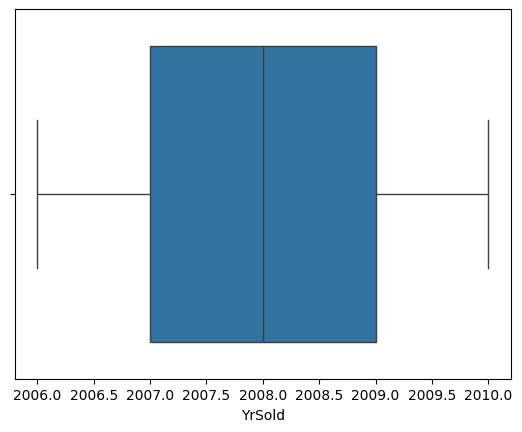

In [303]:
sns.boxplot(x='YrSold',data=data3) # no outliers

In [304]:
data3.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           6
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [305]:
data3['GarageType'].fillna(data3['GarageType'].mode()[0], inplace=True)

In [306]:
data3['RoofMatl'].fillna(data3['RoofMatl'].mode()[0], inplace=True)

In [307]:
data3.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

# Scaling

## MinMaxScaler

In [308]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data3[['LotFrontage','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]=scale.fit_transform(data3[['LotFrontage','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']])

In [309]:
data3.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1        60.0         3     0.450980   8450.0       1      0         3   
1   2        20.0         3     0.745098   9600.0       1      0         3   
2   3        60.0         3     0.509804  11250.0       1      0         0   
3   4        70.0         3     0.352941   9550.0       1      0         0   
4   5        60.0         3     0.823529  14260.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             5           2   
1            0          0          3          0            24           1   
2            0          0          0          0             5           2   
3            0          0          1          0             6           2   
4            0          0          3          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           1        0.625     0.333333      0.944   
1           2         0           0        0.500     0.333333      0.728   
2           2         0           1        0.625     0.333333      0.928   
3           2         0           1        0.625     0.333333      0.240   
4           2         0           1        0.750     0.333333      0.920   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.883333          0       0.0            0           13           0   
1      0.433333          0       0.0            1            8           0   
2      0.866667          0       0.0            0           13           0   
3      0.333333          0       0.0            2           15           0   
4      0.833333          0       0.0            0           13           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.478049          0          0           0         1         0   
1    0.000000          1          0           1         1         0   
2    0.395122          0          0           0         1         0   
3    0.000000          1          0           2         0         1   
4    0.853659          0          0           0         1         0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2    0.399547             2         0.0   
1             1             0    0.553480             0         0.0   
2             2             2    0.275042             2         0.0   
3             3             0    0.122241             0         0.0   
4             0             2    0.370685             2         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.089286     0.386914        1          0           1           0   
1   0.169048     0.596084        1          0           1           0   
2   0.258333     0.419887        1          0           1           0   
3   0.321429     0.335394        1          2           1           0   
4   0.291667     0.535806        1          0           1           0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.289678  0.469747           0.0   0.574290           0.5           0.0   
1  0.514983  0.000000           0.0   0.387312           0.0           0.5   
2  0.325194  0.476348           0.0   0.606010           0.5           0.0   
3  0.347947  0.415842           0.0   0.577212           0.5           0.0   
4  0.450055  0.579208           0.0   0.777963           0.5           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5      0.666667           0.0            1         0.750   
1  0.666667       0.0      0.666667           0.0            0         0.500   
2  0.666667       0.5      0.666667           0.0            1         0.500   
3  0.333333       0.0      0.666667           0.0            1 

## Standard Scaler

#### i was getting best score with MinMax scaler - so thats the reason i m not using Standard scaling

# Feature Engineering

In [310]:
data3.drop(columns=['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal'], inplace=True)

In [311]:
data3.drop('Id',axis=1,inplace=True)

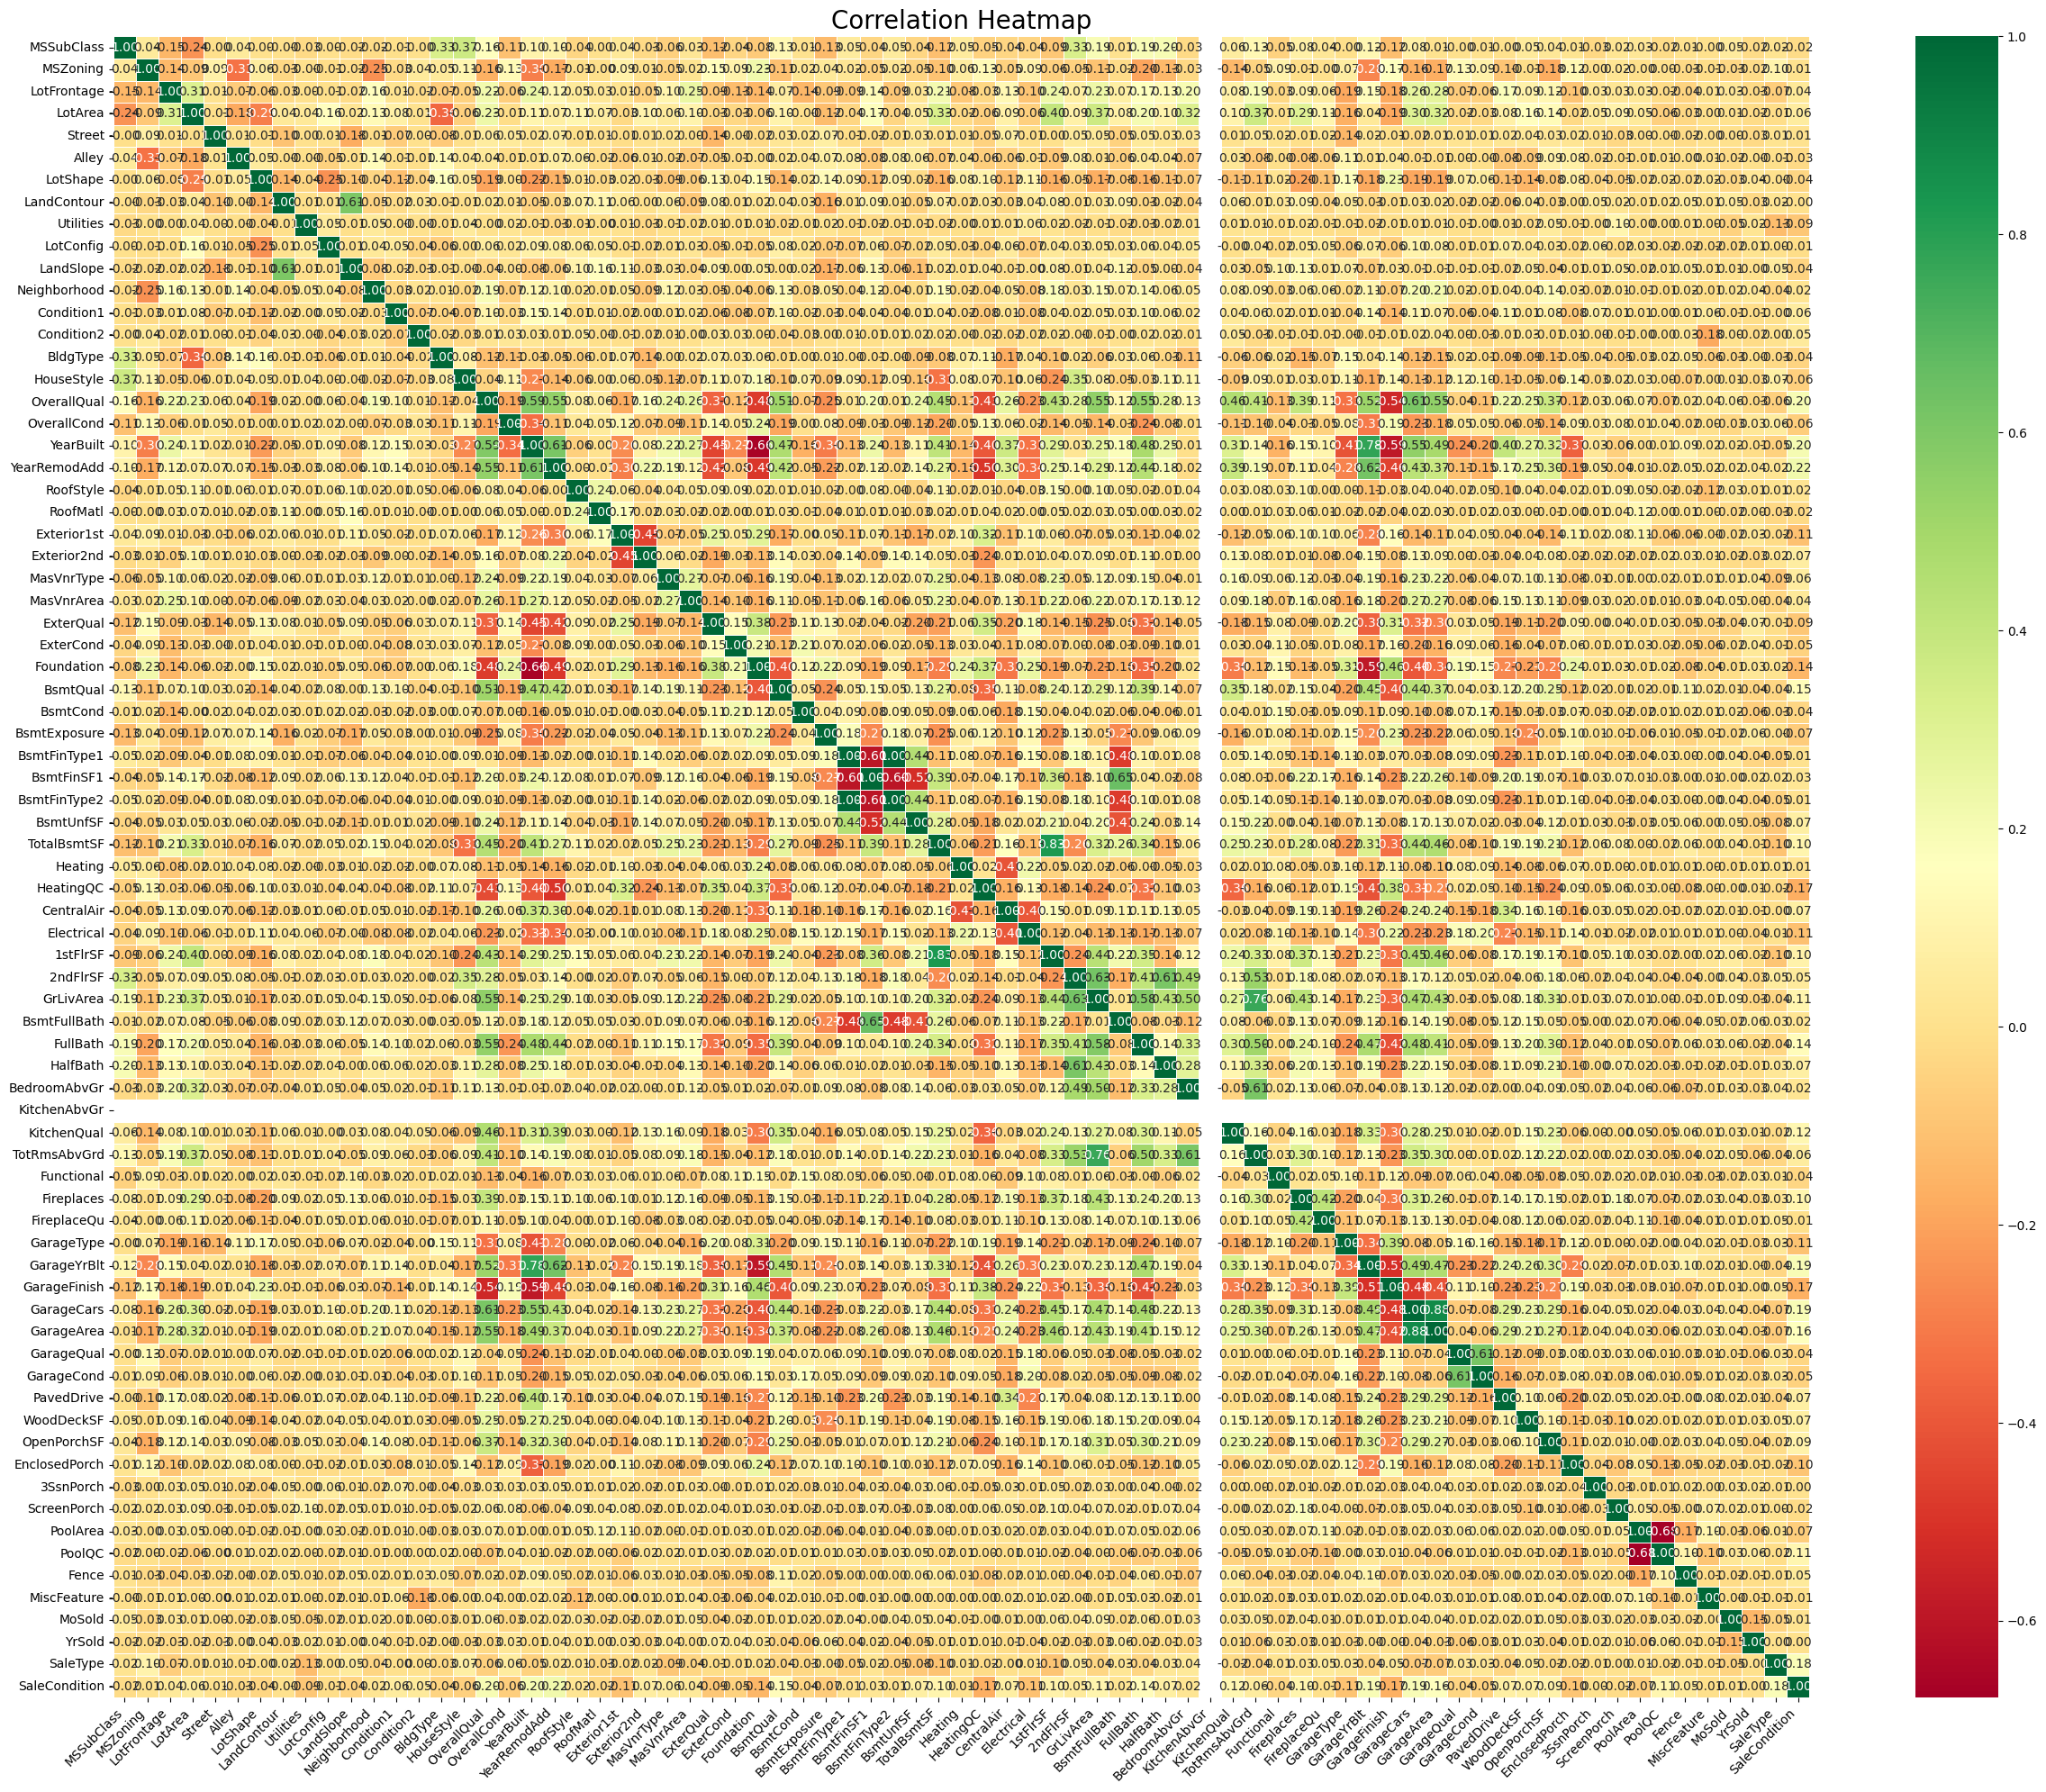

In [312]:
plt.figure(figsize=(25, 20))  # Adjusting size to better fit all labels
sns.heatmap(data3.drop('SalePrice', axis=1).corr(),annot=True, fmt='.2f',cmap='RdYlGn',linewidths=0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=20)  # Add a title
plt.tight_layout()  # Ensure no clipping
plt.show()


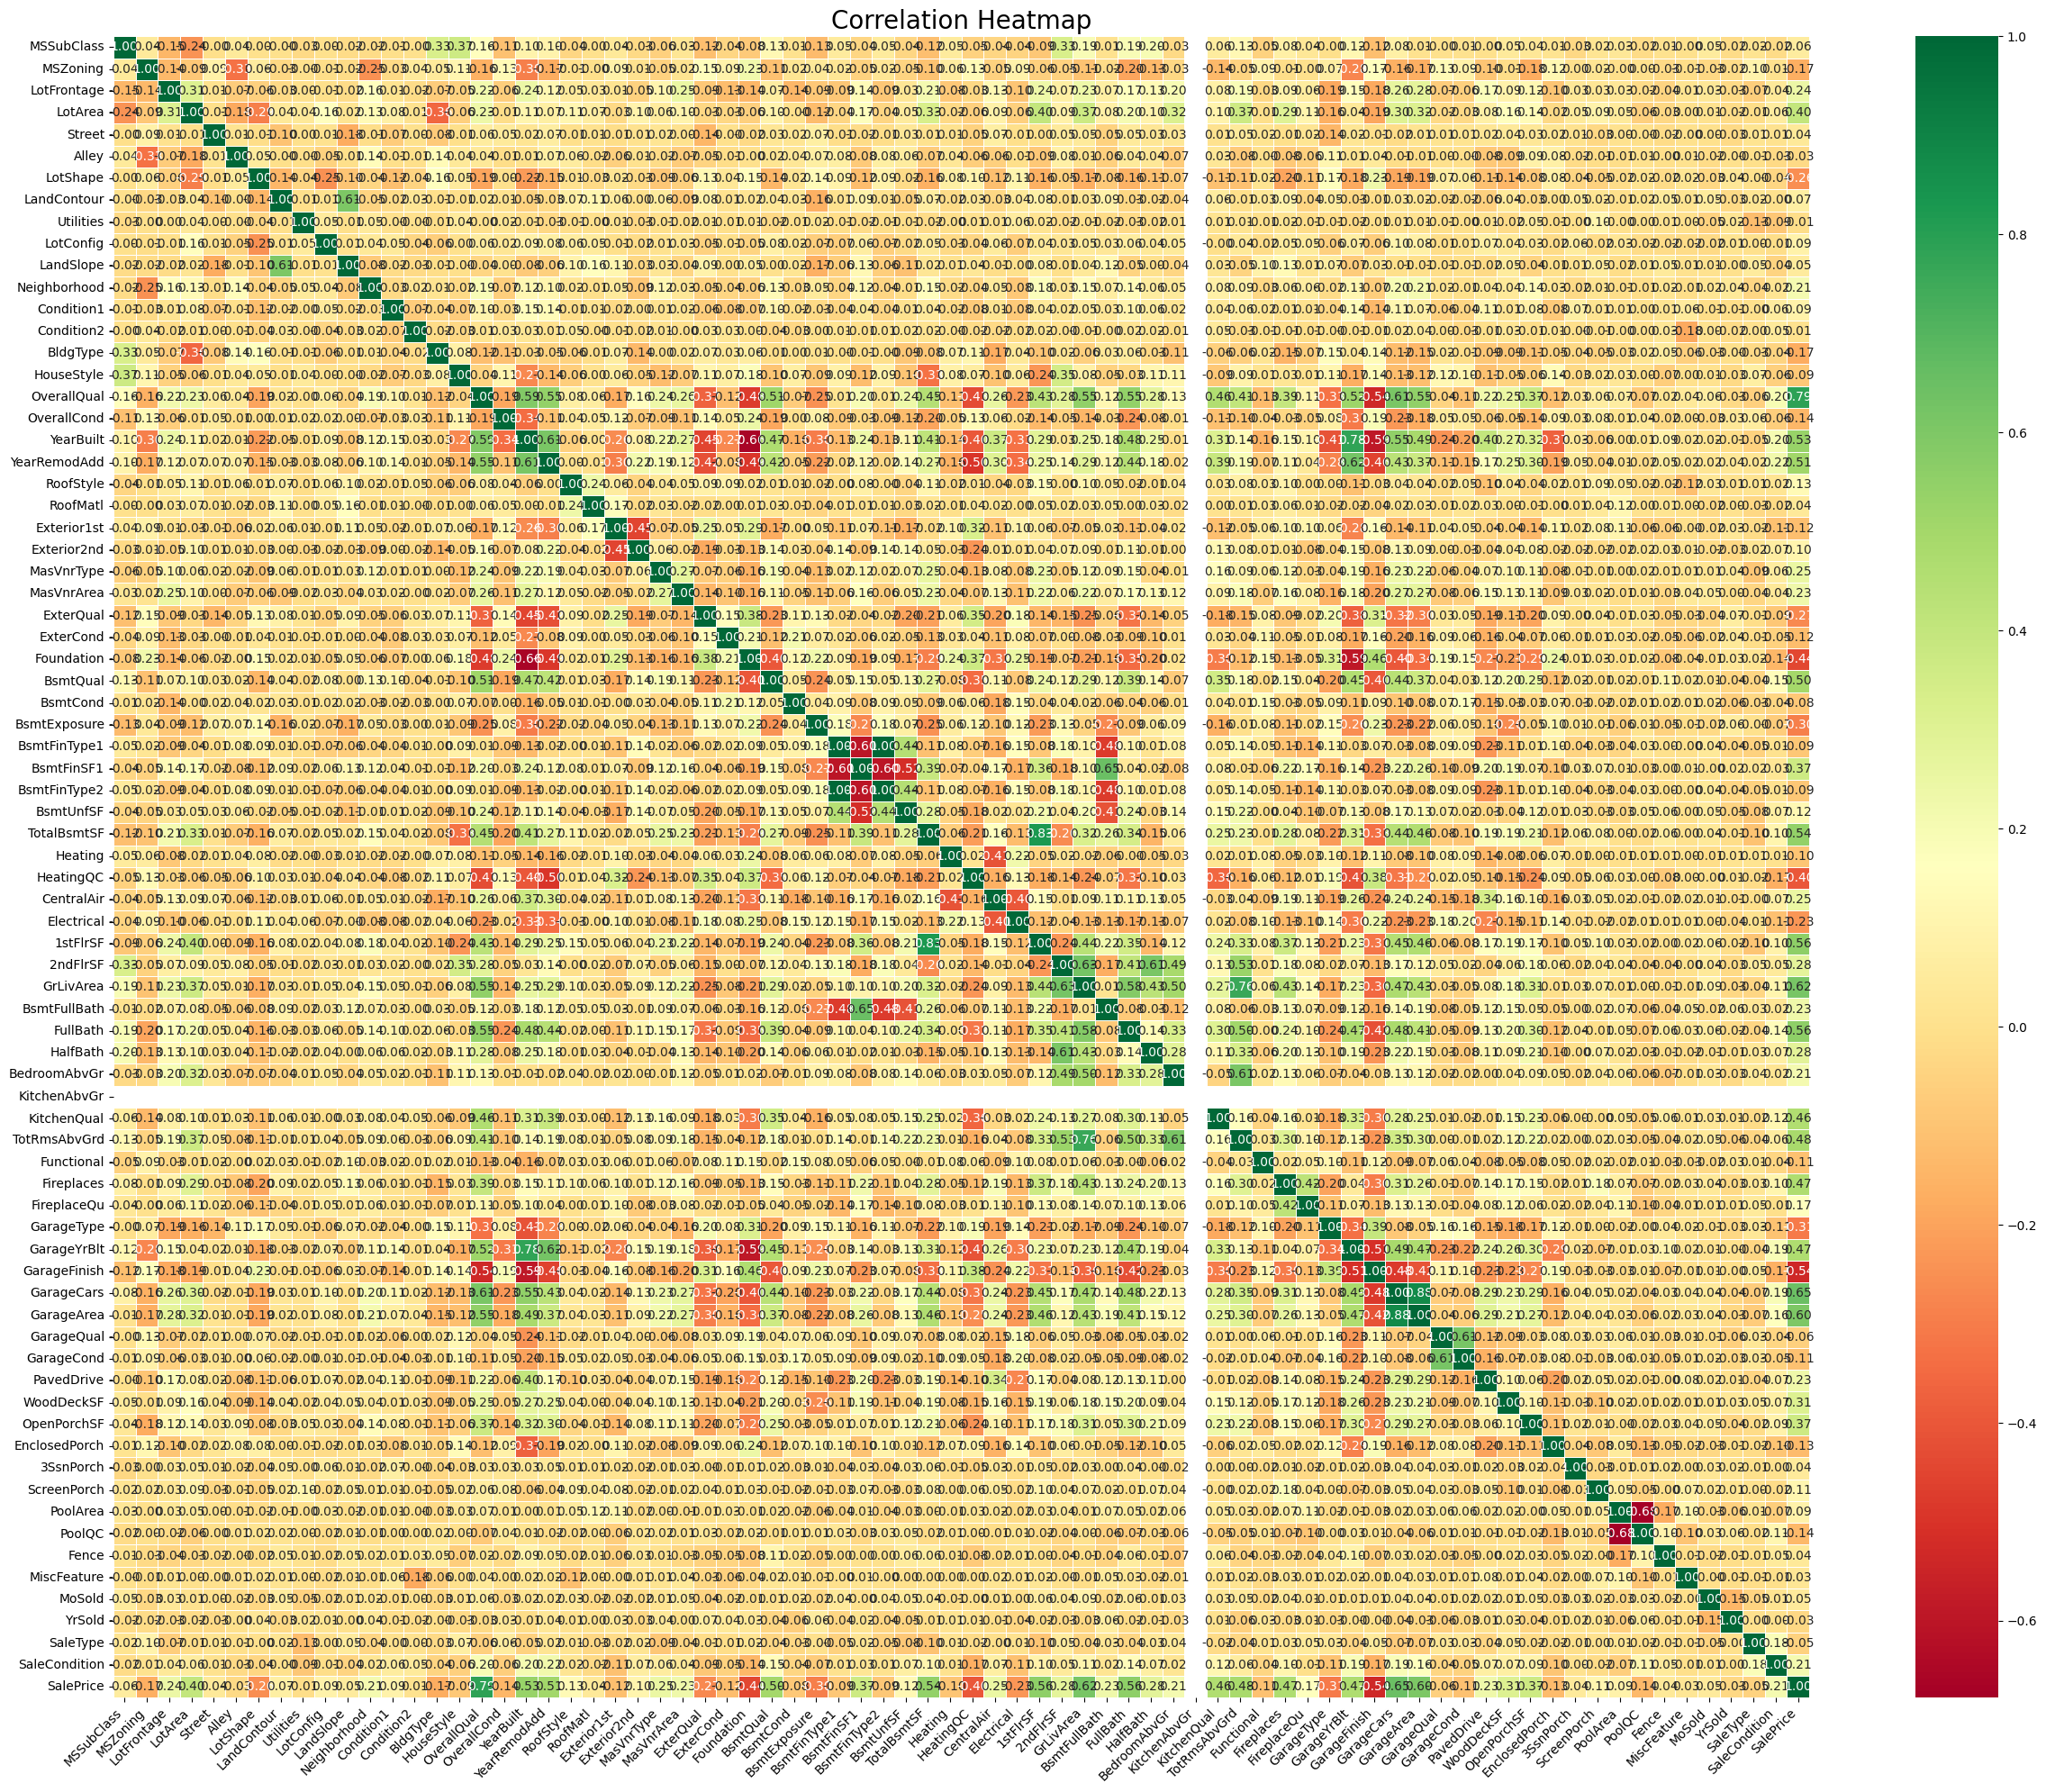

In [313]:
plt.figure(figsize=(25, 20))  # Adjusting size to better fit all labels
sns.heatmap(data3.corr(),annot=True, fmt='.2f',cmap='RdYlGn',linewidths=0.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=20)  # Add a title
plt.tight_layout()  # Ensure no clipping
plt.show()

In [314]:
correlation = data3[['GarageCars', 'GarageArea']].corr()
print(correlation)

            GarageCars  GarageArea
GarageCars    1.000000    0.877548
GarageArea    0.877548    1.000000


In [315]:
# Dropping 'GarageCars' since it's highly correlated with 'GarageArea'
data3 = data3.drop('GarageCars', axis=1)

In [316]:
data3.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3     0.450980   8450.0       1      0         3   
1        20.0         3     0.745098   9600.0       1      0         3   
2        60.0         3     0.509804  11250.0       1      0         0   
3        70.0         3     0.352941   9550.0       1      0         0   
4        60.0         3     0.823529  14260.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             5           2   
1            0          0          3          0            24           1   
2            0          0          0          0             5           2   
3            0          0          1          0             6           2   
4            0          0          3          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           1        0.625     0.333333      0.944   
1           2         0           0        0.500     0.333333      0.728   
2           2         0           1        0.625     0.333333      0.928   
3           2         0           1        0.625     0.333333      0.240   
4           2         0           1        0.750     0.333333      0.920   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.883333          0       0.0            0           13           0   
1      0.433333          0       0.0            1            8           0   
2      0.866667          0       0.0            0           13           0   
3      0.333333          0       0.0            2           15           0   
4      0.833333          0       0.0            0           13           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.478049          0          0           0         1         0   
1    0.000000          1          0           1         1         0   
2    0.395122          0          0           0         1         0   
3    0.000000          1          0           2         0         1   
4    0.853659          0          0           0         1         0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0             3             2    0.399547             2   0.089286   
1             1             0    0.553480             0   0.169048   
2             2             2    0.275042             2   0.258333   
3             3             0    0.122241             0   0.321429   
4             0             2    0.370685             2   0.291667   

   TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0     0.386914        1          0           1           0  0.289678   
1     0.596084        1          0           1           0  0.514983   
2     0.419887        1          0           1           0  0.325194   
3     0.335394        1          2           1           0  0.347947   
4     0.535806        1          0           1           0  0.450055   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0  0.469747   0.574290           0.5  0.666667       0.5      0.666667   
1  0.000000   0.387312           0.0  0.666667       0.0      0.666667   
2  0.476348   0.606010           0.5  0.666667       0.5      0.666667   
3  0.415842   0.577212           0.5  0.333333       0.0      0.666667   
4  0.579208   0.777963           0.5  0.666667       0.5      1.000000   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           0.0            1         0.750           0         0.0   
1           0.0            0         0.500           0         0.5   
2           0.0            1         0.500           0         0.5   
3           0.0            1         0.625           0         0.5   
4           0.0            1         0.875           0         0.5   

   FireplaceQu  Garage

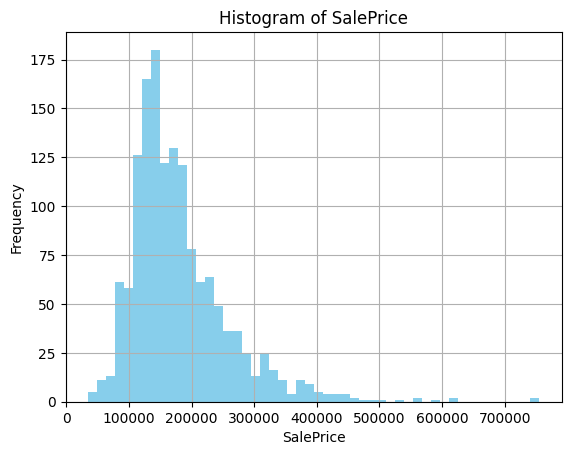

In [317]:
# Plot histogram for target column ('SalePrice')
data3['SalePrice'].hist(bins=50, color='skyblue')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [318]:
# Applying log transformation
data3['LogSalePrice'] = np.log1p(data3['SalePrice'])

# Checking skewness after transformation
print(f"Skewness of LogSalePrice: {data3['LogSalePrice'].skew()}")


Skewness of LogSalePrice: 0.12134661989685333


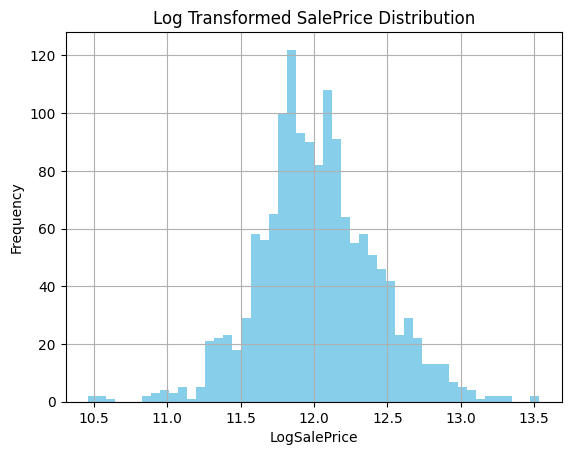

In [319]:
data3['LogSalePrice'].hist(bins=50, color='skyblue')
plt.title('Log Transformed SalePrice Distribution')
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()


In [320]:
# The SalePrice column is no longer needed because I've transformed it into LogSalePrice to handle the skewness.
data3 = data3.drop('SalePrice', axis=1)

In [321]:
data3.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3     0.450980   8450.0       1      0         3   
1        20.0         3     0.745098   9600.0       1      0         3   
2        60.0         3     0.509804  11250.0       1      0         0   
3        70.0         3     0.352941   9550.0       1      0         0   
4        60.0         3     0.823529  14260.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             5           2   
1            0          0          3          0            24           1   
2            0          0          0          0             5           2   
3            0          0          1          0             6           2   
4            0          0          3          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           1        0.625     0.333333      0.944   
1           2         0           0        0.500     0.333333      0.728   
2           2         0           1        0.625     0.333333      0.928   
3           2         0           1        0.625     0.333333      0.240   
4           2         0           1        0.750     0.333333      0.920   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.883333          0       0.0            0           13           0   
1      0.433333          0       0.0            1            8           0   
2      0.866667          0       0.0            0           13           0   
3      0.333333          0       0.0            2           15           0   
4      0.833333          0       0.0            0           13           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.478049          0          0           0         1         0   
1    0.000000          1          0           1         1         0   
2    0.395122          0          0           0         1         0   
3    0.000000          1          0           2         0         1   
4    0.853659          0          0           0         1         0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0             3             2    0.399547             2   0.089286   
1             1             0    0.553480             0   0.169048   
2             2             2    0.275042             2   0.258333   
3             3             0    0.122241             0   0.321429   
4             0             2    0.370685             2   0.291667   

   TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0     0.386914        1          0           1           0  0.289678   
1     0.596084        1          0           1           0  0.514983   
2     0.419887        1          0           1           0  0.325194   
3     0.335394        1          2           1           0  0.347947   
4     0.535806        1          0           1           0  0.450055   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0  0.469747   0.574290           0.5  0.666667       0.5      0.666667   
1  0.000000   0.387312           0.0  0.666667       0.0      0.666667   
2  0.476348   0.606010           0.5  0.666667       0.5      0.666667   
3  0.415842   0.577212           0.5  0.333333       0.0      0.666667   
4  0.579208   0.777963           0.5  0.666667       0.5      1.000000   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           0.0            1         0.750           0         0.0   
1           0.0            0         0.500           0         0.5   
2           0.0            1         0.500           0         0.5   
3           0.0            1         0.625           0         0.5   
4           0.0            1         0.875           0         0.5   

   FireplaceQu  Garage

# Model Creation

In [322]:
# Split the data
x = data3.drop('LogSalePrice', axis=1)
y = data3['LogSalePrice']

In [323]:
# split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [324]:
X_train.shape

(1168, 74)

In [325]:
X_test.shape

(292, 74)

# Model creation

# Linear regression

In [320]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [321]:
# Test/predict the values
y_predict = model.predict(X_test)

In [322]:
y_predict

array([11.86334259, 12.77516469, 11.61088387, 12.00467147, 12.68223327,
       11.36634089, 12.26959692, 11.86661712, 11.32143371, 11.94618979,
       11.87554493, 11.66330888, 11.41979279, 12.18560773, 12.01022987,
       11.82971256, 12.19481668, 11.79076794, 11.6841211 , 12.31187041,
       11.88581935, 12.23787434, 12.07727272, 11.77703093, 12.26144068,
       11.97206465, 12.16678084, 11.47179292, 12.08585658, 12.17724229,
       11.75881476, 12.46483874, 11.8994114 , 11.57912004, 12.50263747,
       11.89471484, 11.81555135, 12.244483  , 12.70241055, 11.5575658 ,
       11.68401887, 12.4335398 , 11.63057442, 12.5678147 , 11.74194848,
       11.97620225, 11.4917179 , 11.78737712, 13.04335243, 11.76142195,
       11.68408441, 12.37230836, 11.69056885, 12.22351213, 11.85426433,
       12.47996622, 12.25029261, 11.96853072, 11.85617844, 11.471795  ,
       11.07885849, 11.90543048, 12.6123785 , 12.4376091 , 12.59077273,
       12.18324877, 11.57510101, 12.75115747, 11.62365106, 11.99

# Model Evaluation

In [323]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [324]:
mse = mean_squared_error(y_test,y_predict)
mse

0.025748636373482355

In [325]:
mae = mean_absolute_error(y_test,y_predict)
mae

0.10581142799851559

In [326]:
np.sqrt(mse)

0.16046381639946855

In [327]:
r2score = r2_score(y_test,y_predict)
print(r2score)

0.8620197204453595


# KNeighborsRegressor

In [328]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

K=1: MSE=0.1555, MAE=0.2921, R²=0.1666
K=2: MSE=0.1339, MAE=0.2721, R²=0.2824
K=3: MSE=0.1255, MAE=0.2686, R²=0.3274
K=4: MSE=0.1218, MAE=0.2692, R²=0.3475
K=5: MSE=0.1246, MAE=0.2704, R²=0.3323
K=6: MSE=0.1208, MAE=0.2677, R²=0.3529
K=7: MSE=0.1193, MAE=0.2656, R²=0.3608
K=8: MSE=0.1212, MAE=0.2689, R²=0.3503
K=9: MSE=0.1258, MAE=0.2742, R²=0.3259
K=10: MSE=0.1271, MAE=0.2737, R²=0.3189


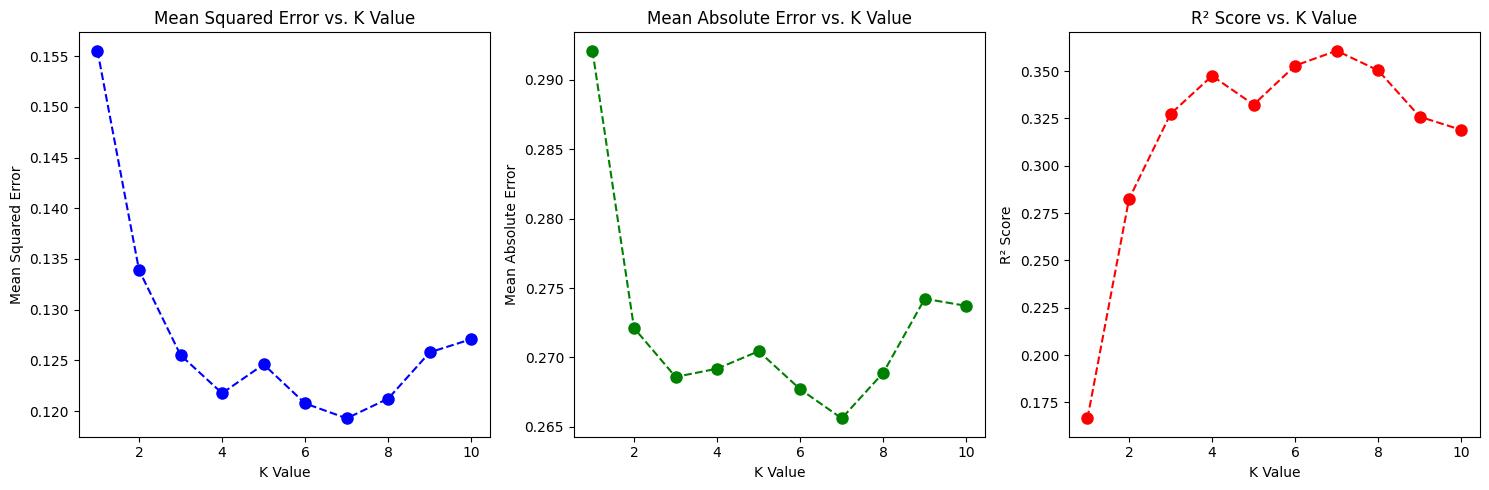

In [329]:
# Initialize lists to store errors and scores
mse_values = []
mae_values = []
r2_values = []

# Loop to calculate error metrics for different values of k
for i in range(1, 11):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, knn_predictions)
    mae = mean_absolute_error(y_test, knn_predictions)
    r2 = r2_score(y_test, knn_predictions)
    
    # Append metrics to corresponding lists
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    
    # Print scores for current K
    print(f"K={i}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

# Plotting MSE, MAE, and R² for each k
plt.figure(figsize=(15, 5))

# Plot for Mean Squared Error
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), mse_values, color='blue', linestyle='dashed', marker='o', markersize=8)
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')

# Plot for Mean Absolute Error
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), mae_values, color='green', linestyle='dashed', marker='o', markersize=8)
plt.title('Mean Absolute Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

# Plot for R² Score
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), r2_values, color='red', linestyle='dashed', marker='o', markersize=8)
plt.title('R² Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


In [330]:
# Create the KNN model with K=7
knn_model = KNeighborsRegressor(n_neighbors=7)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, knn_predictions)
mae = mean_absolute_error(y_test, knn_predictions)
r2 = r2_score(y_test, knn_predictions)
rmse = np.sqrt(mse)

# Print the results
print(f"K=7: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}, RMSE={rmse:.4f}")


K=7: MSE=0.1193, MAE=0.2656, R²=0.3608, RMSE=0.3454


# SVM Regressor

SVR R-squared: 0.2045787127637445
SVR MSE: 0.14843435275591738
SVR RMSE: 0.3852717907606491


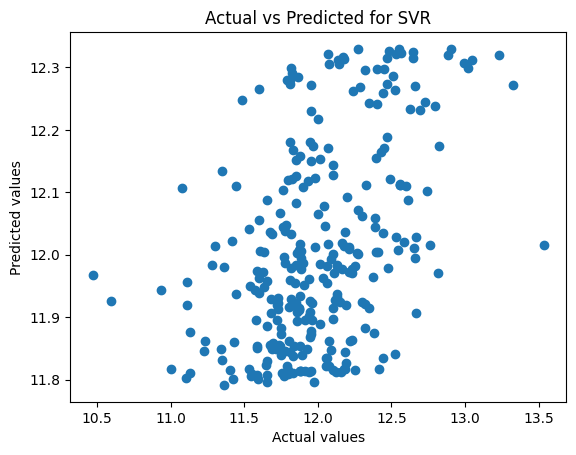

In [331]:
from sklearn.svm import SVR

# Fit the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

print(f"SVR R-squared: {svr_r2}")
print(f"SVR MSE: {svr_mse}")
print(f"SVR RMSE: {svr_rmse}")

# Plotting actual vs predicted values
plt.scatter(y_test, svr_predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted for SVR")
plt.show()


### Adding hyperparameters

Best parameters found:  {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
SVR R-squared (Tuned): 0.3005963927251952
SVR MSE (Tuned): 0.13051639857628583
SVR RMSE (Tuned): 0.361270533778062


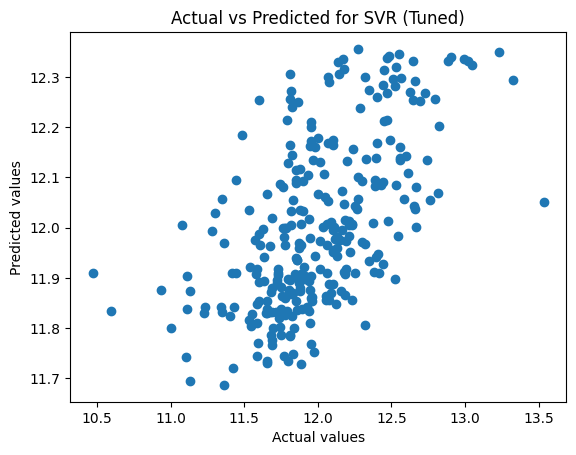

In [332]:
from sklearn.model_selection import GridSearchCV

# Define the model
svr_model = SVR(kernel='rbf')

# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.2]  # Margin of tolerance
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator for predictions
best_svr_model = grid_search.best_estimator_
svr_predictions = best_svr_model.predict(X_test)

# Evaluate the model
svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

print(f"SVR R-squared (Tuned): {svr_r2}")
print(f"SVR MSE (Tuned): {svr_mse}")
print(f"SVR RMSE (Tuned): {svr_rmse}")

# Plotting actual vs predicted values
plt.scatter(y_test, svr_predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted for SVR (Tuned)")
plt.show()


In [333]:
# Initialize the SVR model with the tuned parameters
model = SVR(C=10, gamma='scale', epsilon=0.01)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the results
print(f"SVR R-squared: {r2}")
print(f"SVR MSE: {mse}")
print(f"SVR RMSE: {rmse}")

SVR R-squared: 0.3005963927251952
SVR MSE: 0.13051639857628583
SVR RMSE: 0.361270533778062


### Cross Validation score

In [334]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

# Define your model (for example SVR model here)
model = SVR(C=10, gamma='scale', epsilon=0.01)

# Check cross-validation score
score = cross_val_score(model, x, y, cv=3, scoring='r2')  # 'r2' for regression tasks
print("Cross-validation scores:", score)
print("Mean cross-validation R²:", score.mean())
print("Standard deviation:", score.std())


Cross-validation scores: [0.29369196 0.26142739 0.28507507]
Mean cross-validation R²: 0.2800648050249299
Standard deviation: 0.013640080969455902


# Ridge Regression

Ridge R-squared: 0.862707603218079
Ridge MAE: 0.105328553862841
Ridge MSE: 0.02562026988923179
Ridge RMSE: 0.16006333087010213


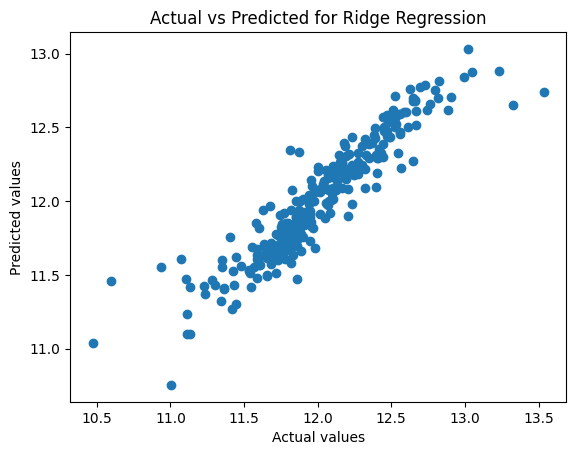

In [336]:
from sklearn.linear_model import Ridge

# Define the Ridge model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength, tune this parameter

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)

print(f"Ridge R-squared: {ridge_r2}")
print(f"Ridge MAE: {ridge_mae}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge RMSE: {ridge_rmse}")

# Plotting actual vs predicted values
plt.scatter(y_test, ridge_predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted for Ridge Regression")
plt.show()


### Hyperparameter Tuning

In [338]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1,2,20]}

# Set up GridSearchCV with mse as scoring
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best alpha parameter:", grid_search.best_params_)

# Use the best estimator for predictions
best_ridge_model = grid_search.best_estimator_
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the tuned model
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)

print(f"Tuned Ridge R-squared: {ridge_r2}")
print(f"Tuned Ridge MSE: {ridge_mse}")
print(f"Tuned Ridge RMSE: {ridge_rmse}")


Best alpha parameter: {'alpha': 2}
Tuned Ridge R-squared: 0.8626300895977311
Tuned Ridge MSE: 0.025634734782554038
Tuned Ridge RMSE: 0.1601085094008249


In [340]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [2]}

# Set up GridSearchCV with mae as scoring
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best alpha parameter:", grid_search.best_params_)

# Use the best estimator for predictions
best_ridge_model = grid_search.best_estimator_
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the tuned model
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)

print(f"Tuned Ridge R-squared: {ridge_r2}")
print(f"Tuned Ridge MAE: {ridge_mae}")
print(f"Tuned Ridge RMSE: {ridge_rmse}")

Best alpha parameter: {'alpha': 2}
Tuned Ridge R-squared: 0.8626300895977311
Tuned Ridge MAE: 0.10513876063730657
Tuned Ridge RMSE: 0.1601085094008249


### Cross Validation Score

In [344]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
ridge_cv_scores = cross_val_score(Ridge(alpha=2), X_train, y_train, cv=5, scoring='r2')

# Display results
print("Ridge CV R-squared scores:", ridge_cv_scores)
print("Mean CV R-squared:", ridge_cv_scores.mean())
print("Standard deviation of CV scores:", ridge_cv_scores.std())

Ridge CV R-squared scores: [0.86137731 0.8598969  0.87768513 0.86568835 0.86359365]
Mean CV R-squared: 0.8656482672100166
Standard deviation of CV scores: 0.006331324330496715


# Lasso Regression

Lasso R-squared: 0.470879578066161
Lasso MAE: 0.23734025692711638
Lasso MSE: 0.098739685019719
Lasso RMSE: 0.31422871450540446


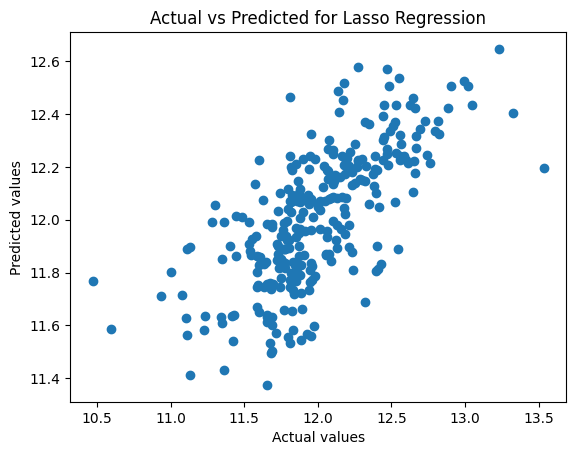

In [346]:
from sklearn.linear_model import Lasso

# Define the Lasso model
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength, tune this parameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)

print(f"Lasso R-squared: {lasso_r2}")
print(f"Lasso MAE: {lasso_mae}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Lasso RMSE: {lasso_rmse}")

# Plotting actual vs predicted values
plt.scatter(y_test, lasso_predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted for Lasso Regression")
plt.show()


### Hyperparameter Tuning

In [347]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best alpha parameter for Lasso:", grid_search.best_params_)

# Use the best estimator for predictions
best_lasso_model = grid_search.best_estimator_
lasso_predictions = best_lasso_model.predict(X_test)

# Evaluate the tuned model
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)

print(f"Tuned Lasso R-squared: {lasso_r2}")
print(f"Tuned Lasso MSE: {lasso_mse}")
print(f"Tuned Lasso RMSE: {lasso_rmse}")


Best alpha parameter for Lasso: {'alpha': 0.1}
Tuned Lasso R-squared: 0.470879578066161
Tuned Lasso MSE: 0.098739685019719
Tuned Lasso RMSE: 0.31422871450540446


### Cross validation score

In [348]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
lasso_cv_scores = cross_val_score(Lasso(alpha=0.1), X_train, y_train, cv=5, scoring='r2')

# Display results
print("Lasso CV R-squared scores:", lasso_cv_scores)
print("Mean CV R-squared:", lasso_cv_scores.mean())
print("Standard deviation of CV scores:", lasso_cv_scores.std())


Lasso CV R-squared scores: [0.47359248 0.45799154 0.43560369 0.39210208 0.43113266]
Mean CV R-squared: 0.4380844906582414
Standard deviation of CV scores: 0.027662148043572404


# Decission Tree Regression

In [349]:
from sklearn.tree import DecisionTreeRegressor

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on both training and test data
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Evaluate the model on training data
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

# Evaluate the model on test data
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print evaluation metrics
print(f"Train R-squared: {train_r2}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train RMSE: {train_rmse}")

print(f"Test R-squared: {test_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")


Train R-squared: 1.0
Train MSE: 0.0
Train MAE: 0.0
Train RMSE: 0.0
Test R-squared: 0.7199800683776801
Test MSE: 0.052254796264674025
Test MAE: 0.1629816171000828
Test RMSE: 0.22859308008921447


### Hyperparameter Tuning

In [350]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV: ", grid_search.best_params_)

# Use the best estimator for predictions
best_dt_model = grid_search.best_estimator_

# Make predictions on the test data
dt_predictions = best_dt_model.predict(X_test)

# Evaluate the model with tuned parameters
dt_r2 = r2_score(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

# Print evaluation metrics for the tuned model
print(f"Tuned Decision Tree R-squared: {dt_r2}")
print(f"Tuned Decision Tree MSE: {dt_mse}")
print(f"Tuned Decision Tree MAE: {dt_mae}")
print(f"Tuned Decision Tree RMSE: {dt_rmse}")

Best parameters found by GridSearchCV:  {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree R-squared: 0.8063113463177007
Tuned Decision Tree MSE: 0.036144431142132366
Tuned Decision Tree MAE: 0.1380572711594128
Tuned Decision Tree RMSE: 0.19011688810343064


# Random Forest Regressor with Random searchCV

In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rf_model, param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV: ", random_search.best_params_)

# Use the best estimator for predictions
best_rf_model = random_search.best_estimator_

# Make predictions on the test data
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the model with tuned parameters
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Print evaluation metrics for the tuned Random Forest model
print(f"Tuned Random Forest R-squared: {rf_r2}")
print(f"Tuned Random Forest MSE: {rf_mse}")
print(f"Tuned Random Forest MAE: {rf_mae}")
print(f"Tuned Random Forest RMSE: {rf_rmse}")


Best parameters found by RandomizedSearchCV:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Tuned Random Forest R-squared: 0.8698194650211152
Tuned Random Forest MSE: 0.024293118327458656
Tuned Random Forest MAE: 0.10046413197368387
Tuned Random Forest RMSE: 0.15586249814326297


# Bagging with Decision Tree Regressor

In [356]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize base model (DecisionTreeRegressor)
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize BaggingRegressor with DecisionTree as base estimator
bagging_model = BaggingRegressor(base_estimator=dt_model, n_estimators=100, random_state=42)

# Fit the BaggingRegressor model
bagging_model.fit(X_train, y_train)

# Make predictions
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the model
bagging_r2 = r2_score(y_test, bagging_predictions)
bagging_mse = mean_squared_error(y_test, bagging_predictions)
bagging_mae = mean_absolute_error(y_test, bagging_predictions)
bagging_rmse = mean_squared_error(y_test, bagging_predictions, squared=False)

print(f"Bagging Decision Tree R-squared: {bagging_r2}")
print(f"Bagging Decision Tree MSE: {bagging_mse}")
print(f"Bagging Decision Tree MAE: {bagging_mae}")
print(f"Bagging Decision Tree RMSE: {bagging_rmse}")


Bagging Decision Tree R-squared: 0.8736179796795904
Bagging Decision Tree MSE: 0.02358427375187065
Bagging Decision Tree MAE: 0.1038967243863113
Bagging Decision Tree RMSE: 0.15357172184966428


### Hyperparameters

In [357]:
from sklearn.model_selection import GridSearchCV

# Initialize the model
bagging_model = BaggingRegressor(base_estimator=dt_model, random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best estimator for predictions
best_bagging_model = grid_search.best_estimator_
bagging_predictions_tuned = best_bagging_model.predict(X_test)

# Evaluate the tuned model
bagging_r2_tuned = r2_score(y_test, bagging_predictions_tuned)
bagging_mse_tuned = mean_squared_error(y_test, bagging_predictions_tuned)
bagging_mae_tuned = mean_absolute_error(y_test, bagging_predictions_tuned)
bagging_rmse_tuned = mean_squared_error(y_test, bagging_predictions_tuned, squared=False)

print(f"Tuned Bagging Decision Tree R-squared: {bagging_r2_tuned}")
print(f"Tuned Bagging Decision Tree MSE: {bagging_mse_tuned}")
print(f"Tuned Bagging Decision Tree MAE: {bagging_mae_tuned}")
print(f"Tuned Bagging Decision Tree RMSE: {bagging_rmse_tuned}")


Best parameters found: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}
Tuned Bagging Decision Tree R-squared: 0.8759616995800287
Tuned Bagging Decision Tree MSE: 0.023146909864274087
Tuned Bagging Decision Tree MAE: 0.0986755864636665
Tuned Bagging Decision Tree RMSE: 0.15214108539205998


# Boosting with Decision Tree Regressor (AdaBoost)

In [354]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize base model (DecisionTreeRegressor)
dt_model = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoostRegressor with DecisionTree as base estimator
ada_model = AdaBoostRegressor(base_estimator=dt_model, n_estimators=100, random_state=42)

# Fit the AdaBoostRegressor model
ada_model.fit(X_train, y_train)

# Make predictions
ada_predictions = ada_model.predict(X_test)

# Evaluate the model
ada_r2 = r2_score(y_test, ada_predictions)
ada_mse = mean_squared_error(y_test, ada_predictions)
ada_mae = mean_absolute_error(y_test, ada_predictions)
ada_rmse = mean_squared_error(y_test, ada_predictions, squared=False)

print(f"AdaBoost Decision Tree R-squared: {ada_r2}")
print(f"AdaBoost Decision Tree MSE: {ada_mse}")
print(f"AdaBoost Decision Tree MAE: {ada_mae}")
print(f"AdaBoost Decision Tree RMSE: {ada_rmse}")


AdaBoost Decision Tree R-squared: 0.8488342723496143
AdaBoost Decision Tree MSE: 0.02820918587761872
AdaBoost Decision Tree MAE: 0.1224143706187415
AdaBoost Decision Tree RMSE: 0.16795590456312848


### Hyperparameters

In [358]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model (using DecisionTreeRegressor as base estimator)
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid_adaboost = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0, 2.0],
    'base_estimator__max_depth': [2, 3, 4]  # For tuning the decision tree base estimator
}

# Perform GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=5, scoring='neg_mean_squared_error')
grid_search_adaboost.fit(X_train, y_train)

# Print best parameters and results
print("Best parameters found for AdaBoost:", grid_search_adaboost.best_params_)
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the model
adaboost_predictions = best_adaboost_model.predict(X_test)
print(f"AdaBoost R-squared: {r2_score(y_test, adaboost_predictions)}")


Best parameters found for AdaBoost: {'base_estimator__max_depth': 4, 'learning_rate': 2.0, 'n_estimators': 150}
AdaBoost R-squared: 0.845007696964028


# Boosting with Decision Tree Regressor(Gradient Boosting)

In [359]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the GradientBoostingRegressor model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_r2 = r2_score(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)

print(f"Gradient Boosting Decision Tree R-squared: {gb_r2}")
print(f"Gradient Boosting Decision Tree MSE: {gb_mse}")
print(f"Gradient Boosting Decision Tree MAE: {gb_mae}")
print(f"Gradient Boosting Decision Tree RMSE: {gb_rmse}")


Gradient Boosting Decision Tree R-squared: 0.8863753580223569
Gradient Boosting Decision Tree MSE: 0.021203606767522705
Gradient Boosting Decision Tree MAE: 0.10173661805061471
Gradient Boosting Decision Tree RMSE: 0.14561458294938287


### Hyperparameters

In [360]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Print best parameters and results
print("Best parameters found for Gradient Boosting:", grid_search_gb.best_params_)
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the model
gb_predictions = best_gb_model.predict(X_test)
print(f"Gradient Boosting R-squared: {r2_score(y_test, gb_predictions)}")


Best parameters found for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Gradient Boosting R-squared: 0.8835558127016665


# XGboost

In [326]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the XGBoost model with basic parameters
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the performance
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

print(f"XGBoost R-squared: {xgb_r2}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost RMSE: {xgb_rmse}")


XGBoost R-squared: 0.8889069788262959
XGBoost MSE: 0.0207311785065671
XGBoost MAE: 0.10082390305542575
XGBoost RMSE: 0.14398325773008158


### Hyperparameter Tuning

In [327]:
from sklearn.model_selection import GridSearchCV

# Defining the model
xgb_model = XGBRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and results
print("Best parameters found for XGBoost:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Evaluate the tuned model
xgb_predictions_tuned = best_xgb_model.predict(X_test)
print(f"Tuned XGBoost R-squared: {r2_score(y_test, xgb_predictions_tuned)}")


Best parameters found for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Tuned XGBoost R-squared: 0.8999319014555947


In [328]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation MSE: {-cv_scores.mean()}")
print(f"Standard deviation of cross-validation MSE: {cv_scores.std()}")


Cross-validation scores: [-0.02086258 -0.02204003 -0.02819019 -0.02079981 -0.01689891]
Mean cross-validation MSE: 0.02175830434862961
Standard deviation of cross-validation MSE: 0.003654677102354854


# TESTING XGBOOST(and its giving very good predictions)

In [341]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Create your test data dictionary

test_data_dict = {
    'MSSubClass': [60.0],
    'MSZoning': [3],
    'LotFrontage': [0.450980],
    'LotArea': [8450.0],
    'Street': [1],
    'Alley': [0],
    'LotShape': [3],
    'LandContour': [0],
    'Utilities': [0],
    'LotConfig': [0],
    'LandSlope': [0],
    'Neighborhood': [5],
    'Condition1': [2],
    'Condition2': [2],
    'BldgType': [0],
    'HouseStyle': [1],
    'OverallQual': [0.625],
    'OverallCond': [0.333333],
    'YearBuilt': [0.944],
    'YearRemodAdd': [0.883333],
    'RoofStyle': [0],
    'RoofMatl': [0.0],
    'Exterior1st': [0],
    'Exterior2nd': [13],
    'MasVnrType': [0],
    'MasVnrArea': [0.478049],
    'ExterQual': [0],
    'ExterCond': [0],
    'Foundation': [0],
    'BsmtQual': [1],
    'BsmtCond': [0],
    'BsmtExposure': [3],
    'BsmtFinType1': [2],
    'BsmtFinSF1': [0.399547],
    'BsmtFinType2': [2],
    'BsmtUnfSF': [0.089286],
    'TotalBsmtSF': [0.386914],
    'Heating': [1],
    'HeatingQC': [0],
    'CentralAir': [1],
    'Electrical': [0],
    '1stFlrSF': [0.289678],
    '2ndFlrSF': [0.469747],
    'GrLivArea': [0.574290],
    'BsmtFullBath': [0.5],
    'FullBath': [0.666667],
    'HalfBath': [0.5],
    'BedroomAbvGr': [0.666667],
    'KitchenAbvGr': [0.0],
    'KitchenQual': [1],
    'TotRmsAbvGrd': [0.750],
    'Functional': [0],
    'Fireplaces': [0.0],
    'FireplaceQu': [0],
    'GarageType': [0.0],
    'GarageYrBlt': [2003.0],
    'GarageFinish': [1],
    'GarageArea': [0.585470],
    'GarageQual': [0],
    'GarageCond': [0],
    'PavedDrive': [2],
    'WoodDeckSF': [0.000000],
    'OpenPorchSF': [0.358824],
    'EnclosedPorch': [0.000000],
    '3SsnPorch': [0.0],
    'ScreenPorch': [0.0],
    'PoolArea': [0.0],
    'PoolQC': [2],
    'Fence': [2],
    'MiscFeature': [2],
    'MoSold': [0.090909],
    'YrSold': [0.50],
    'SaleType': [8],
    'SaleCondition': [4]
}


# Convert dictionary to DataFrame
test_data = pd.DataFrame.from_dict(test_data_dict)

# Make predictions using your trained model
predictions = xgb_model.predict(test_data)

# Display predictions
print('LogSalePrice : ' , predictions)


LogSalePrice :  [12.237237]


# Time series

* Since the goal here is to predict the house price based on static features (such as the house’s condition, size, and location) and not based on the past trends of house prices over time, we don’t need time series models like ARIMA or SARIMA.


* Time series analysis is not required for this dataset because the goal is not to predict future house prices based on historical price trends over time, but rather to predict prices based on the current attributes of each house. Thus, traditional regression models are more appropriate for this task.

# MODEL CAMPARISON REPORT :

### Linear Regression
* R² - 0.8620
* MSE - 0.0257
* MAE - 0.1058
#### Strong baseline model with good R².

### KNN Regression
* R² - 0.3608
* MSE - 0.1193
* MAE - 0.3454
#### Poor performance; not suitable due to low R² and high errors.

### SVM Regression
* R² - 0.3006
* MSE - 0.1305
* MAE - 0.3613
* Validation R² (Mean ± Std) - 0.2801 ± 0.0136
#### Poor performance; very low R²

### Ridge Regression
* R² - 0.8626
* MSE - 0.0256
* MAE - 0.1601 
* Validation R² (Mean ± Std) - 0.8656 ± 0.0063
#### Similar to Linear Regression but performs slightly better, especially with cross-validation stability.

### Lasso Regression
* R² - 0.4709
* MSE - 0.0987
* MAE - 0.3142
* Validation R² (Mean ± Std) - 0.4381 ± 0.0277
#### Performs worse than Ridge Regression and Linear Regression.

### Decision Tree
* R² - 0.8063
* MSE - 0.0361
* MAE - 0.1901
#### Decent performance, but overfitting may occur.

### Random Forest
* R² - 0.8698
* MSE - 0.0243
* MAE - 0.1559
#### Strong performance; slightly better than Ridge Regression

### Bagging (Decision Tree)
* R² - 0.8760
* MSE - 0.0231	
* MAE - 0.1521
#### Better performance than Random Forest; bagging improves accuracy and reduces overfitting.

### Boosting (AdaBoost)
* R² - 0.8488
* MSE - 0.0282 	
* MAE - 0.1680
#### Good performance, but not the best compared to Gradient Boosting or XGBoost.

### Boosting (Gradient)
* R² - 0.8836
* MSE - 0.0212	
* MAE - 0.1456
#### Excellent performance with low errors and high R²

### XGBoost
* R² - 0.8999
* MSE - 0.0207
* MAE - 0.1440
* Validation R² (Mean ± Std) - 0.0217 ± 0.0036
#### Best performance overall; highest R² and lowest RMSE.

#### ~ XGBoost is the best model in terms of accuracy, providing the highest R² (0.8999) and lowest error metrics (MSE = 0.0207, MAE = 0.1440). It handles complex data well and generalizes better.

#### ~ Gradient Boosting is a close runner-up with similar performance, making it a good alternative when computational efficiency is a concern.

#### ~ KNN Regression and SVM Regression performed poorly due to their inability to capture the underlying complexity of the dataset, resulting in low R² scores and high errors.
#### ~ Lasso Regression also underperformed compared to Ridge and Linear Regression.

# CHALLENGES FACED :

#### Data Preprocessing:
* 1)Feature Scaling: KNN and SVM require scaling of features, and initially, the model performance was suboptimal due to unscaled data. After scaling, results improved slightly but still didn't match other models.

* 2)Handling Categorical Variables: Some models like Ridge and Lasso may not perform well if categorical features aren’t encoded properly. This was resolved by using one-hot encoding and proper feature selection.


#### Overfitting:
* 1)Decision Tree: The Decision Tree model showed signs of overfitting, performing well on the training set but poorly on the test set. This was addressed by tuning the max depth and pruning the tree.

* 2)Model Tuning: Hyperparameter tuning was essential for models like Ridge and Lasso. Using cross-validation for parameter selection significantly improved their performance.


#### Model Complexity:
* Models like XGBoost and Gradient Boosting required more computational resources and time for training due to their ensemble nature. Proper hardware and time allocation were necessary to optimize these models.


#### Cross-Validation:

* Ensuring proper cross-validation for  model helped assess generalizability. It was important to use cross-validation to compare models and avoid overfitting, particularly for models like XGBoost and Ridge.

# CONCLUSION : 

# After evaluating the performance of various regression models, XGBoost is the clear winner for this house price prediction task, providing the best R² score and lowest MSE - MAE.